In [ ]:
# 한글 폰트 깨집니다~ 실행하고 런타임 재실행하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 지수 표현으로 변경 
pd.options.display.float_format = '{:.5f}'.format
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, MinMaxScaler

plt.rcParams["font.family"] = "NanumGothic"
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#모든행,모든컬럼 출력
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)


# 경고 무시
# warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

# 0.데이터 load

In [ ]:
# 데이터 load
df_total = pd.read_csv('/content/drive/MyDrive/project2/datasets2/fake_for_data.csv', index_col=0)
df_total.rename(columns={'EV/EBITDA' : 'EV_EBITDA'}, inplace=True)

# 거래소코드 0 값 채우는 코드
df_total['거래소코드'] = df_total['거래소코드'].astype('str')
df_total['거래소코드'] = df_total['거래소코드'].str.zfill(6)
df_total.reset_index(drop=True,inplace=True)
df_total

회사명   거래소코드  회계년도       y  차입금평균이자율  매출원가_매출액비율  인건비_총비용비율  \
0     (주)CMG제약  058820  2012 1.00000   5.45000    71.66000   20.41000   
1     (주)DB하이텍  000990  2011 1.00000   7.71000    83.38000   20.38000   
2      (주)ES큐브  050120  2018 1.00000   4.60000    77.11000   10.12000   
3     (주)HJ중공업  097230  2011 1.00000   6.60000    92.15000    6.48000   
4     (주)MH에탄올  023150  2013 1.00000   4.56000    87.33000    8.29000   
...        ...     ...   ...     ...       ...         ...        ...   
9088   흥구석유(주)  024060  2016 0.00000   2.29000    94.67000    2.35000   
9089   흥구석유(주)  024060  2017 0.00000   2.12000    94.93000    2.10000   
9090   흥구석유(주)  024060  2018 0.00000   2.88000    95.00000    2.12000   
9091   흥구석유(주)  024060  2019 0.00000   0.00000    94.86000    2.23000   
9092   흥아해운(주)  003280  2011 1.00000   6.64000    97.46000    4.23000   

       매출액순이익률   자본금순이익률   총자본순이익률  ...           매입채무회전율  재고자산회전율  매출채권회전율  \
0    -40.97000 -24.28000 -15.78000  ...           7.83000  5.71000  1.85000   
1    -17.74000 -45.89000  -7.59000  ...          20.51000  7.04000  6.12000   
2    -18.13000  -9.40000  -5.61000  ...          31.55000  3.84000 11.85000   
3     -3.35000 -40.31000  -1.33000  ...          10.41000  8.86000 10.97000   
4     11.30000 162.34000   5.32000  ...        6573.65000  3.76000  5.98000   
...        ...       ...       ...  ...               ...      ...      ...   
9088   1.51000 145.18000   2.77000  ... 17957666541.82272 68.96000 29.72000   
9089   1.33000 137.65000   2.60000  ...   252212280.04736 58.96000 27.11000   
9090   1.43000 157.99000   3.06000  ...   489070908.79666 78.35000 31.01000   
9091   5.50000 552.86000  10.44000  ...  1339634880.41255 68.41000 31.51000   
9092  -2.95000 -57.15000  -3.75000  ...          16.88000 50.91000 27.43000   

      비유동자산회전율    매출액증가율   자기자본증가율    총자본증가율  유형자산증가율   유동자산증가율  상장기간  
0      1.48000  -8.43285  75.17467 109.15000 -4.13061 207.07907    11  
1      0.56000 -10.93908 -22.60060 -13.19000 -7.89108 -10.08197    36  
2      0.55000  -5.54468  -2.84000   6.17000 30.78114 -11.70892    16  
3      0.61000  -8.72142  -4.54767  -6.49000 -1.53021 -13.26448     4  
4      0.73000   4.06907  15.64595  -3.49000 -1.99187 -13.66127    17  
...        ...       ...       ...       ...      ...       ...   ...  
9088   2.24000  -7.26397   1.39388   1.39000 -5.61343   7.35849    22  
9089   2.42000   8.11730   0.83263   0.98000 -0.56503   7.34081    23  
9090   2.62000   6.87449   0.98632  -5.89000 -0.35945 -21.19018    24  
9091   2.44000  -9.34913   9.31121  11.24000 -7.00531  80.74311    25  
9092   1.72000  12.78463 -17.19454  -3.13000 -0.33718 -15.58538    35  

[9093 rows x 48 columns]

In [ ]:
x = df_total.iloc[:, 4:]
x_win = x.copy()

## 0_1. winsorizing

In [ ]:
# boxplot에서 보이는 이상치 winsorizing 활용
from scipy.stats.mstats import winsorize
x_win['차입금평균이자율'] = winsorize(x_win['차입금평균이자율'], limits=[0, 0.01])
x_win['매출원가_매출액비율'] = winsorize(x_win['매출원가_매출액비율'], limits=[0, 0.01])
x_win['인건비_총비용비율'] = winsorize(x_win['인건비_총비용비율'], limits=[0, 0.01])
x_win['매출액순이익률'] = winsorize(x_win['매출액순이익률'], limits=[0.005, 0.005])
x_win['자본금순이익률'] = winsorize(x_win['자본금순이익률'], limits=[0, 0.01])
x_win['총자본순이익률'] = winsorize(x_win['총자본순이익률'], limits=[0.005, 0.005])
x_win['자기자본순이익률'] = winsorize(x_win['자기자본순이익률'], limits=[0.005, 0.005])
x_win['매출액정상영업이익률'] = winsorize(x_win['매출액정상영업이익률'], limits=[0.01, 0])
x_win['금융비용_총비용비율'] = winsorize(x_win['금융비용_총비용비율'], limits=[0.01, 0])
x_win['유보율'] = winsorize(x_win['유보율'], limits=[0, 0.01])
x_win['총자본투자효율'] = winsorize(x_win['총자본투자효율'], limits=[0, 0.005])
x_win['부가가치율'] = winsorize(x_win['부가가치율'], limits=[0.005, 0.005])
x_win['노동소득분배율'] = winsorize(x_win['노동소득분배율'], limits=[0, 0.01])
x_win['당좌자산회전률'] = winsorize(x_win['당좌자산회전률'], limits=[0, 0.01])
x_win['순운전자본회전률'] = winsorize(x_win['순운전자본회전률'], limits=[0.005, 0.005])
x_win['타인자본회전률'] = winsorize(x_win['타인자본회전률'], limits=[0, 0.01])
x_win['이자부담률'] = winsorize(x_win['이자부담률'], limits=[0, 0.01])
x_win['기업순이익률'] = winsorize(x_win['기업순이익률'], limits=[0.005, 0.005])
# x_win['금융비용부담률'] = winsorize(x_win['금융비용부담률'], limits=[0, 0])
x_win['정상영업이익증가율'] = winsorize(x_win['정상영업이익증가율'], limits=[0.005, 0.005])
x_win['총자본정상영업이익률'] = winsorize(x_win['총자본정상영업이익률'], limits=[0.01, 0])
x_win['영업비용_대_영업수익비율'] = winsorize(x_win['영업비용_대_영업수익비율'], limits=[0.005, 0.005])
x_win['자본금정상영업이익률'] = winsorize(x_win['자본금정상영업이익률'], limits=[0, 0.01])
x_win['자기자본정상영업이익률'] = winsorize(x_win['자기자본정상영업이익률'], limits=[0.005, 0.005])
x_win['순이익증가율'] = winsorize(x_win['순이익증가율'], limits=[0.005, 0.005])
x_win['매출액총이익률'] = winsorize(x_win['매출액총이익률'], limits=[0.01, 0])
x_win['기업규모'] = winsorize(x_win['기업규모'], limits=[0, 0.005])
x_win['현금흐름_자산'] = winsorize(x_win['현금흐름_자산'], limits=[0.005, 0.005])
x_win['EBITDA_자산'] = winsorize(x_win['EBITDA_자산'], limits=[0.01, 0])
x_win['단기상환부담률'] = winsorize(x_win['단기상환부담률'], limits=[0.005, 0.005])
x_win['매출액_이자비용'] = winsorize(x_win['매출액_이자비용'], limits=[0.005, 0.005])
x_win['기업가치'] = winsorize(x_win['기업가치'], limits=[0.005, 0.005])
x_win['EV_EBITDA'] = winsorize(x_win['EV_EBITDA'], limits=[0, 0.01])
x_win['자기자본회전율'] = winsorize(x_win['자기자본회전율'], limits=[0, 0.01])
x_win['매입채무회전율'] = winsorize(x_win['매입채무회전율'], limits=[0, 0.01])
x_win['재고자산회전율'] = winsorize(x_win['재고자산회전율'], limits=[0, 0.01])
x_win['매출채권회전율'] = winsorize(x_win['매출채권회전율'], limits=[0, 0.01])
x_win['비유동자산회전율'] = winsorize(x_win['비유동자산회전율'], limits=[0, 0.01])
x_win['매출액증가율'] = winsorize(x_win['매출액증가율'], limits=[0, 0.01])
x_win['자기자본증가율'] = winsorize(x_win['자기자본증가율'], limits=[0, 0.005])
x_win['총자본증가율'] = winsorize(x_win['총자본증가율'], limits=[0, 0.01])
x_win['유형자산증가율'] = winsorize(x_win['유형자산증가율'], limits=[0, 0.01])
x_win['유동자산증가율'] = winsorize(x_win['유동자산증가율'], limits=[0, 0.01])
# x_win['상장기간'] = winsorize(x_win['상장기간'], limits=[0, 0])

In [ ]:
x_win

차입금평균이자율  매출원가_매출액비율  인건비_총비용비율   매출액순이익률   자본금순이익률   총자본순이익률  자기자본순이익률  \
0      5.45000    71.66000   20.41000 -40.97000 -24.28000 -15.78000 -26.84000   
1      7.71000    83.38000   20.38000 -17.74000 -45.89000  -7.59000 -27.74000   
2      4.60000    77.11000   10.12000 -18.13000  -9.40000  -5.61000  -5.54000   
3      6.60000    92.15000    6.48000  -3.35000 -40.31000  -1.33000  -5.07000   
4      4.56000    87.33000    8.29000  11.30000 162.34000   5.32000  16.85000   
...        ...         ...        ...       ...       ...       ...       ...   
9088   2.29000    94.67000    2.35000   1.51000 145.18000   2.77000   3.17000   
9089   2.12000    94.93000    2.10000   1.33000 137.65000   2.60000   2.97000   
9090   2.88000    95.00000    2.12000   1.43000 157.99000   3.06000   3.38000   
9091   0.00000    94.86000    2.23000   5.50000 552.86000  10.44000  11.25000   
9092   6.64000    97.46000    4.23000  -2.95000 -57.15000  -3.75000 -16.16000   

      매출액정상영업이익률  금융비용_총비용비율        유보율  ...       매입채무회전율  재고자산회전율  매출채권회전율  \
0      -25.87000     1.78000   -4.31000  ...       7.83000  5.71000  1.85000   
1       -7.81000     7.77000   80.99000  ...      20.51000  7.04000  6.12000   
2       -3.59000     1.72000   68.98000  ...      31.55000  3.84000 11.85000   
3        3.73000     5.45000  672.79000  ...      10.41000  8.86000 10.97000   
4        4.84000     5.00000  939.04000  ...    6573.65000  3.76000  5.98000   
...          ...         ...        ...  ...           ...      ...      ...   
9088     0.67000     0.02000 4557.31000  ... 7478637.84962 68.96000 29.72000   
9089     0.48000     0.07000 4595.77000  ... 7478637.84962 58.96000 27.11000   
9090     0.66000    -0.01000 4641.63000  ... 7478637.84962 78.35000 31.01000   
9091     0.33000    -0.12000 5078.89000  ... 7478637.84962 68.41000 31.51000   
9092    -0.80000     1.73000  227.89000  ...      16.88000 50.91000 27.43000   

      비유동자산회전율    매출액증가율   자기자본증가율    총자본증가율  유형자산증가율   유동자산증가율  상장기간  
0      1.48000  -8.43285  75.17467 109.15000 -4.13061 161.79370    11  
1      0.56000 -10.93908 -22.60060 -13.19000 -7.89108 -10.08197    36  
2      0.55000  -5.54468  -2.84000   6.17000 30.78114 -11.70892    16  
3      0.61000  -8.72142  -4.54767  -6.49000 -1.53021 -13.26448     4  
4      0.73000   4.06907  15.64595  -3.49000 -1.99187 -13.66127    17  
...        ...       ...       ...       ...      ...       ...   ...  
9088   2.24000  -7.26397   1.39388   1.39000 -5.61343   7.35849    22  
9089   2.42000   8.11730   0.83263   0.98000 -0.56503   7.34081    23  
9090   2.62000   6.87449   0.98632  -5.89000 -0.35945 -21.19018    24  
9091   2.44000  -9.34913   9.31121  11.24000 -7.00531  80.74311    25  
9092   1.72000  12.78463 -17.19454  -3.13000 -0.33718 -15.58538    35  

[9093 rows x 44 columns]

In [ ]:
df_y = df_total.iloc[:, :4]
df = pd.concat([df_y, x_win], axis=1)

In [ ]:
df.to_csv('/content/drive/MyDrive/project2/datasets2/win_data.csv')

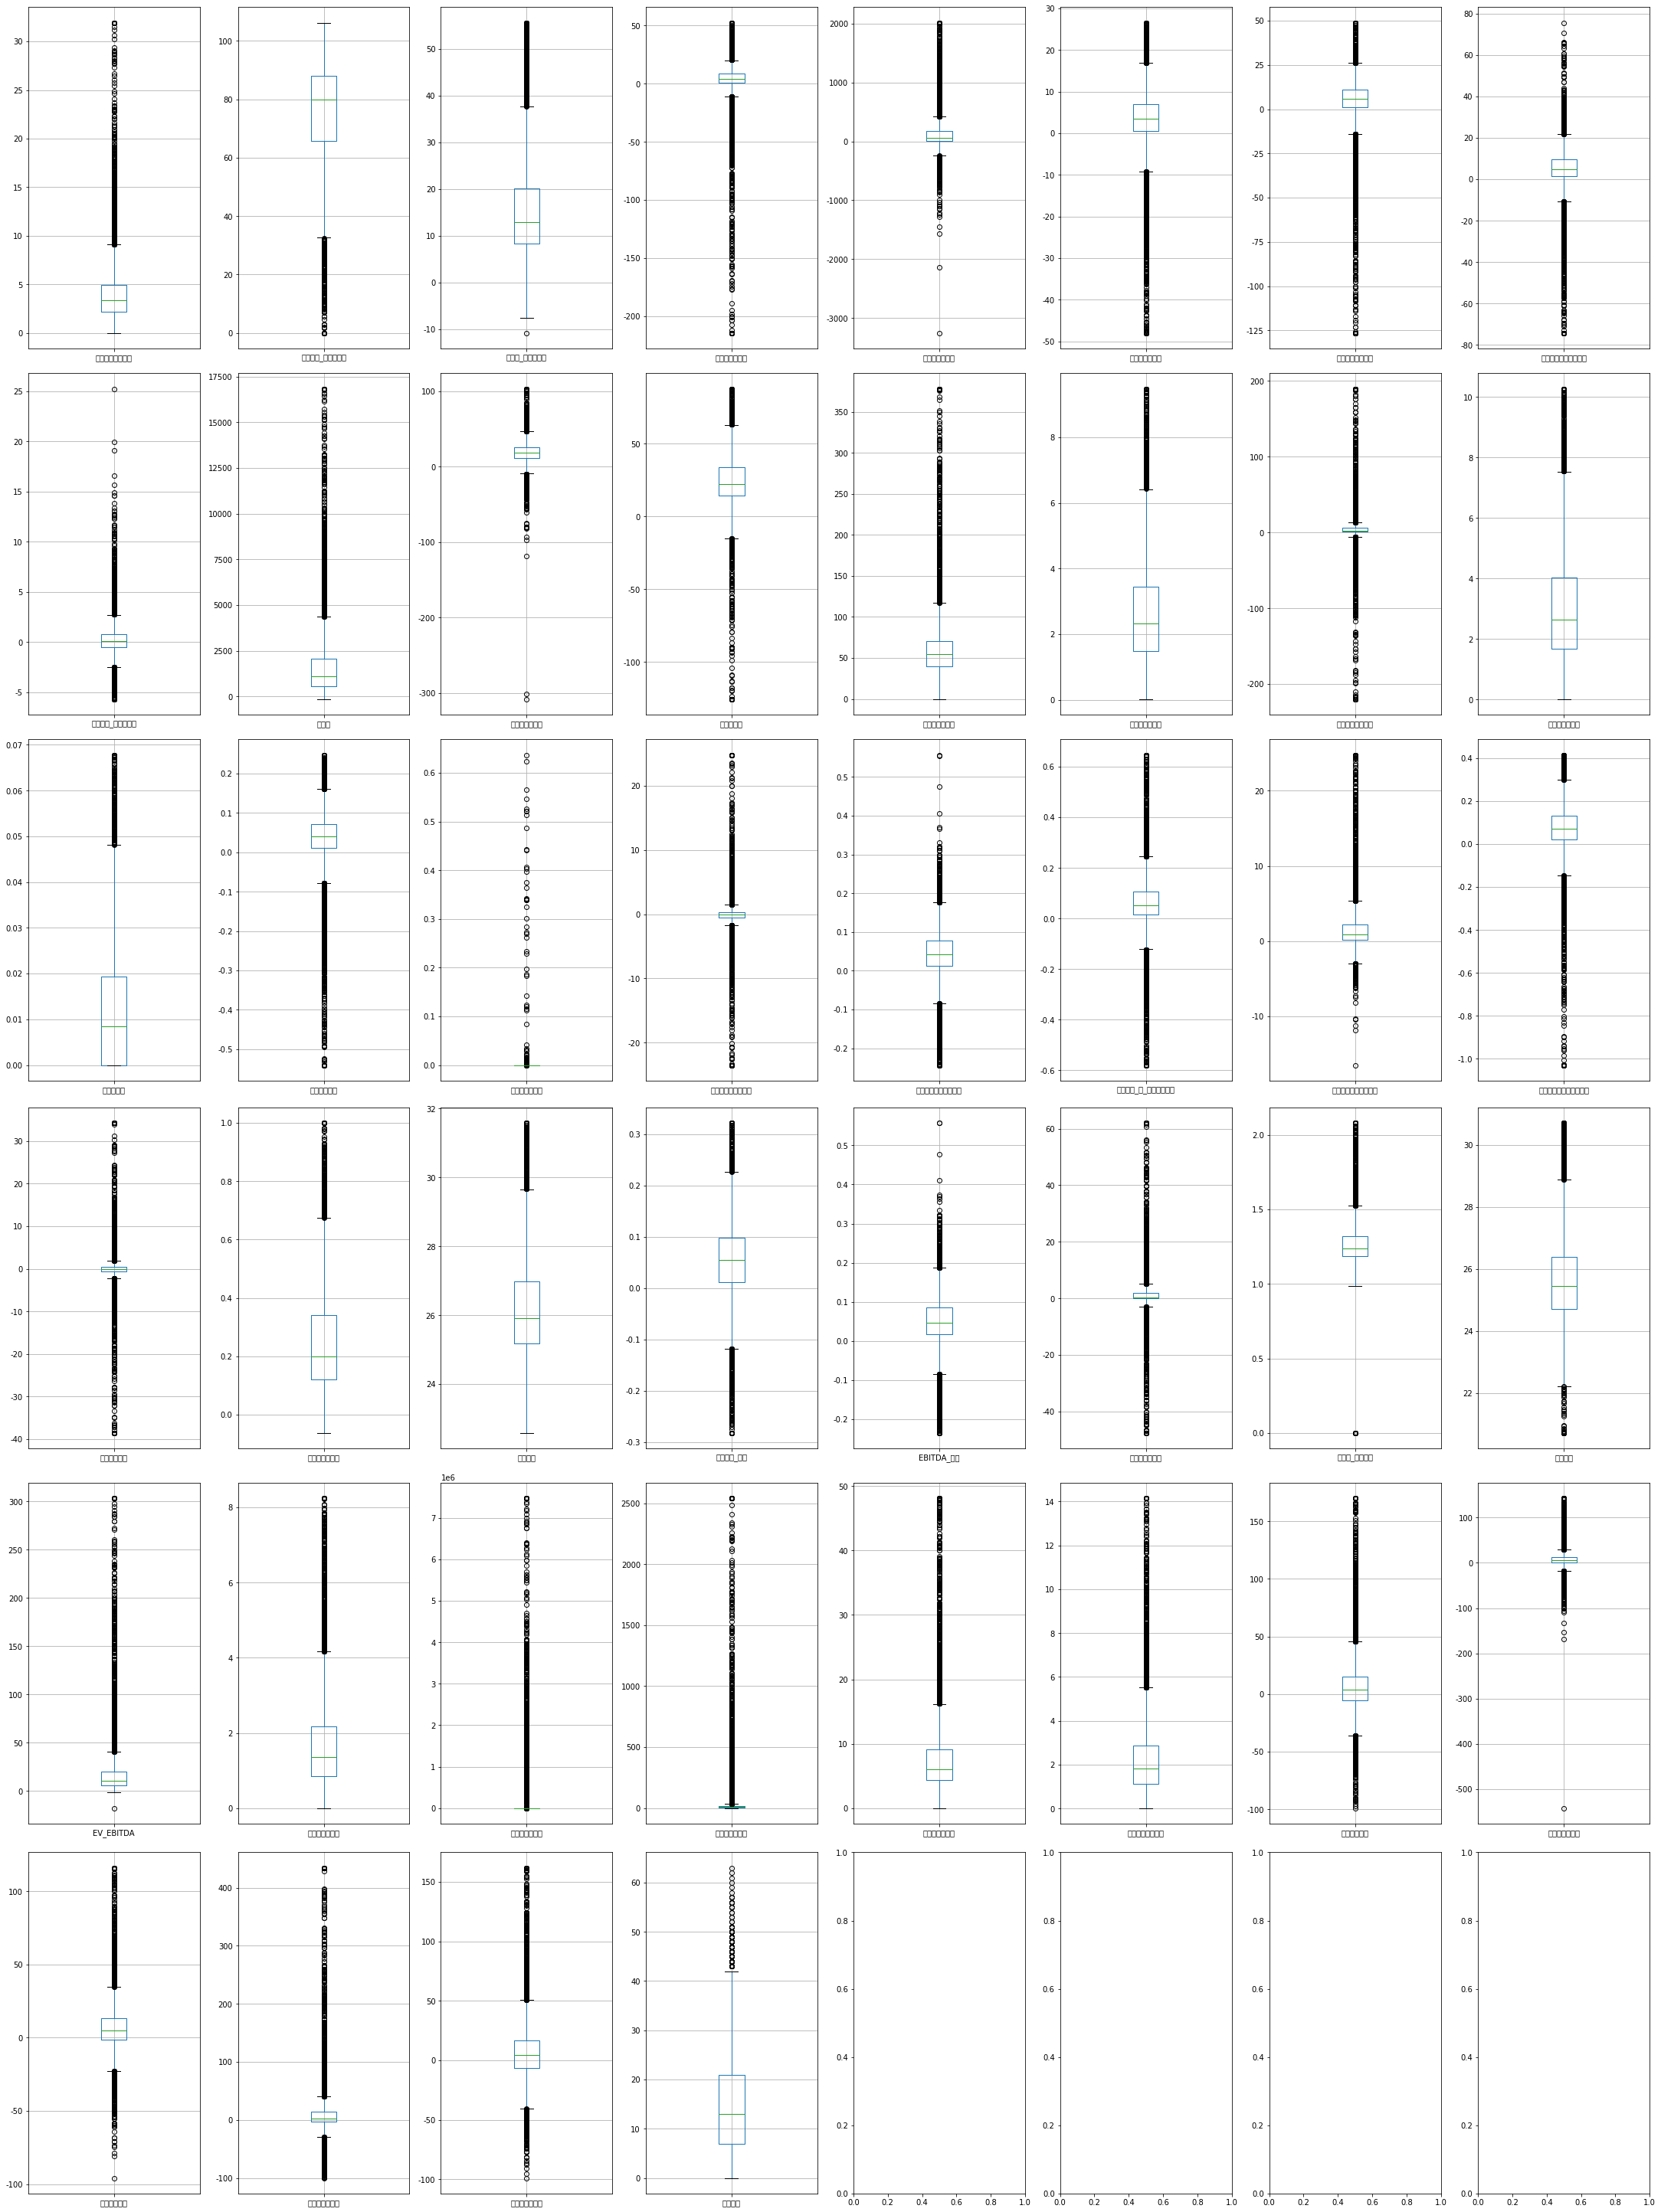

In [ ]:
ncols = 8
nrows = 6

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((30, 40))

for col, ax in zip(x_win.columns[:], axs.ravel()):
    x_win[[col]].boxplot(ax=ax)
    
plt.show()

In [ ]:
x = x_win.copy()

## 0_2. Scaling

> 변수명 설정
- standard scaler : st_scaled
- minmax scaler : mm_scaled
- robust scaler : rb_scaled
- maxabs scaler : ma_scaled

### 0_2_1. Standard_Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

x.feature = x.columns 

# StandardScaler객체 생성
st_scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
st_scaler.fit(x)
data_st_scaled = st_scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
st_scaled = pd.DataFrame(data = data_st_scaled, columns=x.feature)

# 인덱스가 달라서 똑같이 설정
st_scaled.index = x.index 

st_scaled

차입금평균이자율  매출원가_매출액비율  인건비_총비용비율  매출액순이익률  자본금순이익률  총자본순이익률  자기자본순이익률  \
0      0.28867    -0.06182    0.46367 -1.72395 -0.49465 -2.01736  -1.60350   
1      0.80708     0.45478    0.46084 -0.77039 -0.56233 -1.12325  -1.65165   
2      0.09369     0.17841   -0.50803 -0.78640 -0.44805 -0.90709  -0.46391   
3      0.55247     0.84135   -0.85175 -0.17970 -0.54485 -0.43984  -0.43877   
4      0.08452     0.62889   -0.68083  0.42167  0.08983  0.28615   0.73399   
...        ...         ...        ...      ...      ...      ...       ...   
9088  -0.43619     0.95243   -1.24175  0.01980  0.03609  0.00777   0.00209   
9089  -0.47518     0.96389   -1.26536  0.01241  0.01250 -0.01079  -0.00861   
9090  -0.30085     0.96697   -1.26347  0.01652  0.07621  0.03943   0.01332   
9091  -0.96148     0.96080   -1.25309  0.18358  1.31291  0.84511   0.43438   
9092   0.56164     1.07541   -1.06422 -0.16328 -0.59760 -0.70403  -1.03210   

      매출액정상영업이익률  금융비용_총비용비율      유보율  ...  매입채무회전율  재고자산회전율  매출채권회전율  \
0       -2.20472     0.86073 -0.74620  ... -0.32595 -0.22601 -0.88258   
1       -0.88724     4.06684 -0.71145  ... -0.32594 -0.22180 -0.27531   
2       -0.57939     0.82862 -0.71634  ... -0.32592 -0.23193  0.53959   
3       -0.04540     2.82508 -0.47039  ... -0.32595 -0.21605  0.41444   
4        0.03558     2.58422 -0.36194  ... -0.31941 -0.23218 -0.29522   
...          ...         ...      ...  ...      ...      ...      ...   
9088    -0.26863    -0.08130  1.11188  ...  7.11770 -0.02595  3.08103   
9089    -0.28249    -0.05453  1.12755  ...  7.11770 -0.05758  2.70984   
9090    -0.26936    -0.09735  1.14623  ...  7.11770  0.00375  3.26449   
9091    -0.29343    -0.15623  1.32433  ...  7.11770 -0.02769  3.33560   
9092    -0.37586     0.83397 -0.65161  ... -0.32594 -0.08304  2.75535   

      비유동자산회전율   매출액증가율  자기자본증가율   총자본증가율  유형자산증가율  유동자산증가율     상장기간  
0     -0.43277 -0.54402  3.04322  4.95657 -0.32481  5.19927 -0.40048  
1     -0.84867 -0.62789 -1.31887 -1.05200 -0.38839 -0.62117  1.78244  
2     -0.85319 -0.44736 -0.43729 -0.10116  0.26545 -0.67627  0.03611  
3     -0.82607 -0.55367 -0.51347 -0.72294 -0.28085 -0.72894 -1.01170  
4     -0.77182 -0.12562  0.38744 -0.57560 -0.28865 -0.74238  0.12342  
...        ...      ...      ...      ...      ...      ...      ...  
9088  -0.08920 -0.50490 -0.24840 -0.33593 -0.34988 -0.03056  0.56001  
9089  -0.00783  0.00987 -0.27344 -0.35606 -0.26453 -0.03116  0.64732  
9090   0.08258 -0.03173 -0.26658 -0.69347 -0.26105 -0.99734  0.73464  
9091   0.00121 -0.57468  0.10482  0.14784 -0.37342  2.45455  0.82196  
9092  -0.32427  0.16607 -1.07769 -0.55792 -0.26068 -0.80754  1.69513  

[9093 rows x 44 columns]

### 0_2_2. MinMax_Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

x.feature = x.columns 

# MinMaxScaler객체 생성
mm_scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
mm_scaler.fit(x)
data_mm_scaler = mm_scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
mm_scaled = pd.DataFrame(data = data_mm_scaler, columns=x.feature)

# 인덱스가 달라서 똑같이 설정
mm_scaled.index = x.index 

mm_scaled

차입금평균이자율  매출원가_매출액비율  인건비_총비용비율  매출액순이익률  자본금순이익률  총자본순이익률  자기자본순이익률  \
0      0.17074     0.67457    0.47046  0.64983  0.61310  0.43183   0.56819   
1      0.24154     0.78490    0.47000  0.73689  0.60899  0.54184   0.56305   
2      0.14411     0.72588    0.31535  0.73543  0.61593  0.56844   0.68979   
3      0.20677     0.86746    0.26048  0.79082  0.61005  0.62592   0.69247   
4      0.14286     0.82208    0.28776  0.84573  0.64858  0.71525   0.81761   
...        ...         ...        ...      ...      ...      ...       ...   
9088   0.07174     0.89118    0.19822  0.80904  0.64532  0.68099   0.73951   
9089   0.06642     0.89363    0.19445  0.80837  0.64389  0.67871   0.73837   
9090   0.09023     0.89429    0.19475  0.80874  0.64776  0.68489   0.74071   
9091   0.00000     0.89297    0.19641  0.82399  0.72284  0.78402   0.78564   
9092   0.20802     0.91744    0.22656  0.79232  0.60685  0.59342   0.62916   

      매출액정상영업이익률  금융비용_총비용비율     유보율  ...  매입채무회전율  재고자산회전율  매출채권회전율  \
0        0.32251     0.24069 0.00789  ...  0.00000  0.00225  0.03842   
1        0.44313     0.43473 0.01292  ...  0.00000  0.00277  0.12710   
2        0.47132     0.23874 0.01221  ...  0.00000  0.00151  0.24611   
3        0.52020     0.35957 0.04781  ...  0.00000  0.00349  0.22783   
4        0.52762     0.34500 0.06351  ...  0.00088  0.00148  0.12420   
...          ...         ...     ...  ...      ...      ...      ...   
9088     0.49977     0.18367 0.27683  ...  1.00000  0.02713  0.61724   
9089     0.49850     0.18529 0.27910  ...  1.00000  0.02319  0.56303   
9090     0.49970     0.18270 0.28180  ...  1.00000  0.03082  0.64403   
9091     0.49750     0.17914 0.30758  ...  1.00000  0.02691  0.65441   
9092     0.48995     0.23907 0.02158  ...  0.00000  0.02003  0.56968   

      비유동자산회전율  매출액증가율  자기자본증가율  총자본증가율  유형자산증가율  유동자산증가율    상장기간  
0      0.10325 0.33650  0.90057 0.96757  0.17949  1.00000 0.17460  
1      0.03819 0.32719  0.75794 0.39012  0.17245  0.34046 0.57143  
2      0.03748 0.34723  0.78677 0.48150  0.24485  0.33422 0.25397  
3      0.04173 0.33543  0.78427 0.42174  0.18436  0.32825 0.06349  
4      0.05021 0.38295  0.81373 0.43590  0.18349  0.32673 0.26984  
...        ...     ...      ...     ...      ...      ...     ...  
9088   0.15700 0.34084  0.79294 0.45894  0.17671  0.40738 0.34921  
9089   0.16973 0.39799  0.79212 0.45700  0.18616  0.40732 0.36508  
9090   0.18388 0.39337  0.79235 0.42457  0.18655  0.29783 0.38095  
9091   0.17115 0.33310  0.80449 0.50543  0.17411  0.68898 0.39683  
9092   0.12023 0.41533  0.76583 0.43760  0.18659  0.31934 0.55556  

[9093 rows x 44 columns]

### 0_2_3. Robust_Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

x.feature = x.columns 

# RobustScaler객체 생성
rb_scaler = RobustScaler()

# RobustScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
rb_scaler.fit(x)
data_rb_scaler = rb_scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
rb_scaled = pd.DataFrame(data = data_rb_scaler, columns=x.feature)

# 인덱스가 달라서 똑같이 설정
rb_scaled.index = x.index 

rb_scaled

차입금평균이자율  매출원가_매출액비율  인건비_총비용비율  매출액순이익률  자본금순이익률  총자본순이익률  자기자본순이익률  \
0      0.74460    -0.37466    0.64414 -5.69504 -0.52967 -2.96313  -3.25449   
1      1.55755     0.15374    0.64157 -2.74333 -0.65919 -1.70507  -3.34431   
2      0.43885    -0.12894   -0.23610 -2.79288 -0.44048 -1.40092  -1.12874   
3      1.15827     0.54914   -0.54748 -0.91487 -0.62575 -0.74347  -1.08184   
4      0.42446     0.33183   -0.39264  0.94663  0.58889  0.27803   1.10579   
...        ...         ...        ...      ...      ...      ...       ...   
9088  -0.39209     0.66276   -0.90077 -0.29733  0.48603 -0.11367  -0.25948   
9089  -0.45324     0.67448   -0.92216 -0.32020  0.44090 -0.13978  -0.27944   
9090  -0.17986     0.67764   -0.92044 -0.30750  0.56281 -0.06912  -0.23852   
9091  -1.21583     0.67133   -0.91104  0.20966  2.92957  1.06452   0.54691   
9092   1.17266     0.78855   -0.73995 -0.86404 -0.72668 -1.11521  -2.18862   

      매출액정상영업이익률  금융비용_총비용비율      유보율  ...     매입채무회전율  재고자산회전율  매출채권회전율  \
0       -3.76103     1.29231 -0.71968  ...    -0.11169 -0.24444 -0.89619   
1       -1.54779     5.90000 -0.66394  ...     0.04815 -0.13077  0.00847   
2       -1.03064     1.24615 -0.67179  ...     0.18732 -0.40427  1.22246   
3       -0.13358     4.11538 -0.27725  ...    -0.07916  0.02479  1.03602   
4        0.00245     3.76923 -0.10327  ...    82.65423 -0.41111 -0.02119   
...          ...         ...      ...  ...         ...      ...      ...   
9088    -0.50858    -0.06154  2.26098  ... 94272.29497  5.16154  5.00847   
9089    -0.53186    -0.02308  2.28611  ... 94272.29497  4.30684  4.45551   
9090    -0.50980    -0.08462  2.31607  ... 94272.29497  5.96410  5.28178   
9091    -0.55025    -0.16923  2.60179  ... 94272.29497  5.11453  5.38771   
9092    -0.68873     1.25385 -0.56795  ...     0.00240  3.61880  4.52331   

      비유동자산회전율   매출액증가율  자기자본증가율   총자본증가율  유형자산증가율  유동자산증가율     상장기간  
0     -0.18857 -0.61711  5.79726  7.22677 -0.35282  6.84215 -0.14286  
1     -0.71429 -0.74001 -2.29849 -1.25728 -0.56773 -0.64522  1.64286  
2     -0.72000 -0.47548 -0.66232  0.08530  1.64233 -0.71609  0.21429  
3     -0.68571 -0.63126 -0.80372 -0.79265 -0.20421 -0.78386 -0.64286  
4     -0.61714 -0.00405  0.86831 -0.58460 -0.23060 -0.80114  0.28571  
...        ...      ...      ...      ...      ...      ...      ...  
9088   0.24571 -0.55979 -0.31176 -0.24619 -0.43757  0.11454  0.64286  
9089   0.34857  0.19446 -0.35823 -0.27462 -0.14906  0.11377  0.71429  
9090   0.46286  0.13352 -0.34550 -0.75104 -0.13731 -1.12912  0.78571  
9091   0.36000 -0.66204  0.34379  0.43689 -0.51711  3.31137  0.85714  
9092  -0.05143  0.42333 -1.85087 -0.55964 -0.13603 -0.88496  1.57143  

[9093 rows x 44 columns]

### 0_2_4. MaxAbs_Scaling

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

x.feature = x.columns 

# RobustScaler객체 생성
ma_scaler = MaxAbsScaler()

# MaxAbsScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
ma_scaler.fit(x)
data_ma_scaler = ma_scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
ma_scaled = pd.DataFrame(data = data_ma_scaler, columns=x.feature)

# 인덱스가 달라서 똑같이 설정
ma_scaled.index = x.index 

ma_scaled

차입금평균이자율  매출원가_매출액비율  인건비_총비용비율  매출액순이익률  자본금순이익률  총자본순이익률  자기자본순이익률  \
0      0.17074     0.67457    0.36748 -0.19114 -0.00747 -0.32923  -0.21239   
1      0.24154     0.78490    0.36694 -0.08276 -0.01413 -0.15836  -0.21951   
2      0.14411     0.72588    0.18221 -0.08458 -0.00289 -0.11705  -0.04384   
3      0.20677     0.86746    0.11667 -0.01563 -0.01241 -0.02775  -0.04012   
4      0.14286     0.82208    0.14926  0.05272  0.04997  0.11100   0.13334   
...        ...         ...        ...      ...      ...      ...       ...   
9088   0.07174     0.89118    0.04231  0.00704  0.04469  0.05779   0.02509   
9089   0.06642     0.89363    0.03781  0.00620  0.04237  0.05425   0.02350   
9090   0.09023     0.89429    0.03817  0.00667  0.04863  0.06384   0.02675   
9091   0.00000     0.89297    0.04015  0.02566  0.17018  0.21782   0.08902   
9092   0.20802     0.91744    0.07616 -0.01376 -0.01759 -0.07824  -0.12788   

      매출액정상영업이익률  금융비용_총비용비율      유보율  ...  매입채무회전율  재고자산회전율  매출채권회전율  \
0       -0.34233     0.07058 -0.00026  ...  0.00000  0.00225  0.03842   
1       -0.10335     0.30809  0.00481  ...  0.00000  0.00277  0.12710   
2       -0.04751     0.06820  0.00410  ...  0.00000  0.00151  0.24611   
3        0.04936     0.21610  0.03999  ...  0.00000  0.00349  0.22783   
4        0.06405     0.19826  0.05582  ...  0.00088  0.00148  0.12420   
...          ...         ...      ...  ...      ...      ...      ...   
9088     0.00887     0.00079  0.27089  ...  1.00000  0.02713  0.61724   
9089     0.00635     0.00278  0.27318  ...  1.00000  0.02319  0.56303   
9090     0.00873    -0.00040  0.27591  ...  1.00000  0.03082  0.64403   
9091     0.00437    -0.00476  0.30190  ...  1.00000  0.02691  0.65441   
9092    -0.01059     0.06860  0.01355  ...  0.00000  0.02003  0.56968   

      비유동자산회전율   매출액증가율  자기자본증가율   총자본증가율  유형자산증가율  유동자산증가율    상장기간  
0      0.10452 -0.04956  0.13865  0.94079 -0.00951  1.00000 0.17460  
1      0.03955 -0.06429 -0.04169 -0.11369 -0.01818 -0.06231 0.57143  
2      0.03884 -0.03259 -0.00524  0.05318  0.07090 -0.07237 0.25397  
3      0.04308 -0.05126 -0.00839 -0.05594 -0.00352 -0.08198 0.06349  
4      0.05155  0.02391  0.02886 -0.03008 -0.00459 -0.08444 0.26984  
...        ...      ...      ...      ...      ...      ...     ...  
9088   0.15819 -0.04269  0.00257  0.01198 -0.01293  0.04548 0.34921  
9089   0.17090  0.04771  0.00154  0.00845 -0.00130  0.04537 0.36508  
9090   0.18503  0.04040  0.00182 -0.05077 -0.00083 -0.13097 0.38095  
9091   0.17232 -0.05494  0.01717  0.09688 -0.01614  0.49905 0.39683  
9092   0.12147  0.07514 -0.03171 -0.02698 -0.00078 -0.09633 0.55556  

[9093 rows x 44 columns]



---



---



# ---------< scaling별 검정 >---------


# 1.standard_scaling

### 1.VIF / Heatmap 확인

In [ ]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

In [ ]:
# x VIF
vif(st_scaled).head(10)

VIF Factor       features
0 65478317.50414     매출원가_매출액비율
1 65478204.69278        매출액총이익률
2       75.15950     총자본정상영업이익률
3       74.28128        총자본순이익률
4       63.54245      EBITDA_자산
5       58.63946         기업순이익률
6       28.89460     매출액정상영업이익률
7       24.25733  영업비용_대_영업수익비율
8       11.59479        매출액순이익률
9       10.86182       자기자본순이익률

In [ ]:
# heatmap 그리기 전 초기작업
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib
from matplotlib import rc

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
#rc('font', family='AppleGothic') # Mac Os
rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# 상관행렬 시각화
mask_ut=np.triu(np.ones(st_scaled.corr().shape)).astype(bool)  # 배열 행렬에 위쪽 삼각형 반환 -> True
plt.figure(figsize=(30,30))
sns.heatmap(st_scaled.corr(method='pearson'), annot = True, cmap = 'YlGnBu', cbar_kws={"shrink": .5}, 
              annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
plt.show()

## 3.회귀가정 검정

### 3_1. 정규성 검정
**qq-plot, Distplot, Shapiro-wilk test, ks-test**
- 표본이 대표본(n>30)이면 중심극한정리에 따라 정규성을 띈다고 가정함 

#### Shapiro-wilk test
- 귀무가설 : 정규분포를 따른다. (정규성을 띈다.)
- 대립가설 : 정규분포를 따르지 않는다. (정규성을 띄지 않는다.)
-> p-value > 0.05 면 귀무가설 채택으로 정규성을 따름 A

In [ ]:
# 샤피로 - 윌크
from scipy.stats import shapiro
def normal_test(st_exvif):
    list = []
    for var in st_exvif.columns :
        stat, p  = shapiro(st_exvif[var].values)
        list.append([var, "{}".format(stat),"{}".format(p)])

    data = pd.DataFrame(list, columns = ['x_feature','stat','p_value'])
    data = data.astype({'p_value':'float'})

    h0 = data[(data['p_value']) > 0.05] 
    h1 = data[(data['p_value']) <= 0.05]

    return data, h0, h1  

In [ ]:
data, h0, h1 = normal_test(st_scaled)
h0

Empty DataFrame
Columns: [x_feature, stat, p_value]
Index: []

In [ ]:
h1

x_feature                  stat  p_value
0        차입금평균이자율    0.6639828681945801  0.00000
1      매출원가_매출액비율    0.8306467533111572  0.00000
2       인건비_총비용비율    0.8842815160751343  0.00000
3         매출액순이익률   0.49164336919784546  0.00000
4         자본금순이익률    0.6756610870361328  0.00000
5         총자본순이익률    0.8336945176124573  0.00000
6        자기자본순이익률    0.6985613107681274  0.00000
7      매출액정상영업이익률    0.7559583187103271  0.00000
8      금융비용_총비용비율    0.8449916243553162  0.00000
9             유보율    0.6097176671028137  0.00000
10        총자본투자효율    0.8224026560783386  0.00000
11          부가가치율    0.8274199366569519  0.00000
12        노동소득분배율    0.6535801291465759  0.00000
13        당좌자산회전률    0.8989275693893433  0.00000
14       순운전자본회전률    0.4566754102706909  0.00000
15        타인자본회전률    0.9003453254699707  0.00000
16          이자부담률     0.825718343257904  0.00000
17         기업순이익률    0.7771073579788208  0.00000
18        금융비용부담률  0.033843815326690674  0.00000
19      정상영업이익증가율   0.49282950162887573  0.00000
20     총자본정상영업이익률    0.9290149211883545  0.00000
21  영업비용_대_영업수익비율    0.8569566011428833  0.00000
22     자본금정상영업이익률    0.6281898021697998  0.00000
23    자기자본정상영업이익률    0.7594351768493652  0.00000
24         순이익증가율   0.47515881061553955  0.00000
25        매출액총이익률    0.8306434154510498  0.00000
26           기업규모    0.9355263710021973  0.00000
27        현금흐름_자산     0.966934859752655  0.00000
28      EBITDA_자산    0.9348639845848083  0.00000
29        단기상환부담률    0.5126147270202637  0.00000
30       매출액_이자비용    0.6274095177650452  0.00000
31           기업가치    0.9541015028953552  0.00000
32      EV_EBITDA   0.43925195932388306  0.00000
33        자기자본회전율     0.793616533279419  0.00000
34        매입채무회전율   0.36150622367858887  0.00000
35        재고자산회전율   0.23326855897903442  0.00000
36        매출채권회전율    0.6452294588088989  0.00000
37       비유동자산회전율    0.7205331325531006  0.00000
38         매출액증가율    0.7896652221679688  0.00000
39        자기자본증가율    0.7190797328948975  0.00000
40         총자본증가율    0.7998611927032471  0.00000
41        유형자산증가율   0.48449158668518066  0.00000
42        유동자산증가율    0.8278438448905945  0.00000
43           상장기간    0.9121019244194031  0.00000

#### ks test 
- 표본 수가 2000개 이상, 0이 나오면 정규성을 띈다고 가정

In [ ]:
from scipy.stats import stats
def ks_test(x):
    list = []
    for var in x.columns :
        stat, p  = stats.kstest(x[var].values, 'norm')
        list.append([var, "{}".format(stat),"{}".format(p)])

    data = pd.DataFrame(list, columns = ['x_feature','stat','p_value'])
    data = data.astype({'p_value':'float'})

    h0 = data[data['p_value'] > 0.05] 
    h1 = data[data['p_value'] <= 0.05]

    return h0, h1

In [ ]:
h0, h1 = ks_test(st_scaled)
h0

Empty DataFrame
Columns: [x_feature, stat, p_value]
Index: []

In [ ]:
h1

x_feature                 stat  p_value
0        차입금평균이자율    0.184074836771409  0.00000
1      매출원가_매출액비율  0.15028371043330674  0.00000
2       인건비_총비용비율  0.10848982392867212  0.00000
3         매출액순이익률    0.285597605089817  0.00000
4         자본금순이익률  0.20297524459458638  0.00000
5         총자본순이익률  0.16957167684730032  0.00000
6        자기자본순이익률   0.2181520148565648  0.00000
7      매출액정상영업이익률  0.20377217649799326  0.00000
8      금융비용_총비용비율  0.13103066399078545  0.00000
9             유보율   0.2201587134868076  0.00000
10        총자본투자효율  0.10015340632008465  0.00000
11          부가가치율  0.12223032604908557  0.00000
12        노동소득분배율  0.19745723377515423  0.00000
13        당좌자산회전률  0.09006675947667309  0.00000
14       순운전자본회전률   0.3229117273104465  0.00000
15        타인자본회전률  0.10650686612908933  0.00000
16          이자부담률  0.19082550094416745  0.00000
17         기업순이익률   0.1874435005971292  0.00000
18        금융비용부담률    0.513682717380865  0.00000
19      정상영업이익증가율  0.26867513356164463  0.00000
20     총자본정상영업이익률     0.11186008533579  0.00000
21  영업비용_대_영업수익비율  0.15525242552646784  0.00000
22     자본금정상영업이익률  0.21652058975488342  0.00000
23    자기자본정상영업이익률  0.17587956431659843  0.00000
24         순이익증가율  0.28214689794068015  0.00000
25        매출액총이익률  0.15029843114194402  0.00000
26           기업규모  0.09492515554385816  0.00000
27        현금흐름_자산  0.06068970587599362  0.00000
28      EBITDA_자산  0.10501554741132699  0.00000
29        단기상환부담률  0.31359625912698297  0.00000
30       매출액_이자비용   0.3263082738901043  0.00000
31           기업가치  0.07636441236576563  0.00000
32      EV_EBITDA  0.29899702261995964  0.00000
33        자기자본회전율   0.1528720629756204  0.00000
34        매입채무회전율  0.41031885718953687  0.00000
35        재고자산회전율  0.41436194852758573  0.00000
36        매출채권회전율  0.19332569210585604  0.00000
37       비유동자산회전율  0.17558372419640123  0.00000
38         매출액증가율  0.16099727959459265  0.00000
39        자기자본증가율  0.16987680194422772  0.00000
40         총자본증가율   0.1538668830687442  0.00000
41        유형자산증가율  0.27660824985790244  0.00000
42        유동자산증가율  0.13882280527625435  0.00000
43           상장기간  0.11623313523732126  0.00000

#### qq-plot

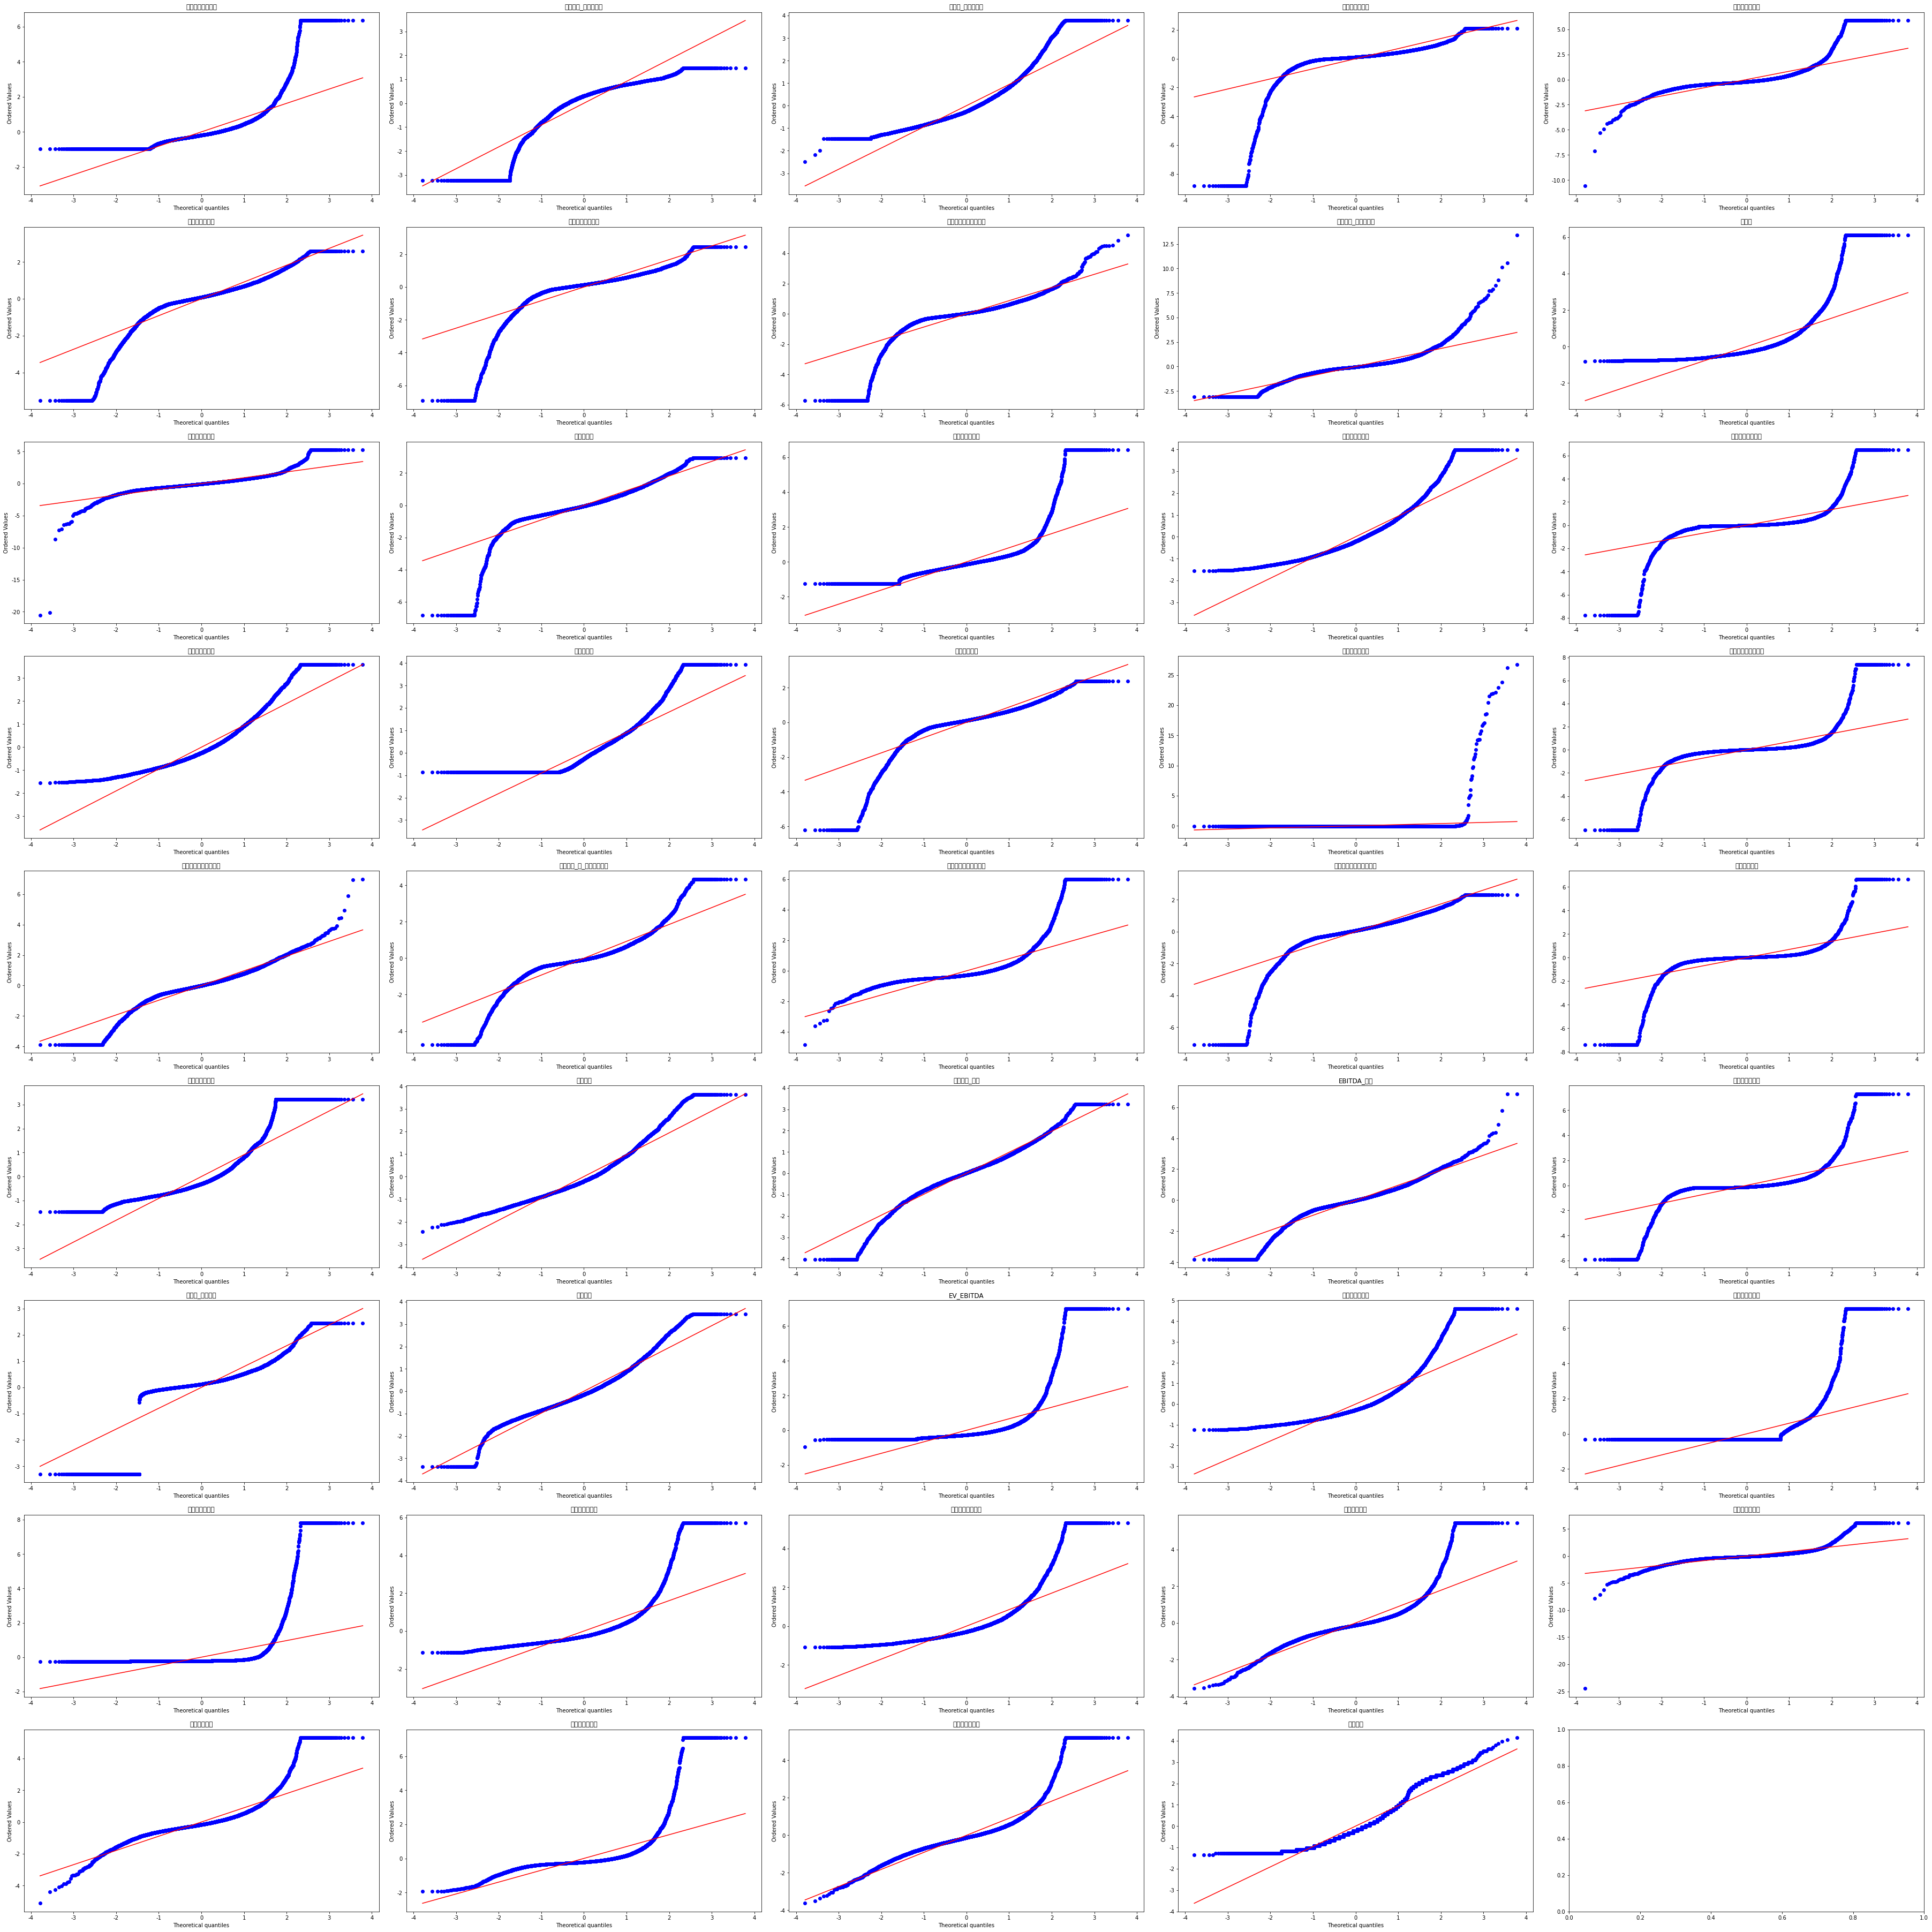

In [ ]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "NanumGothic"

ncols = 5
nrows = 9

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
fig.set_size_inches((50, 50))

for ax, i in zip(axs.ravel(), st_scaled):
       stats.probplot(st_scaled[i], dist=stats.norm, plot=ax)
       ax.set_title(str(i))

plt.show()

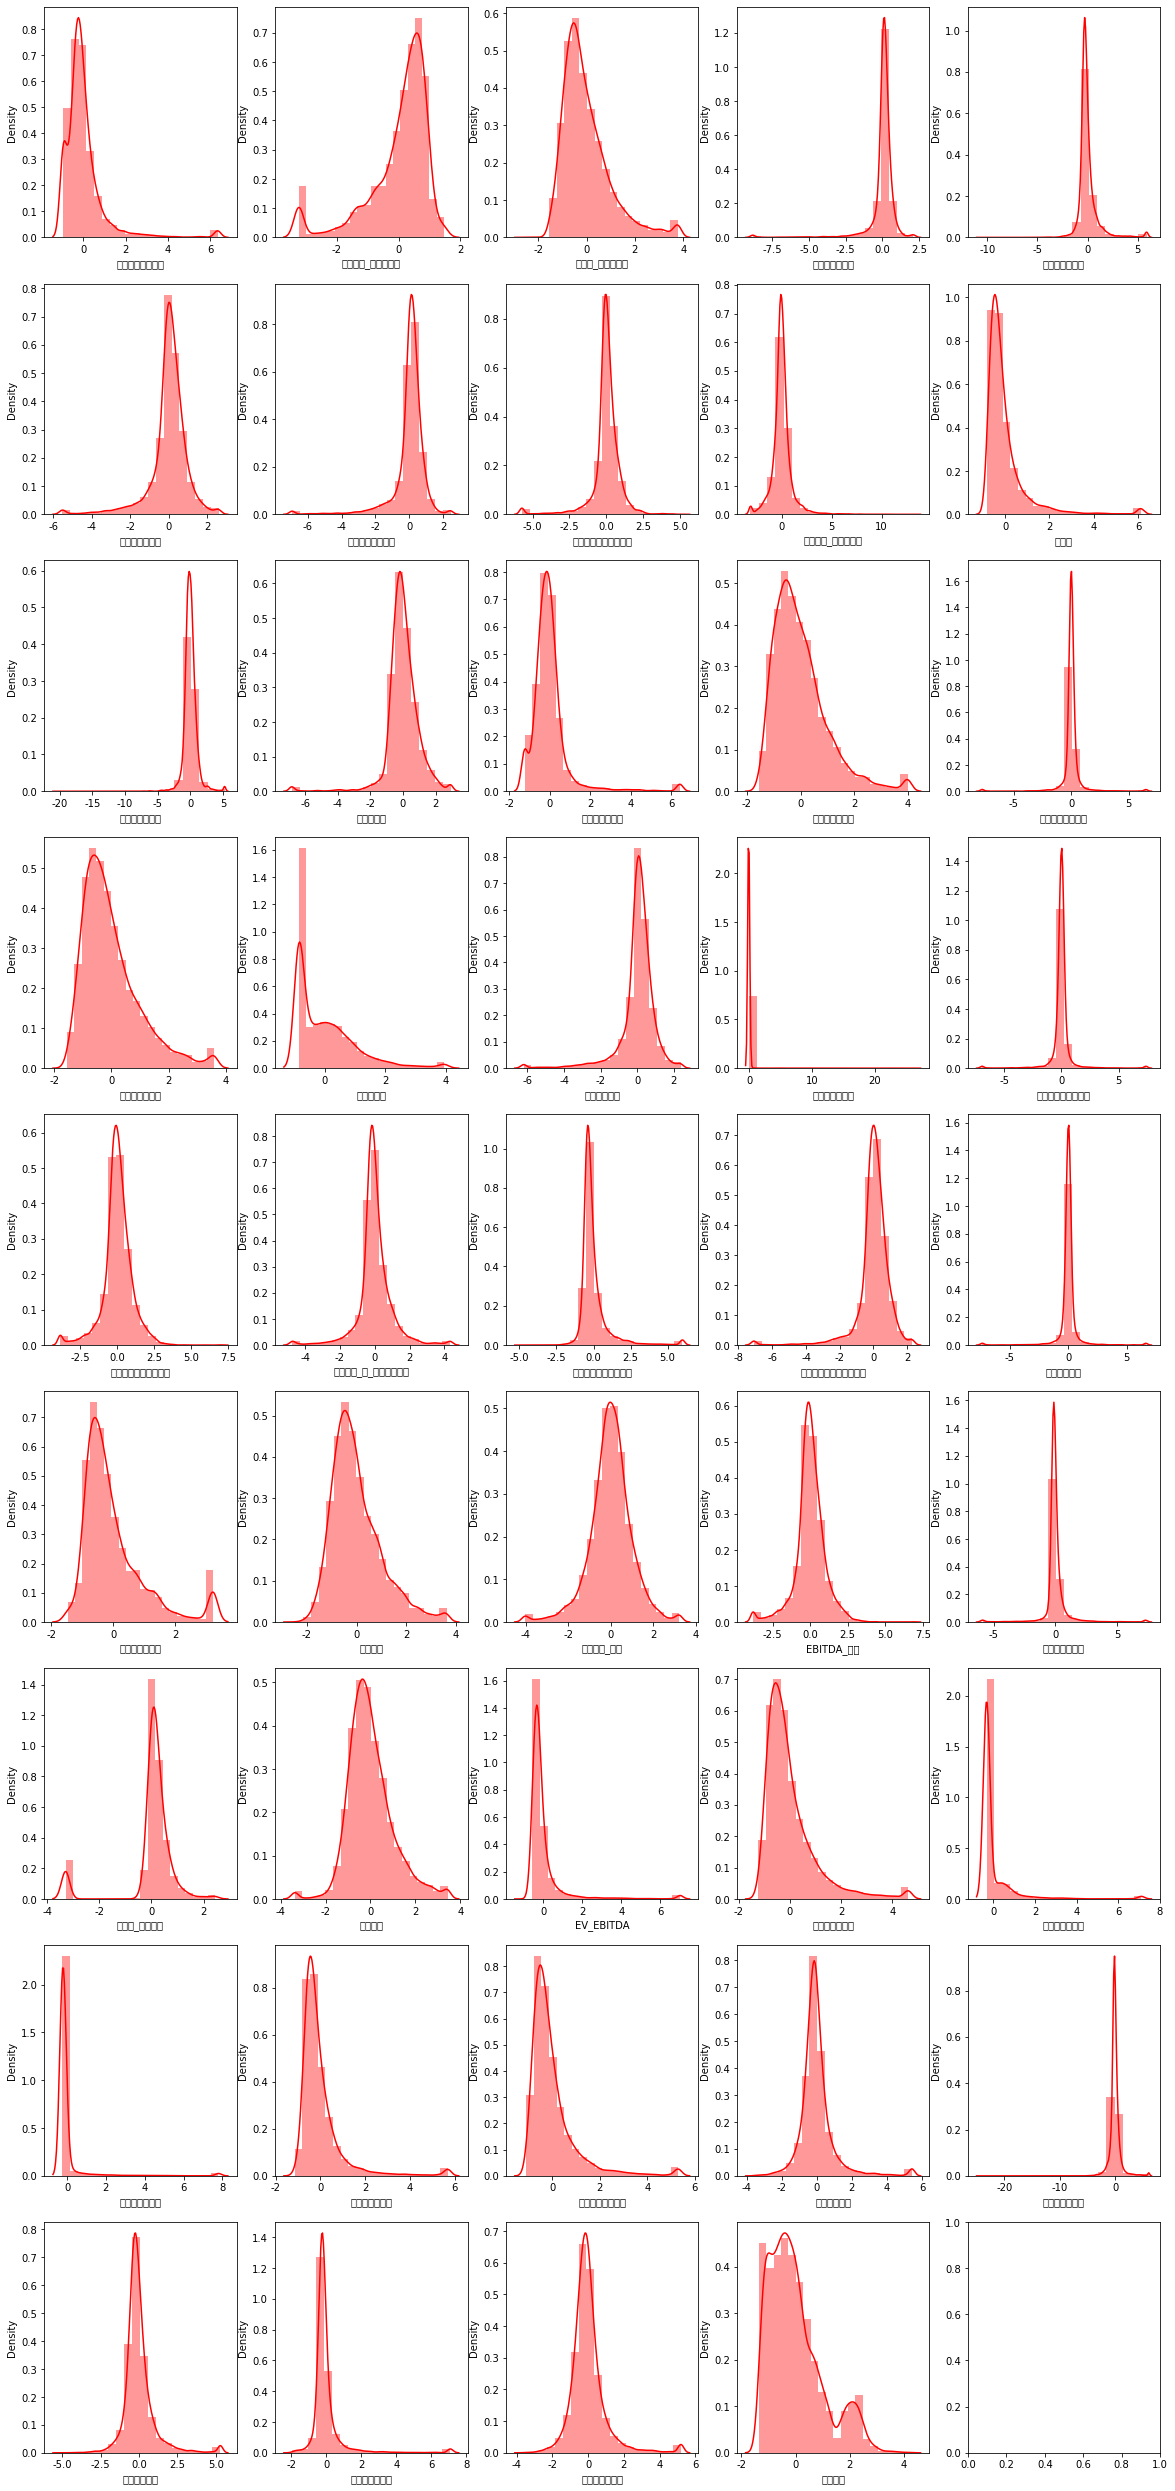

In [ ]:
# distplot
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False
col_n = 5
row_n = 9

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i, col in enumerate(st_scaled.columns[:]):
    sns.distplot(st_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')
  
# plt.tight_layout()

### 3_2. 등분산성 검정
- H0 : 모집단의 표준편차가 같다(등분산)
- H1 : 모집단의 표준편차가 다르다(이분산)
-> H가 1인 경우 이분산성

In [ ]:
y = df_total[['y']]
df_bart = pd.concat([st_scaled, y], axis=1)
df_bart

차입금평균이자율  매출원가_매출액비율  인건비_총비용비율  매출액순이익률  자본금순이익률  총자본순이익률  자기자본순이익률  \
0      0.28867    -0.06182    0.46367 -1.72395 -0.49465 -2.01736  -1.60350   
1      0.80708     0.45478    0.46084 -0.77039 -0.56233 -1.12325  -1.65165   
2      0.09369     0.17841   -0.50803 -0.78640 -0.44805 -0.90709  -0.46391   
3      0.55247     0.84135   -0.85175 -0.17970 -0.54485 -0.43984  -0.43877   
4      0.08452     0.62889   -0.68083  0.42167  0.08983  0.28615   0.73399   
...        ...         ...        ...      ...      ...      ...       ...   
9088  -0.43619     0.95243   -1.24175  0.01980  0.03609  0.00777   0.00209   
9089  -0.47518     0.96389   -1.26536  0.01241  0.01250 -0.01079  -0.00861   
9090  -0.30085     0.96697   -1.26347  0.01652  0.07621  0.03943   0.01332   
9091  -0.96148     0.96080   -1.25309  0.18358  1.31291  0.84511   0.43438   
9092   0.56164     1.07541   -1.06422 -0.16328 -0.59760 -0.70403  -1.03210   

      매출액정상영업이익률  금융비용_총비용비율      유보율  ...  재고자산회전율  매출채권회전율  비유동자산회전율  \
0       -2.20472     0.86073 -0.74620  ... -0.22601 -0.88258  -0.43277   
1       -0.88724     4.06684 -0.71145  ... -0.22180 -0.27531  -0.84867   
2       -0.57939     0.82862 -0.71634  ... -0.23193  0.53959  -0.85319   
3       -0.04540     2.82508 -0.47039  ... -0.21605  0.41444  -0.82607   
4        0.03558     2.58422 -0.36194  ... -0.23218 -0.29522  -0.77182   
...          ...         ...      ...  ...      ...      ...       ...   
9088    -0.26863    -0.08130  1.11188  ... -0.02595  3.08103  -0.08920   
9089    -0.28249    -0.05453  1.12755  ... -0.05758  2.70984  -0.00783   
9090    -0.26936    -0.09735  1.14623  ...  0.00375  3.26449   0.08258   
9091    -0.29343    -0.15623  1.32433  ... -0.02769  3.33560   0.00121   
9092    -0.37586     0.83397 -0.65161  ... -0.08304  2.75535  -0.32427   

       매출액증가율  자기자본증가율   총자본증가율  유형자산증가율  유동자산증가율     상장기간       y  
0    -0.54402  3.04322  4.95657 -0.32481  5.19927 -0.40048 1.00000  
1    -0.62789 -1.31887 -1.05200 -0.38839 -0.62117  1.78244 1.00000  
2    -0.44736 -0.43729 -0.10116  0.26545 -0.67627  0.03611 1.00000  
3    -0.55367 -0.51347 -0.72294 -0.28085 -0.72894 -1.01170 1.00000  
4    -0.12562  0.38744 -0.57560 -0.28865 -0.74238  0.12342 1.00000  
...       ...      ...      ...      ...      ...      ...     ...  
9088 -0.50490 -0.24840 -0.33593 -0.34988 -0.03056  0.56001 0.00000  
9089  0.00987 -0.27344 -0.35606 -0.26453 -0.03116  0.64732 0.00000  
9090 -0.03173 -0.26658 -0.69347 -0.26105 -0.99734  0.73464 0.00000  
9091 -0.57468  0.10482  0.14784 -0.37342  2.45455  0.82196 0.00000  
9092  0.16607 -1.07769 -0.55792 -0.26068 -0.80754  1.69513 1.00000  

[9093 rows x 45 columns]

In [ ]:
from scipy.stats import bartlett
def bartlettTest(col, y0, y1, p_value = 0.05, H=1):

  list= []
  for i in col:
      t, p_val = bartlett(y0[i], y1[i]) 
      list.append([i, "{}".format(p_val)])

  data = pd.DataFrame(list, columns = ['x_feature', 'p_value'])

  data = data.astype({'p_value':'float'})
  if H == 1:
    data_h1 = data[data['p_value']< p_value]
    return data_h1
  else:
    data_h0 = data[data['p_value']>= p_value]
    return data_h0

In [ ]:
# 등분산
df_bart_h0= bartlettTest(df_bart.columns, df_bart[df_bart['y']==0], df_bart[df_bart['y']==1], H = 0)
df_bart_h0

x_feature  p_value
10   총자본투자효율  0.35372
13   당좌자산회전률  0.54513
26      기업규모  0.75918

In [ ]:
# 이분산
df_bart_h1= bartlettTest(df_bart.columns, df_bart[df_bart['y']==0], df_bart[df_bart['y']==1], H = 1)
df_bart_h1

x_feature  p_value
0        차입금평균이자율  0.00000
1      매출원가_매출액비율  0.00000
2       인건비_총비용비율  0.00000
3         매출액순이익률  0.00000
4         자본금순이익률  0.00000
5         총자본순이익률  0.00000
6        자기자본순이익률  0.00000
7      매출액정상영업이익률  0.00000
8      금융비용_총비용비율  0.00000
9             유보율  0.00000
11          부가가치율  0.00000
12        노동소득분배율  0.00000
14       순운전자본회전률  0.00000
15        타인자본회전률  0.00000
16          이자부담률  0.00000
17         기업순이익률  0.00000
18        금융비용부담률  0.00000
19      정상영업이익증가율  0.00000
20     총자본정상영업이익률  0.00002
21  영업비용_대_영업수익비율  0.00000
22     자본금정상영업이익률  0.00000
23    자기자본정상영업이익률  0.00000
24         순이익증가율  0.00000
25        매출액총이익률  0.00000
27        현금흐름_자산  0.00000
28      EBITDA_자산  0.00030
29        단기상환부담률  0.00000
30       매출액_이자비용  0.00000
31           기업가치  0.00003
32      EV_EBITDA  0.00000
33        자기자본회전율  0.00000
34        매입채무회전율  0.00000
35        재고자산회전율  0.00000
36        매출채권회전율  0.03323
37       비유동자산회전율  0.00000
38         매출액증가율  0.00000
39        자기자본증가율  0.00000
40         총자본증가율  0.00000
41        유형자산증가율  0.00000
42        유동자산증가율  0.00000
43           상장기간  0.00015

### 3_3. 독립성 검정 (Durbin Watson)
-> H0 : There is no correlation among the residuals. 자기상관이 존재하지 않는다.  
-> H1 : The residuals are autocorrelated. 자기상관이 존재한다.  
=> 2에 가까울수록 독립성 가정을 만족한다.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

# 검정을 위한 데이터 준비
durbin = x_win.copy()
y = df_total[['y']]

# 독립성 검정 진행
dfX = sm.add_constant(durbin) # 상수항 추가
df = pd.concat([dfX, y], axis=1)

model_durbin = sm.OLS(y, dfX)
result_durbin = model_durbin.fit()
print(result_durbin.summary())

durbin_watson(result_durbin.resid)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     148.6
Date:                Fri, 30 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:13:07   Log-Likelihood:                 933.91
No. Observations:                9093   AIC:                            -1778.
Df Residuals:                    9048   BIC:                            -1458.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -53.9133     81.876     -0.658

1.3586929933330363

## 4.feature_selection

### 4_1. t-test

In [ ]:
# 1. 각각의 데이터셋에 대해 t_test 진행 
import scipy.stats as stats
def t_test(col, df_h0, df_h1, y0, y1, p_value = 0.05):
  list= []
  for i in col:
    if (df_h0['x_feature']==i).any():
        t_stat, p_val = stats.ttest_ind(y0[i], y1[i], equal_var=True, alternative='two-sided')
        list.append([i, p_val])
    elif (df_h1['x_feature']==i).any():
        t_stat, p_val = stats.ttest_ind(y0[i], y1[i], equal_var=False, alternative='two-sided')
        list.append([i, p_val])

  df = pd.DataFrame(list, columns = ['x_feature', 'p_value'])
  a = df[(df['p_value'] < p_value)][['x_feature', 'p_value']].sort_values('p_value')
  return a

In [ ]:
# t_test 결과 p_value < 0.05보다 작은 유의한 변수 가져오기
x_ttest_sd = t_test(df_bart.columns, df_bart_h0, df_bart_h1, df_bart[df_bart['y']==0], df_bart[df_bart['y']==1], p_value=0.05)
x_ttest_sd

x_feature  p_value
15        타인자본회전률  0.00000
22     자본금정상영업이익률  0.00000
28      EBITDA_자산  0.00000
20     총자본정상영업이익률  0.00000
4         자본금순이익률  0.00000
21  영업비용_대_영업수익비율  0.00000
10        총자본투자효율  0.00000
9             유보율  0.00000
5         총자본순이익률  0.00000
8      금융비용_총비용비율  0.00000
6        자기자본순이익률  0.00000
17         기업순이익률  0.00000
27        현금흐름_자산  0.00000
16          이자부담률  0.00000
23    자기자본정상영업이익률  0.00000
7      매출액정상영업이익률  0.00000
3         매출액순이익률  0.00000
31           기업가치  0.00000
11          부가가치율  0.00000
1      매출원가_매출액비율  0.00000
25        매출액총이익률  0.00000
0        차입금평균이자율  0.00000
39        자기자본증가율  0.00000
37       비유동자산회전율  0.00000
12        노동소득분배율  0.00000
30       매출액_이자비용  0.00000
33        자기자본회전율  0.00000
38         매출액증가율  0.00000
43           상장기간  0.00000
26           기업규모  0.00000
2       인건비_총비용비율  0.00000
35        재고자산회전율  0.00000
24         순이익증가율  0.00000
19      정상영업이익증가율  0.00000
34        매입채무회전율  0.00000
36        매출채권회전율  0.00000
18        금융비용부담률  0.00001
14       순운전자본회전률  0.00006
32      EV_EBITDA  0.00529

In [ ]:
len(x_ttest_sd)

39

In [ ]:
x_ttest_sd['x_feature'].unique()

array(['타인자본회전률', '자본금정상영업이익률', 'EBITDA_자산', '총자본정상영업이익률', '자본금순이익률',
       '영업비용_대_영업수익비율', '총자본투자효율', '유보율', '총자본순이익률', '금융비용_총비용비율',
       '자기자본순이익률', '기업순이익률', '현금흐름_자산', '이자부담률', '자기자본정상영업이익률',
       '매출액정상영업이익률', '매출액순이익률', '기업가치', '부가가치율', '매출원가_매출액비율', '매출액총이익률',
       '차입금평균이자율', '자기자본증가율', '비유동자산회전율', '노동소득분배율', '매출액_이자비용',
       '자기자본회전율', '매출액증가율', '상장기간', '기업규모', '인건비_총비용비율', '재고자산회전율',
       '순이익증가율', '정상영업이익증가율', '매입채무회전율', '매출채권회전율', '금융비용부담률', '순운전자본회전률',
       'EV_EBITDA'], dtype=object)

In [ ]:
# t_test 유의미한 변수 datasets 생성
t_list = x_ttest_sd['x_feature'].unique()
df_ttest = pd.DataFrame()

for i in t_list:
  df = x[[i]]
  df_ttest = pd.concat([df_ttest, df], axis=1)

df_ttest

타인자본회전률  자본금정상영업이익률  EBITDA_자산  총자본정상영업이익률   자본금순이익률  영업비용_대_영업수익비율  \
0     0.93453    -0.12739   -0.07188    -0.07364 -24.28000       -0.20554   
1     0.58928    -0.20106   -0.03404    -0.03599 -45.89000       -0.07343   
2     0.90328    -0.02910   -0.00437    -0.01077  -9.40000       -0.03463   
3     0.53848     0.44720    0.01661     0.01534 -40.31000        0.03850   
4     0.69684     0.68279    0.02644     0.02321 162.34000        0.05085   
...       ...         ...        ...         ...       ...            ...   
9088 10.26429     0.64253    0.01704     0.01218 145.18000        0.00675   
9089 10.26429     0.50099    0.01435     0.00940 137.65000        0.00486   
9090 10.26429     0.72829    0.01930     0.01453 157.99000        0.00662   
9091 10.26429     0.33384    0.01207     0.00599 552.86000        0.00333   
9092  1.65098    -0.15483   -0.00927    -0.01031 -57.15000       -0.00792   

      총자본투자효율        유보율   총자본순이익률  금융비용_총비용비율  ...     기업규모  인건비_총비용비율  \
0     0.47000   -4.31000 -15.78000     1.78000  ... 24.76821   20.41000   
1    18.17000   80.99000  -7.59000     7.77000  ... 27.81255   20.38000   
2     1.04000   68.98000  -5.61000     1.72000  ... 25.44560   10.12000   
3     7.02000  672.79000  -1.33000     5.45000  ... 29.58216    6.48000   
4    10.06000  939.04000   5.32000     5.00000  ... 25.58847    8.29000   
...       ...        ...       ...         ...  ...      ...        ...   
9088  8.84000 4557.31000   2.77000     0.02000  ... 25.09445    2.35000   
9089  8.54000 4595.77000   2.60000     0.07000  ... 25.10419    2.10000   
9090  9.80000 4641.63000   3.06000    -0.01000  ... 25.04349    2.12000   
9091 18.02000 5078.89000  10.44000    -0.12000  ... 25.15004    2.23000   
9092  6.92000  227.89000  -3.75000     1.73000  ... 26.99792    4.23000   

      재고자산회전율   순이익증가율  정상영업이익증가율       매입채무회전율  매출채권회전율  금융비용부담률  순운전자본회전률  \
0     5.71000  3.41572   -7.56819       7.83000  1.85000  0.00000   0.67698   
1     7.04000 -0.48760   -0.88599      20.51000  6.12000  0.00000  -3.22721   
2     3.84000 -4.52228   -1.53863      31.55000 11.85000  0.00000   1.23259   
3     8.86000  0.34062   -0.09816      10.41000 10.97000  0.00000  -7.12120   
4     3.76000 23.45718   -0.44793    6573.65000  5.98000  0.00000  -1.95296   
...       ...      ...        ...           ...      ...      ...       ...   
9088 68.96000 -0.25711    1.08432 7478637.84962 29.72000  0.00000  12.93152   
9089 58.96000 -0.05187   -0.22028 7478637.84962 27.11000  0.00000  17.15251   
9090 78.35000  0.14777    0.45370 7478637.84962 31.01000  0.00000  21.24533   
9091 68.41000  2.49941   -0.54161 7478637.84962 31.51000  0.00000  11.29766   
9092 50.91000 -2.18000   -1.14308      16.88000 27.43000  0.00000 -13.71758   

      EV_EBITDA  
0       0.00000  
1      11.93000  
2      48.18000  
3      28.73000  
4       8.81000  
...         ...  
9088   41.48000  
9089   40.12000  
9090   25.18000  
9091   77.37000  
9092   42.33000  

[9093 rows x 39 columns]

### 4_2. Lasso, Ridge, elasticnet

#### Lasso

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    lasso = Lasso(al).fit(st_scaled, df_total['y'])
    print("alpha : ",  al, "/ selected features : ", np.sum(lasso.coef_ != 0))

alpha :  0.0001 / selected features :  43
alpha :  0.001 / selected features :  36
alpha :  0.005 / selected features :  21
alpha :  0.01 / selected features :  15
alpha :  0.05 / selected features :  4
alpha :  0.1 / selected features :  2
alpha :  0.5 / selected features :  0
alpha :  1 / selected features :  0
alpha :  10 / selected features :  0
alpha :  100 / selected features :  0


In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    lasso = SelectFromModel(LogisticRegression(C=al, penalty="l1", solver='liblinear'))
    lasso.fit(st_scaled, df_total['y'])

    lasso_support = lasso.get_support()
    lr_feature_sd = x.loc[:,lasso_support].columns.tolist()
    print('alpha : ', al, " / ", str(len(lr_feature_sd)), 'selected features')

alpha :  0.0001  /  0 selected features
alpha :  0.001  /  1 selected features
alpha :  0.005  /  7 selected features
alpha :  0.01  /  19 selected features
alpha :  0.05  /  31 selected features
alpha :  0.1  /  38 selected features
alpha :  0.5  /  43 selected features
alpha :  1  /  44 selected features
alpha :  10  /  43 selected features
alpha :  100  /  43 selected features


In [ ]:
lasso = SelectFromModel(LogisticRegression(C=0.01, penalty="l1", solver='liblinear'))
lasso.fit(st_scaled, df_total['y'])

lasso_support = lasso.get_support()
lr_feature_sd = x.loc[:,lasso_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')
lr_feature_sd

19 selected features


['차입금평균이자율',
 '매출원가_매출액비율',
 '자기자본순이익률',
 '금융비용_총비용비율',
 '노동소득분배율',
 '타인자본회전률',
 '이자부담률',
 '정상영업이익증가율',
 '자본금정상영업이익률',
 '자기자본정상영업이익률',
 '순이익증가율',
 '매출액총이익률',
 '현금흐름_자산',
 '기업가치',
 'EV_EBITDA',
 '자기자본회전율',
 '자기자본증가율',
 '총자본증가율',
 '상장기간']

In [ ]:
# lasso 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
df_lasso = df_total[lr_feature_sd]
df_lasso

차입금평균이자율  매출원가_매출액비율  자기자본순이익률  금융비용_총비용비율    노동소득분배율  타인자본회전률   이자부담률  \
0      5.45000    71.66000 -26.84000     1.78000 1749.87000  0.93453 0.02127   
1      7.71000    83.38000 -27.74000     7.77000   62.53000  0.58928 0.06459   
2      4.60000    77.11000  -5.54000     1.72000  390.13000  0.90328 0.03559   
3      6.60000    92.15000  -5.07000     5.45000   41.15000  0.53848 0.03823   
4      4.56000    87.33000  16.85000     5.00000   40.06000  0.69684 0.04115   
...        ...         ...       ...         ...        ...      ...     ...   
9088   2.29000    94.67000   3.17000     0.02000   48.08000 14.53913 0.00000   
9089   2.12000    94.93000   2.97000     0.07000   47.63000 15.46098 0.00000   
9090   2.88000    95.00000   3.38000    -0.01000   47.47000 22.27846 0.00000   
9091   0.00000    94.86000  11.25000    -0.12000   22.19000 26.37861 0.00000   
9092   6.64000    97.46000 -16.16000     1.73000   83.10000  1.65098 0.03977   

      정상영업이익증가율  자본금정상영업이익률  자기자본정상영업이익률   순이익증가율  매출액총이익률  현금흐름_자산     기업가치  \
0      -7.56819    -0.12739     -0.13312  3.41572  0.28340 -0.02754 25.19849   
1      -0.88599    -0.20106     -0.14007 -0.48760  0.16619  0.05066 26.46368   
2      -1.53863    -0.02910     -0.01712 -4.52228  0.22887 -0.01199 24.74156   
3      -0.09816     0.44720      0.05784  0.34062  0.07849 -0.05710 27.52093   
4      -0.44793     0.68279      0.06559 23.45718  0.12674  0.04714 23.76445   
...         ...         ...          ...      ...      ...      ...      ...   
9088    1.08432     0.64253      0.01393 -0.25711  0.05332  0.01410 24.66242   
9089   -0.22028     0.50099      0.01077 -0.05187  0.05071  0.01950 24.45197   
9090    0.45370     0.72829      0.01551  0.14777  0.05004  0.06706 24.42642   
9091   -0.54161     0.33384      0.00650  2.49941  0.05140  0.00874 25.11028   
9092   -1.14308    -0.15483     -0.04834 -2.18000  0.02539 -0.01089 24.66582   

      EV_EBITDA  자기자본회전율   자기자본증가율    총자본증가율  상장기간       y  
0       0.00000  0.66000  75.17467 109.15000    11 1.00000  
1      11.93000  1.56000 -22.60060 -13.19000    36 1.00000  
2      48.18000  0.47000  -2.84000   6.17000    16 1.00000  
3      28.73000  1.51000  -4.54767  -6.49000     4 1.00000  
4       8.81000  1.45000  15.64595  -3.49000    17 1.00000  
...         ...      ...       ...       ...   ...     ...  
9088   41.48000  2.09000   1.39388   1.39000    22 0.00000  
9089   40.12000  2.24000   0.83263   0.98000    23 0.00000  
9090   25.18000  2.37000   0.98632  -5.89000    24 0.00000  
9091   77.37000  2.04000   9.31121  11.24000    25 0.00000  
9092   42.33000  5.47000 -17.19454  -3.13000    35 1.00000  

[9093 rows x 20 columns]

#### Ridge

In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    ridge = Ridge(alpha=al)
    ridge.fit(st_scaled, df_total['y'])
    print("alpha : ",  al, "/ selected features : ", np.sum(ridge.coef_ != 0))

alpha :  0.0001 / selected features :  44
alpha :  0.001 / selected features :  44
alpha :  0.005 / selected features :  44
alpha :  0.01 / selected features :  44
alpha :  0.05 / selected features :  44
alpha :  0.1 / selected features :  44
alpha :  0.5 / selected features :  44
alpha :  1 / selected features :  44
alpha :  10 / selected features :  44
alpha :  100 / selected features :  44


In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    ridge = SelectFromModel(LogisticRegression(C=al, penalty="l2", solver='liblinear'))
    ridge.fit(st_scaled, df_total['y'])

    ridge_support = ridge.get_support()
    lr_feature_sd = x.loc[:,ridge_support].columns.tolist()
    print('alpha : ', al, " / ", str(len(lr_feature_sd)), 'selected features')

alpha :  0.0001  /  17 selected features
alpha :  0.001  /  11 selected features
alpha :  0.005  /  13 selected features
alpha :  0.01  /  16 selected features
alpha :  0.05  /  18 selected features
alpha :  0.1  /  14 selected features
alpha :  0.5  /  14 selected features
alpha :  1  /  12 selected features
alpha :  10  /  9 selected features
alpha :  100  /  9 selected features


In [ ]:
# ridge L2규제 (0으로 수렴)
ridge = SelectFromModel(LogisticRegression(C=0.05, penalty='l2',solver='liblinear'))
ridge.fit(st_scaled, df_total['y'])
ridge_support = ridge.get_support()
lr_feature_sd = st_scaled.loc[:,ridge_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

18 selected features


In [ ]:
# ridge 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
df_ridge = df_total[lr_feature_sd]
df_ridge

차입금평균이자율  인건비_총비용비율   매출액순이익률  자기자본순이익률  매출액정상영업이익률  금융비용_총비용비율  \
0      5.45000   20.41000 -40.97000 -26.84000   -25.87000     1.78000   
1      7.71000   20.38000 -17.74000 -27.74000    -7.81000     7.77000   
2      4.60000   10.12000 -18.13000  -5.54000    -3.59000     1.72000   
3      6.60000    6.48000  -3.35000  -5.07000     3.73000     5.45000   
4      4.56000    8.29000  11.30000  16.85000     4.84000     5.00000   
...        ...        ...       ...       ...         ...         ...   
9088   2.29000    2.35000   1.51000   3.17000     0.67000     0.02000   
9089   2.12000    2.10000   1.33000   2.97000     0.48000     0.07000   
9090   2.88000    2.12000   1.43000   3.38000     0.66000    -0.01000   
9091   0.00000    2.23000   5.50000  11.25000     0.33000    -0.12000   
9092   6.64000    4.23000  -2.95000 -16.16000    -0.80000     1.73000   

      타인자본회전률   이자부담률   기업순이익률  영업비용_대_영업수익비율  자본금정상영업이익률  자기자본정상영업이익률  \
0     0.93453 0.02127 -0.10712       -0.20554    -0.12739     -0.13312   
1     0.58928 0.06459 -0.03369       -0.07343    -0.20106     -0.14007   
2     0.90328 0.03559 -0.04125       -0.03463    -0.02910     -0.01712   
3     0.53848 0.03823  0.01431        0.03850     0.44720      0.05784   
4     0.69684 0.04115  0.08078        0.05085     0.68279      0.06559   
...       ...     ...      ...            ...         ...          ...   
9088 14.53913 0.00000  0.02752        0.00675     0.64253      0.01393   
9089 15.46098 0.00000  0.02584        0.00486     0.50099      0.01077   
9090 22.27846 0.00000  0.03151        0.00662     0.72829      0.01551   
9091 26.37861 0.00000  0.09912        0.00333     0.33384      0.00650   
9092  1.65098 0.03977 -0.00677       -0.00792    -0.15483     -0.04834   

         기업가치  자기자본회전율  비유동자산회전율   자기자본증가율    총자본증가율  상장기간       y  
0    25.19849  0.66000   1.48000  75.17467 109.15000    11 1.00000  
1    26.46368  1.56000   0.56000 -22.60060 -13.19000    36 1.00000  
2    24.74156  0.47000   0.55000  -2.84000   6.17000    16 1.00000  
3    27.52093  1.51000   0.61000  -4.54767  -6.49000     4 1.00000  
4    23.76445  1.45000   0.73000  15.64595  -3.49000    17 1.00000  
...       ...      ...       ...       ...       ...   ...     ...  
9088 24.66242  2.09000   2.24000   1.39388   1.39000    22 0.00000  
9089 24.45197  2.24000   2.42000   0.83263   0.98000    23 0.00000  
9090 24.42642  2.37000   2.62000   0.98632  -5.89000    24 0.00000  
9091 25.11028  2.04000   2.44000   9.31121  11.24000    25 0.00000  
9092 24.66582  5.47000   1.72000 -17.19454  -3.13000    35 1.00000  

[9093 rows x 19 columns]

#### elastic_net

In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    elasticNet = ElasticNet(alpha=al)
    elasticNet.fit(st_scaled, df_total['y'])
    print("alpha : ",  al, "/ selected features : ", np.sum(elasticNet.coef_ != 0))

alpha :  0.0001 / selected features :  44
alpha :  0.001 / selected features :  41
alpha :  0.005 / selected features :  29
alpha :  0.01 / selected features :  21
alpha :  0.05 / selected features :  5
alpha :  0.1 / selected features :  4
alpha :  0.5 / selected features :  0
alpha :  1 / selected features :  0
alpha :  10 / selected features :  0
alpha :  100 / selected features :  0


In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    elasticnet = SelectFromModel(LogisticRegression(C=al, penalty="elasticnet", solver='saga', l1_ratio=0.5))
    elasticnet.fit(st_scaled, df_total['y'])

    elasticnet_support = elasticnet.get_support()
    lr_feature_sd = x.loc[:,elasticnet_support].columns.tolist()
    print('alpha : ', al, " / ", str(len(lr_feature_sd)), 'selected features')

alpha :  0.0001  /  44 selected features
alpha :  0.001  /  6 selected features
alpha :  0.005  /  14 selected features
alpha :  0.01  /  14 selected features
alpha :  0.05  /  14 selected features
alpha :  0.1  /  14 selected features
alpha :  0.5  /  14 selected features
alpha :  1  /  14 selected features
alpha :  10  /  14 selected features
alpha :  100  /  14 selected features


In [ ]:
# elasticnet
elasticnet = SelectFromModel(LogisticRegression(C=1, penalty='elasticnet',solver='saga', l1_ratio=0.5))
elasticnet.fit(st_scaled, df_total['y'])
ridge_support = elasticnet.get_support()
lr_feature_sd = st_scaled.loc[:,ridge_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

14 selected features


In [ ]:
# elasticnet 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
df_elasticnet0 = df_total[lr_feature_sd]
df_elasticnet0.head()

차입금평균이자율  인건비_총비용비율   매출액순이익률  자기자본순이익률  금융비용_총비용비율  타인자본회전률   이자부담률  \
0   5.45000   20.41000 -40.97000 -26.84000     1.78000  0.93453 0.02127   
1   7.71000   20.38000 -17.74000 -27.74000     7.77000  0.58928 0.06459   
2   4.60000   10.12000 -18.13000  -5.54000     1.72000  0.90328 0.03559   
3   6.60000    6.48000  -3.35000  -5.07000     5.45000  0.53848 0.03823   
4   4.56000    8.29000  11.30000  16.85000     5.00000  0.69684 0.04115   

   영업비용_대_영업수익비율  자본금정상영업이익률  자기자본정상영업이익률     기업가치  자기자본회전율    총자본증가율  상장기간  \
0       -0.20554    -0.12739     -0.13312 25.19849  0.66000 109.15000    11   
1       -0.07343    -0.20106     -0.14007 26.46368  1.56000 -13.19000    36   
2       -0.03463    -0.02910     -0.01712 24.74156  0.47000   6.17000    16   
3        0.03850     0.44720      0.05784 27.52093  1.51000  -6.49000     4   
4        0.05085     0.68279      0.06559 23.76445  1.45000  -3.49000    17   

        y  
0 1.00000  
1 1.00000  
2 1.00000  
3 1.00000  
4 1.00000

### 4_3. forward, backstep, stepwise

In [ ]:
import statsmodels.api as sm

In [ ]:
## 전진 선택법

# feature, target 분리
# 독립변수 리스트
variables = st_scaled.columns.tolist() 
# 종속변수
y = df_total['y']
 
# 선택된 변수들
fstep_selected_variables = []
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(fstep_selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = st_scaled[fstep_selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        fstep_selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(st_scaled[fstep_selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(fstep_selected_variables.copy())
    else:
        break

In [ ]:
fstep_selected_variables

['EBITDA_자산',
 '금융비용_총비용비율',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '기업순이익률',
 '상장기간',
 '타인자본회전률',
 '자기자본회전율',
 '노동소득분배율',
 '이자부담률',
 '총자본증가율',
 '자기자본증가율',
 '차입금평균이자율',
 '순이익증가율',
 '순운전자본회전률',
 '매출액증가율',
 '매입채무회전율',
 '당좌자산회전률',
 '총자본순이익률',
 '정상영업이익증가율',
 '매출액_이자비용',
 '기업가치',
 '비유동자산회전율',
 '자본금순이익률',
 '자본금정상영업이익률',
 'EV_EBITDA',
 '인건비_총비용비율',
 '총자본정상영업이익률',
 '매출액정상영업이익률',
 '영업비용_대_영업수익비율',
 '현금흐름_자산',
 '매출액순이익률']

In [ ]:
len(fstep_selected_variables)

32

In [ ]:
## 후진 제거법

# feature, target 분리
# 독립변수 리스트
variables = st_scaled.columns.tolist() 
# 종속변수
y = df_total['y']
 
# 선택된 변수들
bstep_selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(bstep_selected_variables) > 0:
    X = sm.add_constant(st_scaled[bstep_selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        bstep_selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(st_scaled[bstep_selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(bstep_selected_variables.copy())
    else:
        break

In [ ]:
bstep_selected_variables

['차입금평균이자율',
 '인건비_총비용비율',
 '매출액순이익률',
 '자본금순이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '매출액정상영업이익률',
 '금융비용_총비용비율',
 '노동소득분배율',
 '당좌자산회전률',
 '순운전자본회전률',
 '타인자본회전률',
 '이자부담률',
 '기업순이익률',
 '정상영업이익증가율',
 '총자본정상영업이익률',
 '영업비용_대_영업수익비율',
 '자본금정상영업이익률',
 '자기자본정상영업이익률',
 '순이익증가율',
 '현금흐름_자산',
 '매출액_이자비용',
 '기업가치',
 'EV_EBITDA',
 '자기자본회전율',
 '매입채무회전율',
 '비유동자산회전율',
 '매출액증가율',
 '자기자본증가율',
 '총자본증가율',
 '상장기간']

In [ ]:
len(bstep_selected_variables)

31

In [ ]:
# stepwise 단계별 선택법

# feature, target 분리
# 독립변수 리스트
variables = st_scaled.columns.tolist() 
# 종속변수
y = df_total['y']

step_selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(step_selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = st_scaled[step_selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        step_selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(step_selected_variables) > 0:
            selected_X = st_scaled[step_selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                step_selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(st_scaled[step_selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(step_selected_variables.copy())
    else:
        break

In [ ]:
step_selected_variables

['금융비용_총비용비율',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '기업순이익률',
 '상장기간',
 '타인자본회전률',
 '자기자본회전율',
 '노동소득분배율',
 '총자본순이익률',
 '총자본증가율',
 '자기자본증가율',
 '이자부담률',
 '차입금평균이자율',
 '순이익증가율',
 '순운전자본회전률',
 '매출액증가율',
 '매입채무회전율',
 '당좌자산회전률',
 '정상영업이익증가율',
 '매출액_이자비용',
 '비유동자산회전율',
 '기업가치',
 '자본금순이익률',
 'EV_EBITDA',
 '현금흐름_자산',
 '총자본정상영업이익률',
 '자본금정상영업이익률',
 '매출액정상영업이익률',
 '영업비용_대_영업수익비율',
 '인건비_총비용비율',
 '매출액순이익률']

In [ ]:
len(step_selected_variables)

31

In [ ]:
wrapper = list(set(fstep_selected_variables) & set(bstep_selected_variables) & set(step_selected_variables))
wrapper

['매출액_이자비용',
 '타인자본회전률',
 '이자부담률',
 '자본금정상영업이익률',
 '순이익증가율',
 '매출액증가율',
 '정상영업이익증가율',
 '매출액정상영업이익률',
 '자기자본정상영업이익률',
 '자본금순이익률',
 '자기자본증가율',
 '현금흐름_자산',
 '매출액순이익률',
 '총자본증가율',
 '차입금평균이자율',
 '당좌자산회전률',
 '금융비용_총비용비율',
 '총자본순이익률',
 '자기자본회전율',
 '기업순이익률',
 '영업비용_대_영업수익비율',
 '순운전자본회전률',
 '기업가치',
 '자기자본순이익률',
 'EV_EBITDA',
 '비유동자산회전율',
 '인건비_총비용비율',
 '매입채무회전율',
 '상장기간',
 '총자본정상영업이익률',
 '노동소득분배율']

### 4_4. select 변수들

In [ ]:
lasso_list = df_lasso.columns[:-1] # y제외
lasso_list

Index(['차입금평균이자율', '매출원가_매출액비율', '자기자본순이익률', '금융비용_총비용비율', '노동소득분배율',
       '타인자본회전률', '이자부담률', '정상영업이익증가율', '자본금정상영업이익률', '자기자본정상영업이익률', '순이익증가율',
       '매출액총이익률', '현금흐름_자산', '기업가치', 'EV_EBITDA', '자기자본회전율', '자기자본증가율',
       '총자본증가율', '상장기간'],
      dtype='object')

In [ ]:
ridge_list = df_ridge.columns[:-1] # y제외
ridge_list

Index(['차입금평균이자율', '인건비_총비용비율', '매출액순이익률', '자기자본순이익률', '매출액정상영업이익률',
       '금융비용_총비용비율', '타인자본회전률', '이자부담률', '기업순이익률', '영업비용_대_영업수익비율',
       '자본금정상영업이익률', '자기자본정상영업이익률', '기업가치', '자기자본회전율', '비유동자산회전율', '자기자본증가율',
       '총자본증가율', '상장기간'],
      dtype='object')

In [ ]:
elasticne_list = df_elasticnet0.columns[:-1] # y제외
elasticne_list

Index(['차입금평균이자율', '인건비_총비용비율', '매출액순이익률', '자기자본순이익률', '금융비용_총비용비율', '타인자본회전률',
       '이자부담률', '영업비용_대_영업수익비율', '자본금정상영업이익률', '자기자본정상영업이익률', '기업가치',
       '자기자본회전율', '총자본증가율', '상장기간'],
      dtype='object')

In [ ]:
embedded = list(set(lasso_list) & set(ridge_list) & set(elasticne_list))
embedded

['자기자본순이익률',
 '차입금평균이자율',
 '총자본증가율',
 '타인자본회전률',
 '이자부담률',
 '자본금정상영업이익률',
 '상장기간',
 '자기자본회전율',
 '기업가치',
 '자기자본정상영업이익률',
 '금융비용_총비용비율']

In [ ]:
plus_features = list(set(embedded) & set(t_list) & set(wrapper))
plus_features

['자기자본순이익률',
 '차입금평균이자율',
 '타인자본회전률',
 '이자부담률',
 '자본금정상영업이익률',
 '상장기간',
 '자기자본회전율',
 '기업가치',
 '자기자본정상영업이익률',
 '금융비용_총비용비율']

In [ ]:
len(plus_features)

10

In [ ]:
# feature list 에 맞게 데이터 불러오기
def make_feature_df(feature_list, dataset):
  total = pd.DataFrame()

  for i in feature_list:
    df = dataset[[i]]
    total = pd.concat([total, df], axis=1)

  return total

df_inter = make_feature_df(plus_features, st_scaled)
df_inter_st = df_inter.copy()

In [ ]:
df_inter_st

자기자본순이익률  차입금평균이자율  타인자본회전률    이자부담률  자본금정상영업이익률     상장기간  자기자본회전율  \
0     -1.60350   0.28867 -1.09395  0.63552    -0.53200 -0.40048 -0.77774   
1     -1.65165   0.80708 -1.26724  3.71051    -0.55137  1.78244 -0.13822   
2     -0.46391   0.09369 -1.10964  1.65207    -0.50617  0.03611 -0.91275   
3     -0.43877   0.55247 -1.29273  1.83888    -0.38099 -1.01170 -0.17375   
4      0.73399   0.08452 -1.21325  2.04683    -0.31907  0.12342 -0.21639   
...        ...       ...      ...      ...         ...      ...      ...   
9088   0.00209  -0.43619  3.58864 -0.87486    -0.32965  0.56001  0.23838   
9089  -0.00861  -0.47518  3.58864 -0.87486    -0.36685  0.64732  0.34497   
9090   0.01332  -0.30085  3.58864 -0.87486    -0.30711  0.73464  0.43734   
9091   0.43438  -0.96148  3.58864 -0.87486    -0.41078  0.82196  0.20285   
9092  -1.03210   0.56164 -0.73437  1.94848    -0.53922  1.69513  2.64011   

         기업가치  자기자본정상영업이익률  금융비용_총비용비율  
0    -0.31290     -1.26043     0.86073  
1     0.55016     -1.30563     4.06684  
2    -0.62459     -0.50544     0.82862  
3     1.27136     -0.01761     2.82508  
4    -1.29113      0.03286     2.58422  
...       ...          ...         ...  
9088 -0.67858     -0.30336    -0.08130  
9089 -0.82214     -0.32391    -0.05453  
9090 -0.83957     -0.29310    -0.09735  
9091 -0.37307     -0.35170    -0.15623  
9092 -0.67626     -0.70861     0.83397  

[9093 rows x 10 columns]

## 5.VIF제거

In [ ]:
# st_scaled VIF
vif(df_inter_st)

VIF Factor     features
0     3.36163     자기자본순이익률
1     3.35480  자기자본정상영업이익률
2     1.68444   금융비용_총비용비율
3     1.65571        이자부담률
4     1.45761   자본금정상영업이익률
5     1.38547      타인자본회전률
6     1.35074         기업가치
7     1.13395     차입금평균이자율
8     1.09035      자기자본회전율
9     1.03639         상장기간

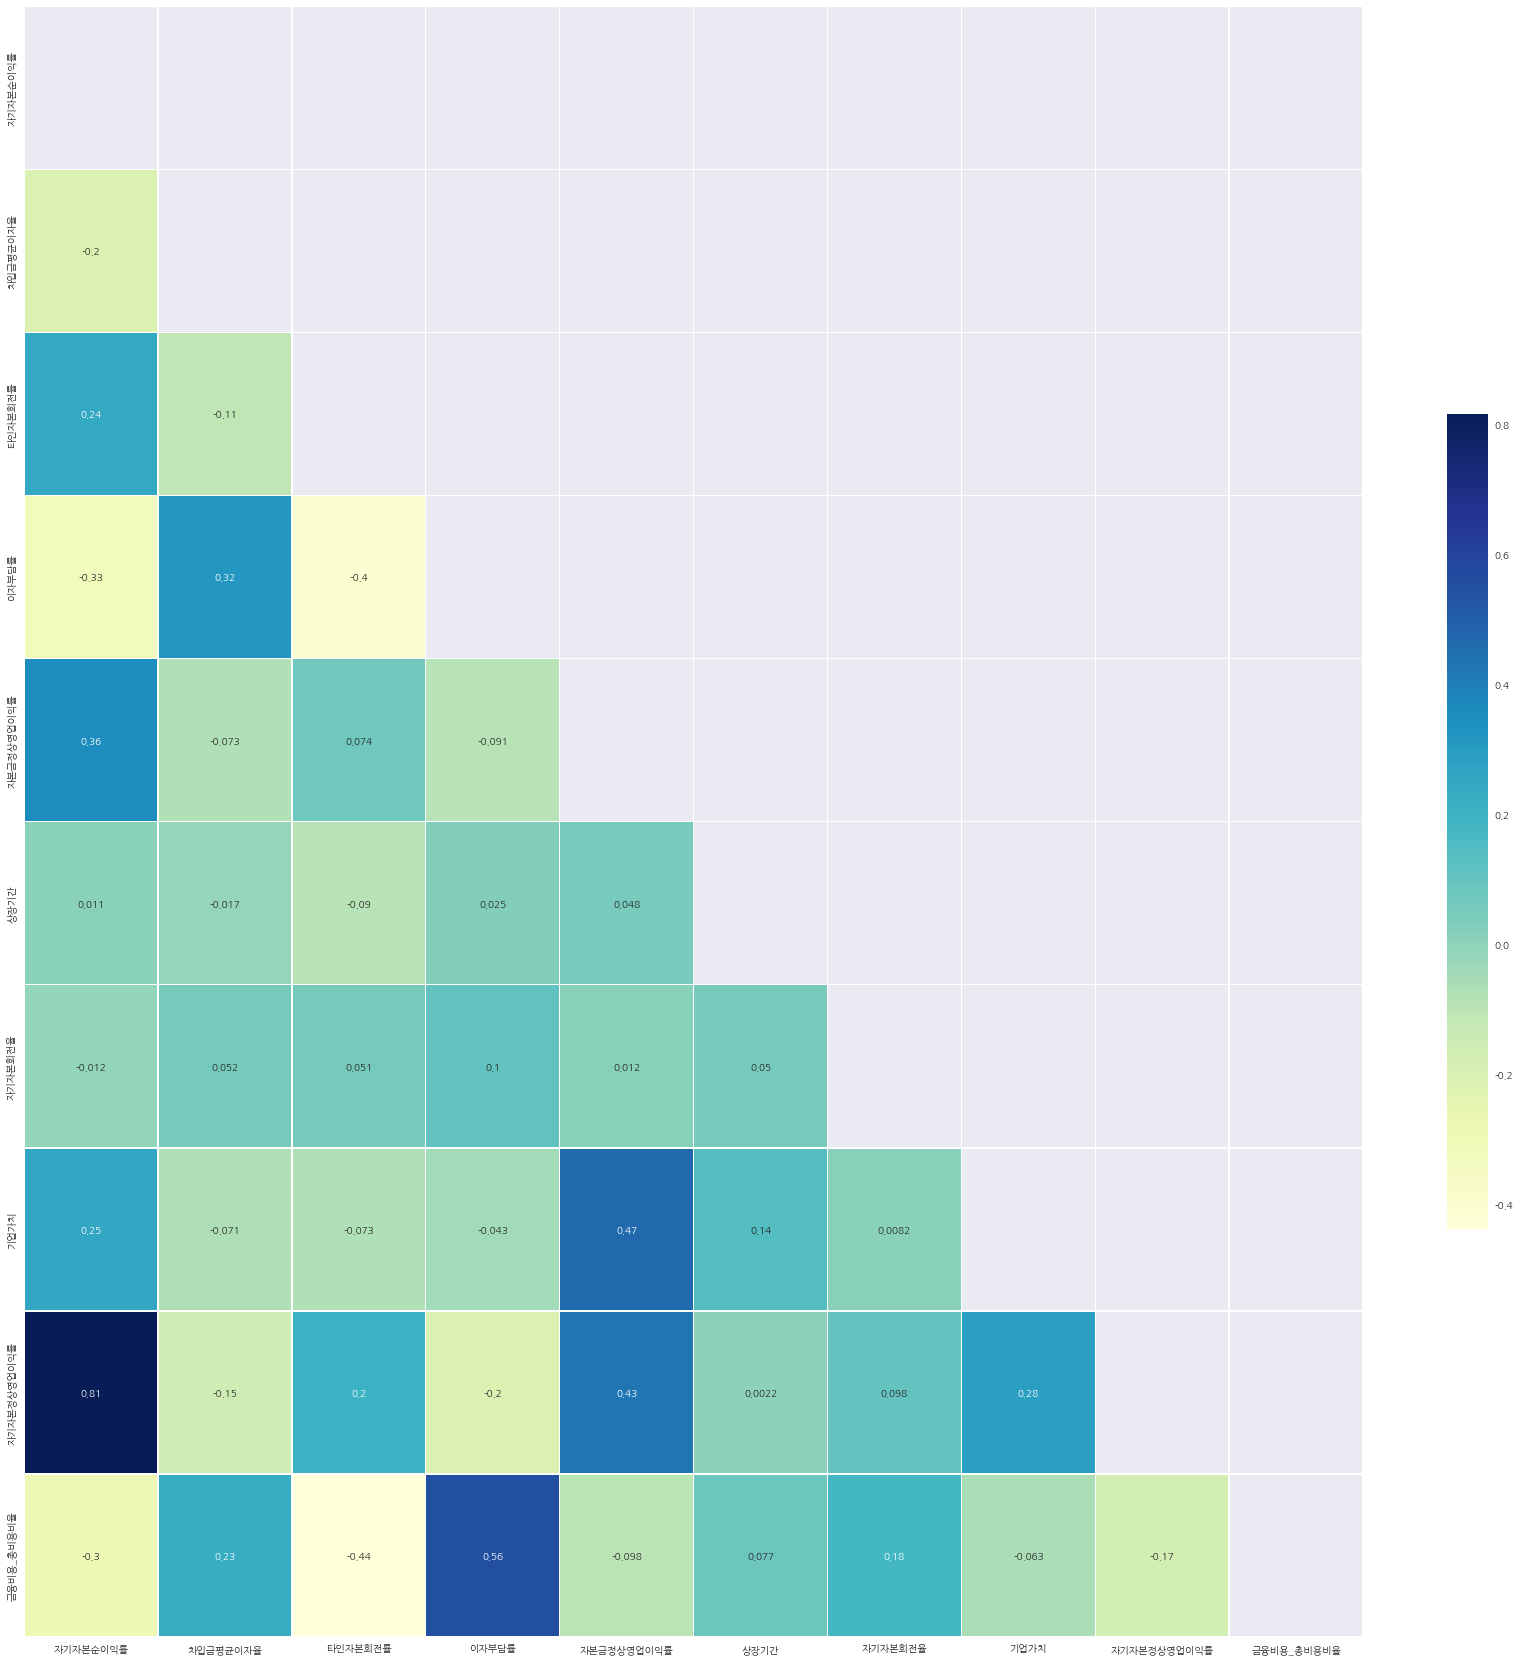

In [ ]:
# 상관행렬 시각화
mask_ut=np.triu(np.ones(df_inter_st.corr().shape)).astype(bool)  # 배열 행렬에 위쪽 삼각형 반환 -> True
plt.figure(figsize=(30,30))
sns.heatmap(df_inter_st.corr(method='pearson'), annot = True, cmap = 'YlGnBu', cbar_kws={"shrink": .5}, 
              annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
plt.show()

### 5_1. standard_scaling 변수 저장

In [ ]:
df_inter_st.to_csv('/content/drive/MyDrive/project2/datasets2/scaling_raw/st_scaled_selected.csv')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/project2/datasets2/scaling_raw/st_scaled_selected.csv', index_col=0)
df.columns

Index(['자기자본순이익률', '차입금평균이자율', '타인자본회전률', '이자부담률', '자본금정상영업이익률', '상장기간',
       '자기자본회전율', '기업가치', '자기자본정상영업이익률', '금융비용_총비용비율'],
      dtype='object')

In [ ]:
df_total = pd.read_csv('/content/drive/MyDrive/project2/datasets2/fake_for_data.csv', index_col=0)

In [ ]:
b = df_total[['회사명', '거래소코드', '회계년도', 'y', '자기자본순이익률', '차입금평균이자율', '타인자본회전률', '이자부담률', '자본금정상영업이익률', '상장기간',
       '자기자본회전율', '기업가치', '자기자본정상영업이익률', '금융비용_총비용비율']]
b.describe().T

count        mean         std         min         25%  \
거래소코드       9093.00000 57249.87243 57057.57754    20.00000 11330.00000   
회계년도        9093.00000  2015.12592     2.65755  2011.00000  2013.00000   
y           9093.00000     0.09029     0.28661     0.00000     0.00000   
자기자본순이익률    9093.00000     2.89425    26.88514 -1092.23000     1.04000   
차입금평균이자율    9093.00000     9.44438   187.13282     0.00000     2.18000   
타인자본회전률     9093.00000     3.15025     2.19857     0.01801     1.68560   
이자부담률       9093.00000     0.01269     0.01768     0.00000     0.00000   
자본금정상영업이익률  9093.00000     2.15871     8.33947   -16.49892     0.15410   
상장기간        9093.00000    15.58650    11.45318     0.00000     7.00000   
자기자본회전율     9093.00000     1.78512     1.59714     0.00000     0.85000   
기업가치        9093.00000    25.63793     1.58560    11.29962    24.71152   
자기자본정상영업이익률 9093.00000     0.03660     1.44808  -103.69511     0.02099   
금융비용_총비용비율  9093.00000     0.12063     2.48594  -127.03000    -0.52000   

                    50%         75%          max  
거래소코드       41440.00000 83310.00000 302430.00000  
회계년도         2015.00000  2018.00000   2019.00000  
y               0.00000     0.00000      1.00000  
자기자본순이익률        5.77000    11.06000    428.57000  
차입금평균이자율        3.38000     4.96000  15351.45000  
타인자본회전률         2.63316     4.02556     41.03318  
이자부담률           0.00850     0.01927      0.62269  
자본금정상영업이익률      0.84613     2.22364    380.95801  
상장기간           13.00000    21.00000     63.00000  
자기자본회전율         1.36000     2.18000     21.89000  
기업가치           25.43863    26.38293     33.56864  
자기자본정상영업이익률     0.07184     0.13245     18.01888  
금융비용_총비용비율      0.10000     0.78000     25.22000

In [ ]:
# 기업가치 다시 생성해서 넣기 전전
a = df_total[['회사명', '거래소코드', '회계년도', 'y', '현재가치', '타인자본회전률', '자기자본순이익률', '이자부담률', '자기자본회전율', '자본금정상영업이익률',
       '자기자본정상영업이익률', '자기자본증가율', '차입금평균이자율', '금융비용_총비용비율', '상장기간']]
a.describe().T

count          mean           std          min           25%  \
거래소코드        9093.0  57249.872429  57057.577541    20.000000  11330.000000   
회계년도         9093.0   2015.125921      2.657548  2011.000000   2013.000000   
y            9093.0      0.090289      0.286611     0.000000      0.000000   
현재가치         9093.0      6.993628     40.569281 -2619.211861     -0.276293   
타인자본회전률      9093.0      3.150245      2.198572     0.018006      1.685596   
자기자본순이익률     9093.0      2.894251     26.885144 -1092.230000      1.040000   
이자부담률        9093.0      0.012689      0.017678     0.000000      0.000000   
자기자본회전율      9093.0      1.785123      1.597144     0.000000      0.850000   
자본금정상영업이익률   9093.0      2.158712      8.339466   -16.498919      0.154104   
자기자본정상영업이익률  9093.0      0.036605      1.448077  -103.695113      0.020988   
자기자본증가율      9093.0      8.880265     76.953205  -542.173112      0.036222   
차입금평균이자율     9093.0      9.444380    187.132815     0.000000      2.180000   
금융비용_총비용비율   9093.0      0.120630      2.485935  -127.030000     -0.520000   
상장기간         9093.0     15.586495     11.453176     0.000000      7.000000   

                      50%           75%            max  
거래소코드        41440.000000  83310.000000  302430.000000  
회계년도          2015.000000   2018.000000    2019.000000  
y                0.000000      0.000000       1.000000  
현재가치             0.547421     23.826993    1231.124363  
타인자본회전률          2.633160      4.025555      41.033178  
자기자본순이익률         5.770000     11.060000     428.570000  
이자부담률            0.008496      0.019266       0.622695  
자기자본회전율          1.360000      2.180000      21.890000  
자본금정상영업이익률       0.846134      2.223645     380.958011  
자기자본정상영업이익률      0.071843      0.132450      18.018882  
자기자본증가율          5.159103     12.113582    5158.706468  
차입금평균이자율         3.380000      4.960000   15351.450000  
금융비용_총비용비율       0.100000      0.780000      25.220000  
상장기간            13.000000     21.000000      63.000000

# 2.MinMax Scaling

### 1.VIF / Heatmap 확인

#### 1_1. VIF

In [ ]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

In [ ]:
# x VIF
vif(mm_scaled).head(10)

VIF Factor    features
0  2343.32310     총자본순이익률
1  2318.68805      기업순이익률
2  1775.81081     총자본투자효율
3  1300.45560     자기자본증가율
4  1233.85539  매출원가_매출액비율
5  1202.95215  총자본정상영업이익률
6   982.06557   EBITDA_자산
7   976.62701  매출액정상영업이익률
8   917.76533     매출액순이익률
9   584.68862     자본금순이익률

#### 1_2. heatmap

In [ ]:
# heatmap 그리기 전 초기작업
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib
from matplotlib import rc

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
#rc('font', family='AppleGothic') # Mac Os
rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# 상관행렬 시각화
mask_ut=np.triu(np.ones(x.corr().shape)).astype(bool)  # 배열 행렬에 위쪽 삼각형 반환 -> True
plt.figure(figsize=(30,30))
sns.heatmap(mm_scaled.corr(method='pearson'), annot = True, cmap = 'YlGnBu', cbar_kws={"shrink": .5}, 
              annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## 3.회귀가정 검정

### 3_1. 정규성 검정 
**qq-plot, Distplot, Shapiro-wilk test, ks-test**
- 표본이 대표본(n>30)이면 중심극한정리에 따라 정규성을 띈다고 가정함 

#### Shapiro-wilk test
- 귀무가설 : 정규분포를 따른다. (정규성을 띈다.)
- 대립가설 : 정규분포를 따르지 않는다. (정규성을 띄지 않는다.)
-> p-value > 0.05 면 귀무가설 채택으로 정규성을 따름 

In [ ]:
# 샤피로 - 윌크
from scipy.stats import shapiro
def normal_test(x):
    list = []
    for var in x.columns :
        stat, p  = shapiro(x[var].values)
        list.append([var, "{}".format(stat),"{}".format(p)])

    data = pd.DataFrame(list, columns = ['x_feature','stat','p_value'])
    data = data.astype({'p_value':'float'})

    h0 = data[(data['p_value']) > 0.05] 
    h1 = data[(data['p_value']) <= 0.05]

    return data, h0, h1  

In [ ]:
data, h0, h1 = normal_test(mm_scaled)
h0

Empty DataFrame
Columns: [x_feature, stat, p_value]
Index: []

In [ ]:
h1

x_feature                  stat  p_value
0        차입금평균이자율    0.6639828085899353  0.00000
1      매출원가_매출액비율     0.830646812915802  0.00000
2       인건비_총비용비율    0.8842812180519104  0.00000
3         매출액순이익률   0.49164295196533203  0.00000
4         자본금순이익률    0.6756628751754761  0.00000
5         총자본순이익률    0.8336958885192871  0.00000
6        자기자본순이익률    0.6985602378845215  0.00000
7      매출액정상영업이익률      0.75595623254776  0.00000
8      금융비용_총비용비율    0.8449916839599609  0.00000
9             유보율    0.6097176671028137  0.00000
10        총자본투자효율    0.8224079608917236  0.00000
11          부가가치율    0.8274196982383728  0.00000
12        노동소득분배율    0.6535801887512207  0.00000
13        당좌자산회전률    0.8989272117614746  0.00000
14       순운전자본회전률   0.45667463541030884  0.00000
15        타인자본회전률    0.9003451466560364  0.00000
16          이자부담률    0.8257251977920532  0.00000
17         기업순이익률    0.7771078944206238  0.00000
18        금융비용부담률  0.033843815326690674  0.00000
19      정상영업이익증가율    0.4928298592567444  0.00000
20     총자본정상영업이익률    0.9290155172348022  0.00000
21  영업비용_대_영업수익비율     0.856956958770752  0.00000
22     자본금정상영업이익률    0.6281887292861938  0.00000
23    자기자본정상영업이익률      0.75943523645401  0.00000
24         순이익증가율    0.4751585125923157  0.00000
25        매출액총이익률    0.8306434154510498  0.00000
26           기업규모    0.9355266094207764  0.00000
27        현금흐름_자산    0.9669351577758789  0.00000
28      EBITDA_자산    0.9348639845848083  0.00000
29        단기상환부담률    0.5126152038574219  0.00000
30       매출액_이자비용    0.6274086236953735  0.00000
31           기업가치    0.9541010856628418  0.00000
32      EV_EBITDA   0.43925178050994873  0.00000
33        자기자본회전율     0.793616771697998  0.00000
34        매입채무회전율   0.36150914430618286  0.00000
35        재고자산회전율   0.23326843976974487  0.00000
36        매출채권회전율    0.6452296376228333  0.00000
37       비유동자산회전율     0.720533013343811  0.00000
38         매출액증가율    0.7896651029586792  0.00000
39        자기자본증가율    0.7190783023834229  0.00000
40         총자본증가율    0.7998605370521545  0.00000
41        유형자산증가율    0.4844920039176941  0.00000
42        유동자산증가율    0.8278443217277527  0.00000
43           상장기간     0.912097692489624  0.00000

#### ks test
표본 수가 2000개 이상, 0이 나오면 정규성을 띈다고 가정

In [ ]:
from scipy.stats import stats
def ks_test(x):
    list = []
    for var in x.columns :
        stat, p  = stats.kstest(x[var].values, 'norm')
        list.append([var, "{}".format(stat),"{}".format(p)])

    data = pd.DataFrame(list, columns = ['x_feature','stat','p_value'])
    data = data.astype({'p_value':'float'})

    h0 = data[data['p_value'] > 0.05] 
    h1 = data[data['p_value'] <= 0.05]

    return h0, h1

In [ ]:
h0, h1 = ks_test(mm_scaled)
h0

Empty DataFrame
Columns: [x_feature, stat, p_value]
Index: []

In [ ]:
h1

x_feature                stat  p_value
0        차입금평균이자율                 0.5  0.00000
1      매출원가_매출액비율  0.5639708585969756  0.00000
2       인건비_총비용비율  0.5643312197142162  0.00000
3         매출액순이익률  0.7137302545059176  0.00000
4         자본금순이익률  0.6957299001311475  0.00000
5         총자본순이익률  0.6294012582812059  0.00000
6        자기자본순이익률  0.6646326636163599  0.00000
7      매출액정상영업이익률  0.6051912444098719  0.00000
8      금융비용_총비용비율  0.5022202411419211  0.00000
9             유보율  0.5006077462017062  0.00000
10        총자본투자효율  0.7490395607160385  0.00000
11          부가가치율    0.67641167302483  0.00000
12        노동소득분배율                 0.5  0.00000
13        당좌자산회전률  0.5020986324388101  0.00000
14       순운전자본회전률  0.6483560217451138  0.00000
15        타인자본회전률  0.5036382351873672  0.00000
16          이자부담률                 0.5  0.00000
17         기업순이익률  0.6531153644600124  0.00000
18        금융비용부담률                 0.5  0.00000
19      정상영업이익증가율  0.6262451632334283  0.00000
20     총자본정상영업이익률  0.5316745044930701  0.00000
21  영업비용_대_영업수익비율    0.59506597104672  0.00000
22     자본금정상영업이익률   0.620937255250405  0.00000
23    자기자본정상영업이익률  0.6762419940483262  0.00000
24         순이익증가율  0.6397418987928195  0.00000
25        매출액총이익률  0.5050460568531098  0.00000
26           기업규모  0.5421997145687506  0.00000
27        현금흐름_자산  0.5794527449924618  0.00000
28      EBITDA_자산  0.5307732821774327  0.00000
29        단기상환부담률  0.6141113273399298  0.00000
30       매출액_이자비용  0.6209246644657531  0.00000
31           기업가치  0.5809138079807609  0.00000
32      EV_EBITDA  0.5213186510035391  0.00000
33        자기자본회전율   0.500305632425517  0.00000
34        매입채무회전율                 0.5  0.00000
35        재고자산회전율                 0.5  0.00000
36        매출채권회전율  0.5024847081579303  0.00000
37       비유동자산회전율  0.5002343504898744  0.00000
38         매출액증가율  0.5635593313672527  0.00000
39        자기자본증가율  0.7541718847677373  0.00000
40         총자본증가율  0.6104736937531947  0.00000
41        유형자산증가율  0.5219800852756975  0.00000
42        유동자산증가율  0.5680247749589054  0.00000
43           상장기간  0.5058922524244788  0.00000

#### qq-plot & distplot

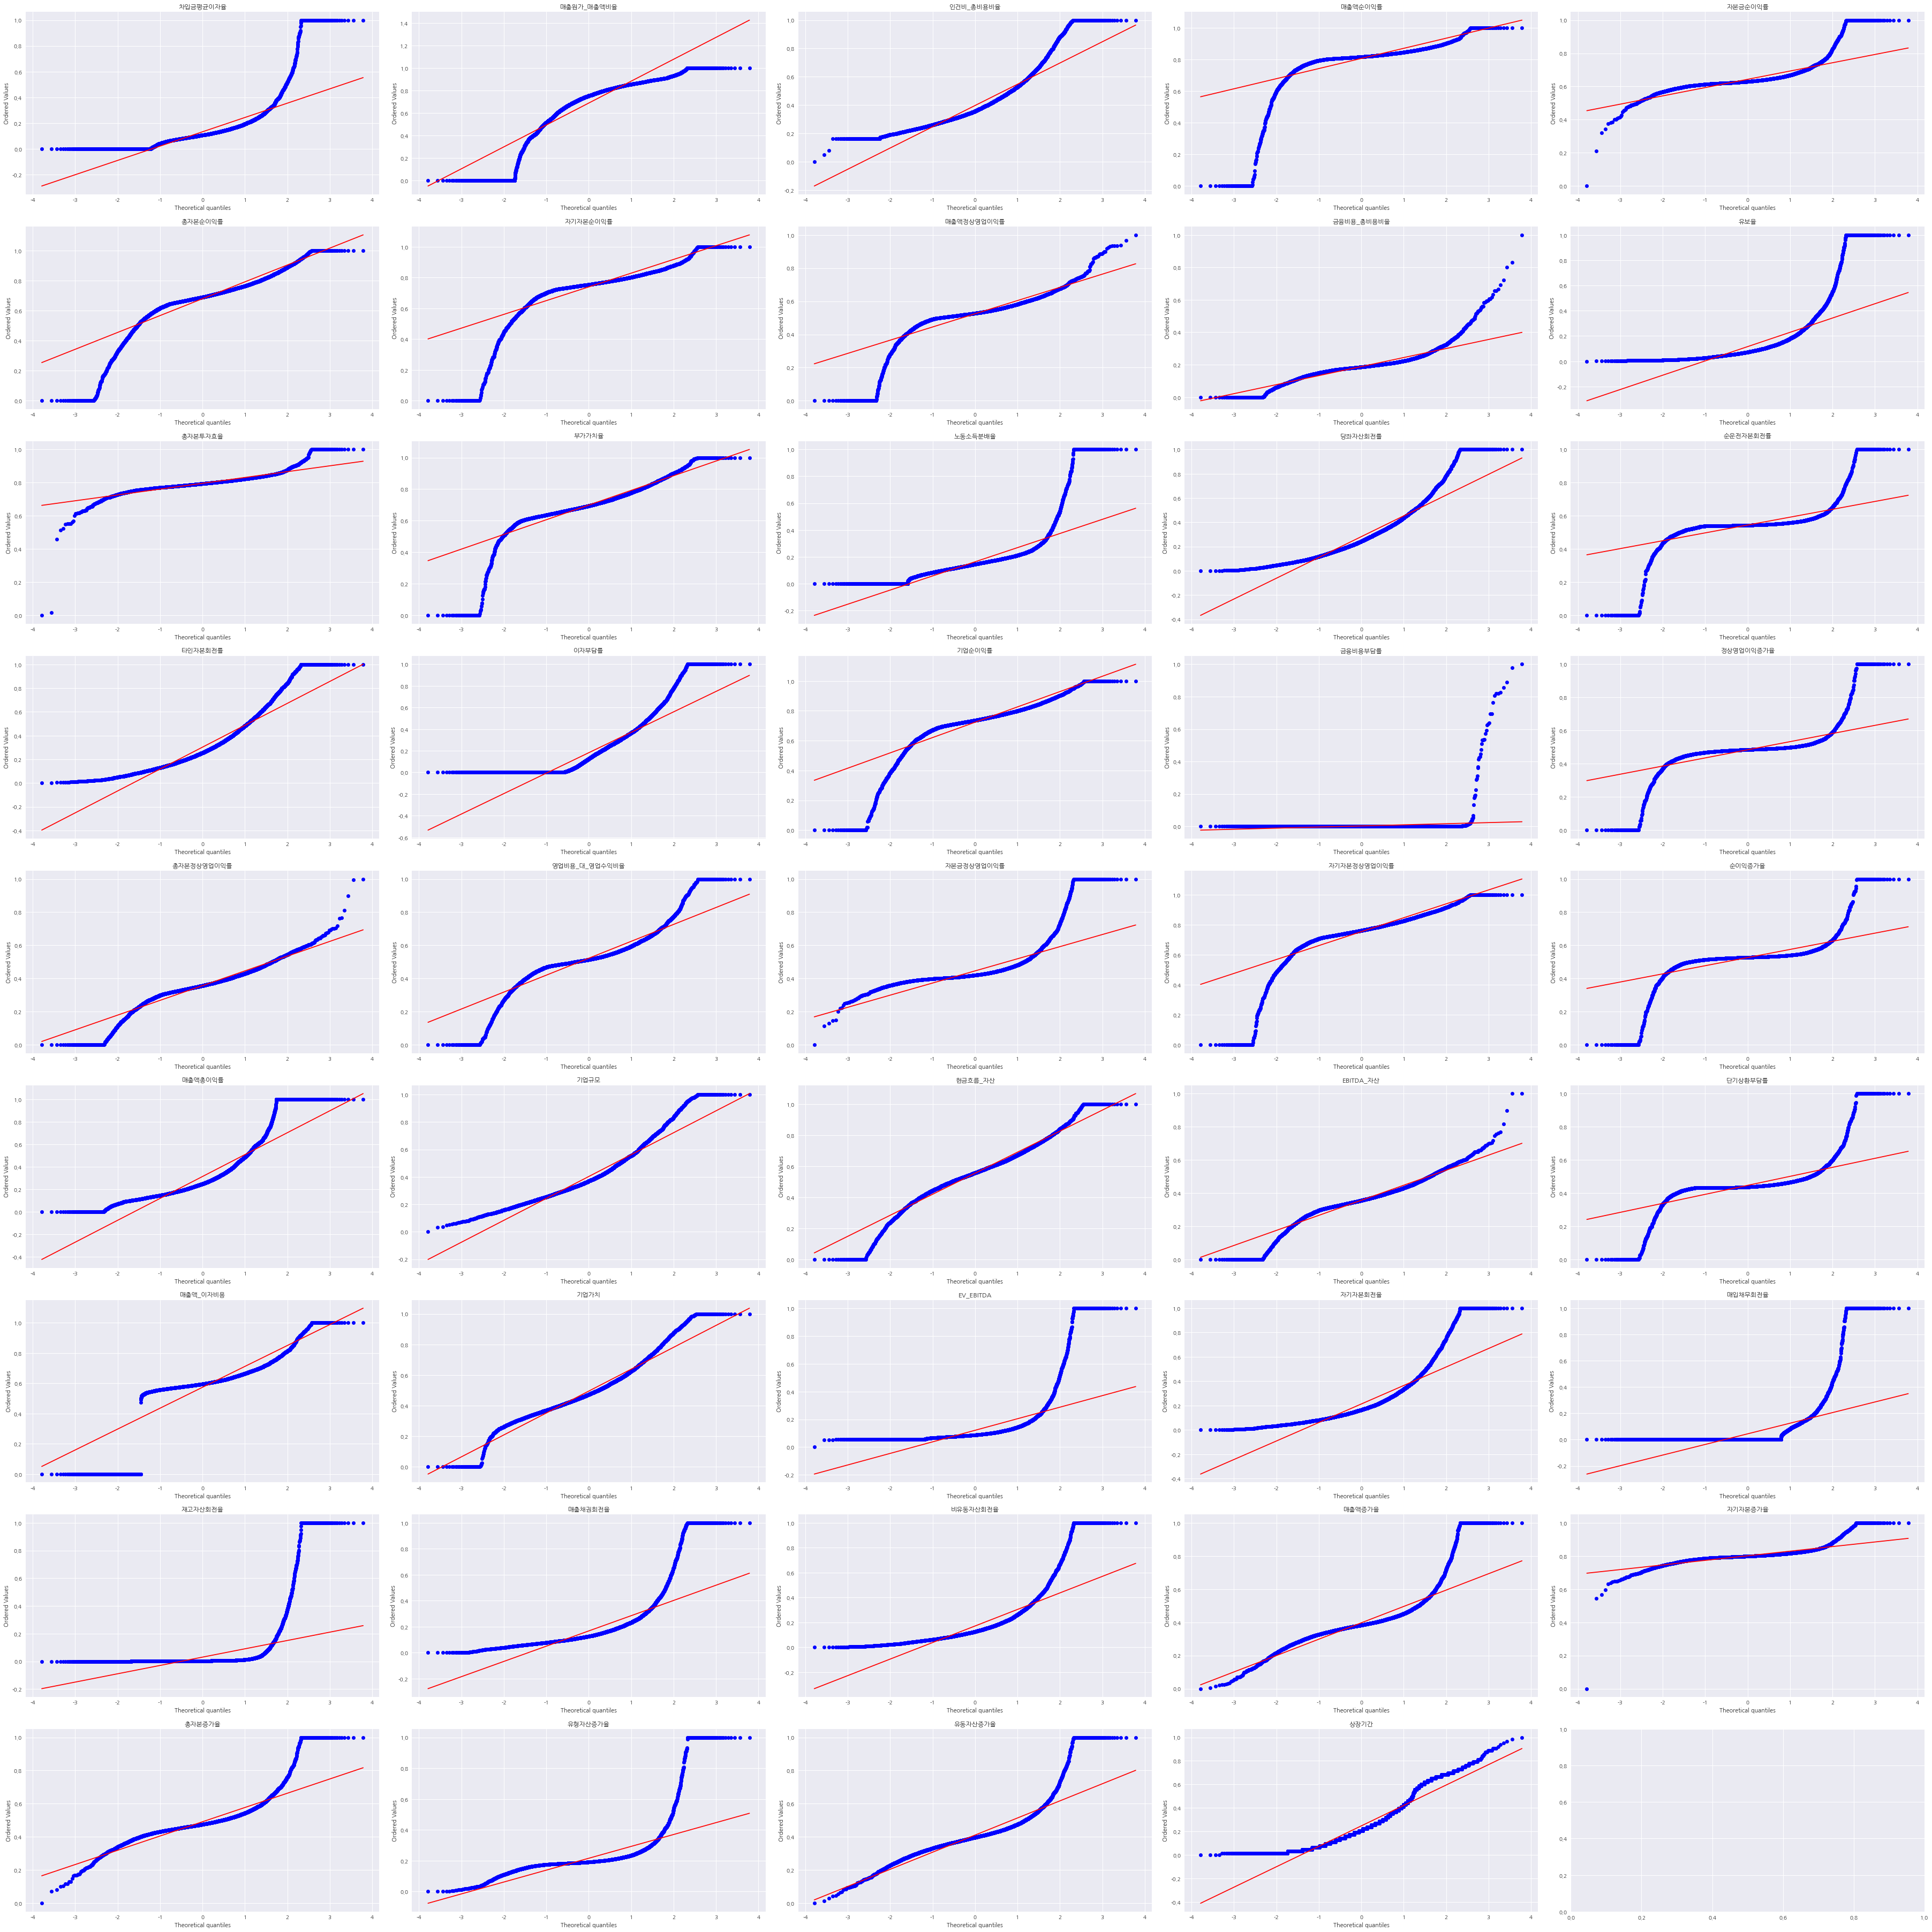

In [ ]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "NanumGothic"

ncols = 5
nrows = 9

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
fig.set_size_inches((50, 50))

for ax, i in zip(axs.ravel(), mm_scaled):
       stats.probplot(mm_scaled[i], dist=stats.norm, plot=ax)
       ax.set_title(str(i))

plt.show()

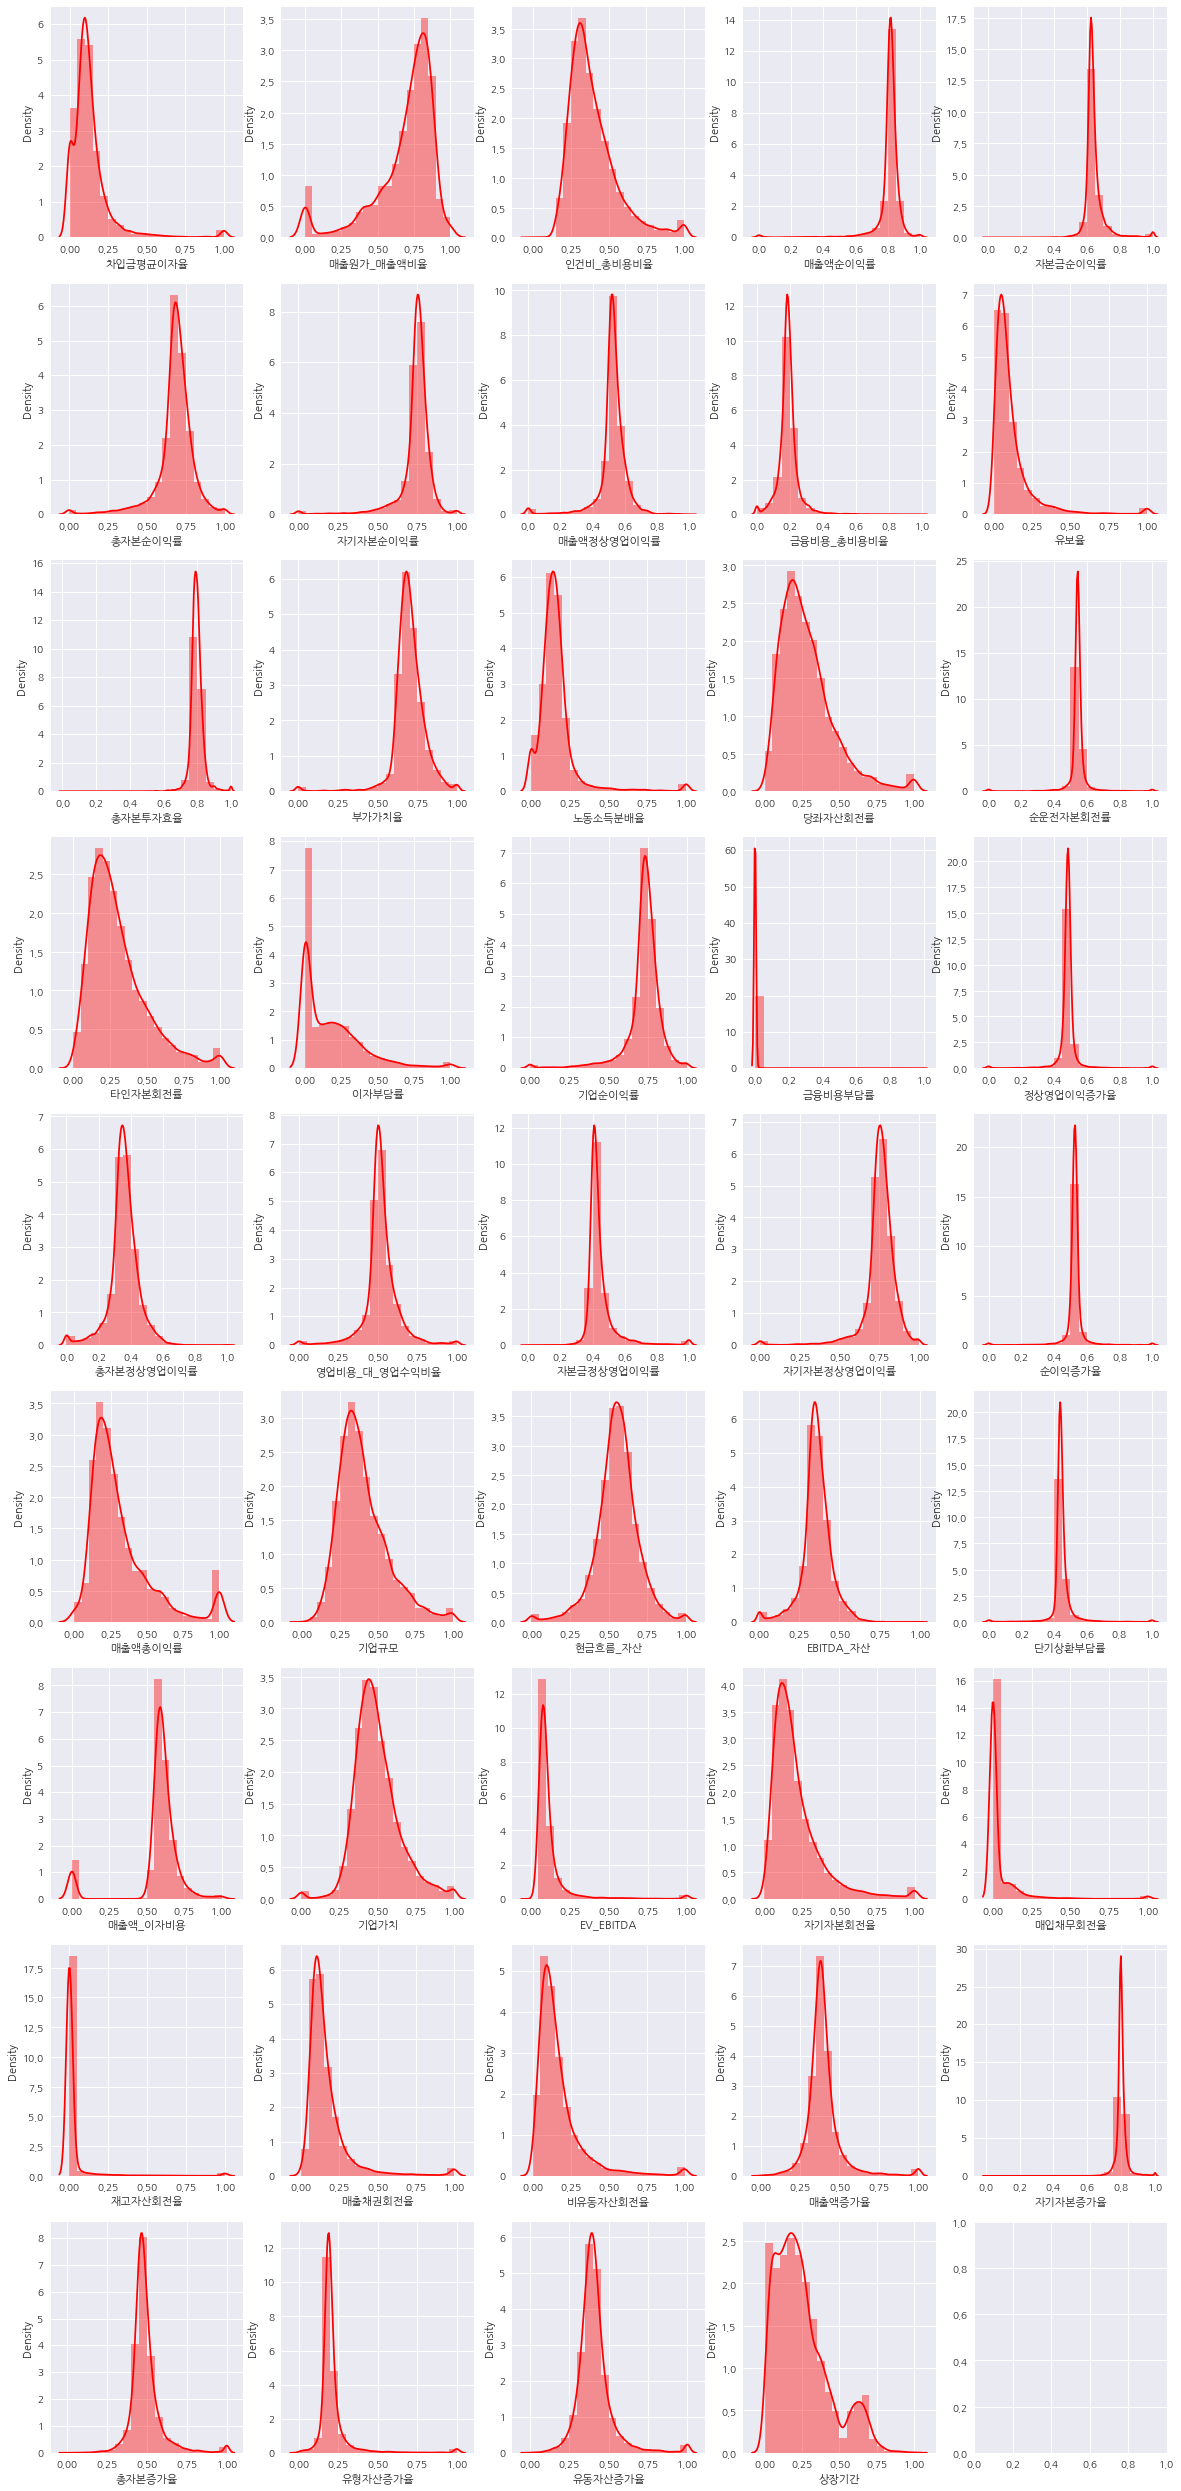

In [ ]:
import seaborn as sns
# distplot
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False
col_n = 5
row_n = 9

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i, col in enumerate(mm_scaled.columns[:]):
  sns.distplot(mm_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')
  
# plt.tight_layout()

### 3_2. 등분산성 검정 
**y+mm_exvif -> mm_bart**
- H0 : 모집단의 표준편차가 같다(등분산)
- H1 : 모집단의 표준편차가 다르다(이분산)
-> H가 1인 경우 이분산성

In [ ]:
y = df_total[['y']]
mm_bart = pd.concat([mm_scaled, y], axis=1)
mm_bart

차입금평균이자율  매출원가_매출액비율  인건비_총비용비율  매출액순이익률  자본금순이익률  총자본순이익률  자기자본순이익률  \
0      0.17074     0.67457    0.47046  0.64983  0.61310  0.43183   0.56819   
1      0.24154     0.78490    0.47000  0.73689  0.60899  0.54184   0.56305   
2      0.14411     0.72588    0.31535  0.73543  0.61593  0.56844   0.68979   
3      0.20677     0.86746    0.26048  0.79082  0.61005  0.62592   0.69247   
4      0.14286     0.82208    0.28776  0.84573  0.64858  0.71525   0.81761   
...        ...         ...        ...      ...      ...      ...       ...   
9088   0.07174     0.89118    0.19822  0.80904  0.64532  0.68099   0.73951   
9089   0.06642     0.89363    0.19445  0.80837  0.64389  0.67871   0.73837   
9090   0.09023     0.89429    0.19475  0.80874  0.64776  0.68489   0.74071   
9091   0.00000     0.89297    0.19641  0.82399  0.72284  0.78402   0.78564   
9092   0.20802     0.91744    0.22656  0.79232  0.60685  0.59342   0.62916   

      매출액정상영업이익률  금융비용_총비용비율     유보율  ...  재고자산회전율  매출채권회전율  비유동자산회전율  매출액증가율  \
0        0.32251     0.24069 0.00789  ...  0.00225  0.03842   0.10325 0.33650   
1        0.44313     0.43473 0.01292  ...  0.00277  0.12710   0.03819 0.32719   
2        0.47132     0.23874 0.01221  ...  0.00151  0.24611   0.03748 0.34723   
3        0.52020     0.35957 0.04781  ...  0.00349  0.22783   0.04173 0.33543   
4        0.52762     0.34500 0.06351  ...  0.00148  0.12420   0.05021 0.38295   
...          ...         ...     ...  ...      ...      ...       ...     ...   
9088     0.49977     0.18367 0.27683  ...  0.02713  0.61724   0.15700 0.34084   
9089     0.49850     0.18529 0.27910  ...  0.02319  0.56303   0.16973 0.39799   
9090     0.49970     0.18270 0.28180  ...  0.03082  0.64403   0.18388 0.39337   
9091     0.49750     0.17914 0.30758  ...  0.02691  0.65441   0.17115 0.33310   
9092     0.48995     0.23907 0.02158  ...  0.02003  0.56968   0.12023 0.41533   

      자기자본증가율  총자본증가율  유형자산증가율  유동자산증가율    상장기간       y  
0     0.90057 0.96757  0.17949  1.00000 0.17460 1.00000  
1     0.75794 0.39012  0.17245  0.34046 0.57143 1.00000  
2     0.78677 0.48150  0.24485  0.33422 0.25397 1.00000  
3     0.78427 0.42174  0.18436  0.32825 0.06349 1.00000  
4     0.81373 0.43590  0.18349  0.32673 0.26984 1.00000  
...       ...     ...      ...      ...     ...     ...  
9088  0.79294 0.45894  0.17671  0.40738 0.34921 0.00000  
9089  0.79212 0.45700  0.18616  0.40732 0.36508 0.00000  
9090  0.79235 0.42457  0.18655  0.29783 0.38095 0.00000  
9091  0.80449 0.50543  0.17411  0.68898 0.39683 0.00000  
9092  0.76583 0.43760  0.18659  0.31934 0.55556 1.00000  

[9093 rows x 45 columns]

In [ ]:
from scipy.stats import bartlett
def bartlettTest(col, y0, y1, p_value = 0.05, H=1):

  list= []
  for i in col:
      t, p_val = bartlett(y0[i], y1[i]) 
      list.append([i, "{}".format(p_val)])

  data = pd.DataFrame(list, columns = ['x_feature', 'p_value'])

  data = data.astype({'p_value':'float'})
  if H == 1:
    data_h1 = data[data['p_value']< p_value]
    return data_h1
  else:
    data_h0 = data[data['p_value']>= p_value]
    return data_h0

In [ ]:
# 등분산
mm_bart_h0= bartlettTest(mm_bart.columns, mm_bart[mm_bart['y']==0], mm_bart[mm_bart['y']==1], H = 0)
mm_bart_h0

x_feature  p_value
10   총자본투자효율  0.35372
13   당좌자산회전률  0.54513
26      기업규모  0.75918

In [ ]:
# 이분산
mm_bart_h1= bartlettTest(mm_bart.columns, mm_bart[mm_bart['y']==0], mm_bart[mm_bart['y']==1], H = 1)
mm_bart_h1

x_feature  p_value
0        차입금평균이자율  0.00000
1      매출원가_매출액비율  0.00000
2       인건비_총비용비율  0.00000
3         매출액순이익률  0.00000
4         자본금순이익률  0.00000
5         총자본순이익률  0.00000
6        자기자본순이익률  0.00000
7      매출액정상영업이익률  0.00000
8      금융비용_총비용비율  0.00000
9             유보율  0.00000
11          부가가치율  0.00000
12        노동소득분배율  0.00000
14       순운전자본회전률  0.00000
15        타인자본회전률  0.00000
16          이자부담률  0.00000
17         기업순이익률  0.00000
18        금융비용부담률  0.00000
19      정상영업이익증가율  0.00000
20     총자본정상영업이익률  0.00002
21  영업비용_대_영업수익비율  0.00000
22     자본금정상영업이익률  0.00000
23    자기자본정상영업이익률  0.00000
24         순이익증가율  0.00000
25        매출액총이익률  0.00000
27        현금흐름_자산  0.00000
28      EBITDA_자산  0.00030
29        단기상환부담률  0.00000
30       매출액_이자비용  0.00000
31           기업가치  0.00003
32      EV_EBITDA  0.00000
33        자기자본회전율  0.00000
34        매입채무회전율  0.00000
35        재고자산회전율  0.00000
36        매출채권회전율  0.03323
37       비유동자산회전율  0.00000
38         매출액증가율  0.00000
39        자기자본증가율  0.00000
40         총자본증가율  0.00000
41        유형자산증가율  0.00000
42        유동자산증가율  0.00000
43           상장기간  0.00015

## 4.feature_selection

### 4_1. t-test 
- mm_ttest

In [ ]:
# 1. 각각의 데이터셋에 대해 t_test 진행 
import scipy.stats as stats
def t_test(col, df_h0, df_h1, y0, y1, p_value = 0.05):
  list= []
  for i in col:
    if (df_h0['x_feature']==i).any():
        t_stat, p_val = stats.ttest_ind(y0[i], y1[i], equal_var=True, alternative='two-sided')
        list.append([i, p_val])
    elif (df_h1['x_feature']==i).any():
        t_stat, p_val = stats.ttest_ind(y0[i], y1[i], equal_var=False, alternative='two-sided')
        list.append([i, p_val])

  df = pd.DataFrame(list, columns = ['x_feature', 'p_value'])
  a = df[(df['p_value'] < p_value)][['x_feature', 'p_value']].sort_values('p_value')
  return a

In [ ]:
# t_test 결과 p_value < 0.05보다 작은 유의한 변수 가져오기
mm_ttest_sd = t_test(mm_bart.columns, mm_bart_h0, mm_bart_h1, mm_bart[mm_bart['y']==0], mm_bart[mm_bart['y']==1], p_value=0.05)
mm_ttest_sd

x_feature  p_value
15        타인자본회전률  0.00000
22     자본금정상영업이익률  0.00000
28      EBITDA_자산  0.00000
20     총자본정상영업이익률  0.00000
4         자본금순이익률  0.00000
21  영업비용_대_영업수익비율  0.00000
10        총자본투자효율  0.00000
9             유보율  0.00000
5         총자본순이익률  0.00000
8      금융비용_총비용비율  0.00000
6        자기자본순이익률  0.00000
17         기업순이익률  0.00000
27        현금흐름_자산  0.00000
16          이자부담률  0.00000
23    자기자본정상영업이익률  0.00000
7      매출액정상영업이익률  0.00000
3         매출액순이익률  0.00000
31           기업가치  0.00000
11          부가가치율  0.00000
1      매출원가_매출액비율  0.00000
25        매출액총이익률  0.00000
0        차입금평균이자율  0.00000
39        자기자본증가율  0.00000
37       비유동자산회전율  0.00000
12        노동소득분배율  0.00000
30       매출액_이자비용  0.00000
33        자기자본회전율  0.00000
38         매출액증가율  0.00000
43           상장기간  0.00000
26           기업규모  0.00000
2       인건비_총비용비율  0.00000
35        재고자산회전율  0.00000
24         순이익증가율  0.00000
19      정상영업이익증가율  0.00000
34        매입채무회전율  0.00000
36        매출채권회전율  0.00000
18        금융비용부담률  0.00001
14       순운전자본회전률  0.00006
32      EV_EBITDA  0.00529

In [ ]:
len(mm_ttest_sd)

39

In [ ]:
# t_test 유의미한 변수 datasets 생성
t_list = mm_ttest_sd['x_feature'].unique()
mm_ttest = pd.DataFrame()

for i in t_list:
  df = mm_bart[[i]]
  mm_ttest = pd.concat([mm_ttest, df], axis=1)

mm_ttest

타인자본회전률  자본금정상영업이익률  EBITDA_자산  총자본정상영업이익률  자본금순이익률  영업비용_대_영업수익비율  \
0     0.08945     0.39676    0.20573     0.21207  0.61310        0.30517   
1     0.05575     0.39498    0.25348     0.25914  0.60899        0.41289   
2     0.08640     0.39915    0.29092     0.29067  0.61593        0.44453   
3     0.05080     0.41069    0.31740     0.32332  0.61005        0.50416   
4     0.06625     0.41640    0.32980     0.33314  0.64858        0.51423   
...       ...         ...        ...         ...      ...            ...   
9088  1.00000     0.41542    0.31794     0.31936  0.64532        0.47827   
9089  1.00000     0.41199    0.31455     0.31589  0.64389        0.47673   
9090  1.00000     0.41750    0.32079     0.32229  0.64776        0.47816   
9091  1.00000     0.40794    0.31166     0.31162  0.72284        0.47549   
9092  0.15937     0.39610    0.28474     0.29124  0.60685        0.46631   

      총자본투자효율     유보율  총자본순이익률  금융비용_총비용비율  ...    기업규모  인건비_총비용비율  재고자산회전율  \
0     0.75004 0.00789  0.43183     0.24069  ... 0.24281    0.47046  0.00225   
1     0.79305 0.01292  0.54184     0.43473  ... 0.58082    0.47000  0.00277   
2     0.75142 0.01221  0.56844     0.23874  ... 0.31802    0.31535  0.00151   
3     0.76596 0.04781  0.62592     0.35957  ... 0.77730    0.26048  0.00349   
4     0.77334 0.06351  0.71525     0.34500  ... 0.33389    0.28776  0.00148   
...       ...     ...      ...         ...  ...     ...        ...      ...   
9088  0.77038 0.27683  0.68099     0.18367  ... 0.27904    0.19822  0.02713   
9089  0.76965 0.27910  0.67871     0.18529  ... 0.28012    0.19445  0.02319   
9090  0.77271 0.28180  0.68489     0.18270  ... 0.27338    0.19475  0.03082   
9091  0.79269 0.30758  0.78402     0.17914  ... 0.28521    0.19641  0.02691   
9092  0.76571 0.02158  0.59342     0.23907  ... 0.49038    0.22656  0.02003   

      순이익증가율  정상영업이익증가율  매입채무회전율  매출채권회전율  금융비용부담률  순운전자본회전률  EV_EBITDA  
0    0.57591    0.32997  0.00000  0.03842  0.00000   0.53838    0.05512  
1    0.52231    0.46829  0.00000  0.12710  0.00000   0.52884    0.09225  
2    0.46692    0.45478  0.00000  0.24611  0.00000   0.53974    0.20507  
3    0.53369    0.48460  0.00000  0.22783  0.00000   0.51933    0.14454  
4    0.85109    0.47736  0.00088  0.12420  0.00000   0.53196    0.08254  
...      ...        ...      ...      ...      ...       ...        ...  
9088 0.52548    0.50908  1.00000  0.61724  0.00000   0.56832    0.18422  
9089 0.52830    0.48207  1.00000  0.56303  0.00000   0.57863    0.17999  
9090 0.53104    0.49602  1.00000  0.64403  0.00000   0.58862    0.13349  
9091 0.56333    0.47542  1.00000  0.65441  0.00000   0.56432    0.29592  
9092 0.49908    0.46297  0.00000  0.56968  0.00000   0.50322    0.18687  

[9093 rows x 39 columns]

### 4_2. Lasso, Ridge, elasticnet

#### Lasso 
- mm_lasso

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    lasso = Lasso(al).fit(mm_scaled, df_total['y'])
    print("alpha : ",  al, "/ selected features : ", np.sum(lasso.coef_ != 0))

alpha :  0.0001 / selected features :  35
alpha :  0.001 / selected features :  14
alpha :  0.005 / selected features :  4
alpha :  0.01 / selected features :  4
alpha :  0.05 / selected features :  0
alpha :  0.1 / selected features :  0
alpha :  0.5 / selected features :  0
alpha :  1 / selected features :  0
alpha :  10 / selected features :  0
alpha :  100 / selected features :  0


In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    lasso = SelectFromModel(LogisticRegression(C=al, penalty="l1", solver='liblinear'))
    lasso.fit(mm_scaled, df_total['y'])

    lasso_support = lasso.get_support()
    lr_feature_sd = x.loc[:,lasso_support].columns.tolist()
    print('alpha : ', al, " / ", str(len(lr_feature_sd)), 'selected features')

alpha :  0.0001  /  0 selected features
alpha :  0.001  /  0 selected features
alpha :  0.005  /  2 selected features
alpha :  0.01  /  4 selected features
alpha :  0.05  /  11 selected features
alpha :  0.1  /  17 selected features
alpha :  0.5  /  29 selected features
alpha :  1  /  36 selected features
alpha :  10  /  44 selected features
alpha :  100  /  44 selected features


In [ ]:
# lasso L1규제 (0으로)
lasso = SelectFromModel(LogisticRegression(C=0.1, penalty='l1',solver='liblinear'))
lasso.fit(mm_scaled, df_total['y'])
lasso_support = lasso.get_support()
lr_feature_sd = mm_scaled.loc[:,lasso_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

17 selected features


In [ ]:
# lasso 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
mm_lasso = df_total[lr_feature_sd]
mm_lasso

차입금평균이자율  매출원가_매출액비율  자기자본순이익률  금융비용_총비용비율        유보율    노동소득분배율  \
0      5.45000    71.66000 -26.84000     1.78000   -4.31000 1749.87000   
1      7.71000    83.38000 -27.74000     7.77000   80.99000   62.53000   
2      4.60000    77.11000  -5.54000     1.72000   68.98000  390.13000   
3      6.60000    92.15000  -5.07000     5.45000  672.79000   41.15000   
4      4.56000    87.33000  16.85000     5.00000  939.04000   40.06000   
...        ...         ...       ...         ...        ...        ...   
9088   2.29000    94.67000   3.17000     0.02000 4557.31000   48.08000   
9089   2.12000    94.93000   2.97000     0.07000 4595.77000   47.63000   
9090   2.88000    95.00000   3.38000    -0.01000 4641.63000   47.47000   
9091   0.00000    94.86000  11.25000    -0.12000 5078.89000   22.19000   
9092   6.64000    97.46000 -16.16000     1.73000  227.89000   83.10000   

      당좌자산회전률  타인자본회전률   이자부담률  총자본정상영업이익률  자기자본정상영업이익률  현금흐름_자산     기업가치  \
0     0.57286  0.93453 0.02127    -0.07364     -0.13312 -0.02754 25.19849   
1     2.54490  0.58928 0.06459    -0.03599     -0.14007  0.05066 26.46368   
2     0.86004  0.90328 0.03559    -0.01077     -0.01712 -0.01199 24.74156   
3     1.28620  0.53848 0.03823     0.01534      0.05784 -0.05710 27.52093   
4     2.06868  0.69684 0.04115     0.02321      0.06559  0.04714 23.76445   
...       ...      ...     ...         ...          ...      ...      ...   
9088 11.78916 14.53913 0.00000     0.01218      0.01393  0.01410 24.66242   
9089 12.24645 15.46098 0.00000     0.00940      0.01077  0.01950 24.45197   
9090 13.76327 22.27846 0.00000     0.01453      0.01551  0.06706 24.42642   
9091  9.80596 26.37861 0.00000     0.00599      0.00650  0.00874 25.11028   
9092  5.31491  1.65098 0.03977    -0.01031     -0.04834 -0.01089 24.66582   

      EV_EBITDA  자기자본회전율    총자본증가율  상장기간       y  
0       0.00000  0.66000 109.15000    11 1.00000  
1      11.93000  1.56000 -13.19000    36 1.00000  
2      48.18000  0.47000   6.17000    16 1.00000  
3      28.73000  1.51000  -6.49000     4 1.00000  
4       8.81000  1.45000  -3.49000    17 1.00000  
...         ...      ...       ...   ...     ...  
9088   41.48000  2.09000   1.39000    22 0.00000  
9089   40.12000  2.24000   0.98000    23 0.00000  
9090   25.18000  2.37000  -5.89000    24 0.00000  
9091   77.37000  2.04000  11.24000    25 0.00000  
9092   42.33000  5.47000  -3.13000    35 1.00000  

[9093 rows x 18 columns]

#### Ridge 
- mm_ridge

In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    ridge = Ridge(alpha=al)
    ridge.fit(mm_scaled, df_total['y'])
    print("alpha : ",  al, "/ selected features : ", np.sum(ridge.coef_ != 0))

alpha :  0.0001 / selected features :  44
alpha :  0.001 / selected features :  44
alpha :  0.005 / selected features :  44
alpha :  0.01 / selected features :  44
alpha :  0.05 / selected features :  44
alpha :  0.1 / selected features :  44
alpha :  0.5 / selected features :  44
alpha :  1 / selected features :  44
alpha :  10 / selected features :  44
alpha :  100 / selected features :  44


In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    ridge = SelectFromModel(LogisticRegression(C=al, penalty="l2", solver='liblinear'))
    ridge.fit(mm_scaled, df_total['y'])

    ridge_support = ridge.get_support()
    lr_feature_sd = x.loc[:,ridge_support].columns.tolist()
    print('alpha : ', al, " / ", str(len(lr_feature_sd)), 'selected features')

alpha :  0.0001  /  21 selected features
alpha :  0.001  /  19 selected features
alpha :  0.005  /  19 selected features
alpha :  0.01  /  18 selected features
alpha :  0.05  /  18 selected features
alpha :  0.1  /  19 selected features
alpha :  0.5  /  19 selected features
alpha :  1  /  17 selected features
alpha :  10  /  16 selected features
alpha :  100  /  12 selected features


In [ ]:
# ridge L2규제 (0으로 수렴)
ridge = SelectFromModel(LogisticRegression(C=0.05, penalty='l2',solver='liblinear'))
ridge.fit(mm_scaled, df_total['y'])
ridge_support = ridge.get_support()
lr_feature_sd = mm_scaled.loc[:,ridge_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

18 selected features


In [ ]:
# ridge 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
mm_ridge = df_total[lr_feature_sd]
mm_ridge

매출원가_매출액비율   총자본순이익률  자기자본순이익률  금융비용_총비용비율        유보율    노동소득분배율  \
0       71.66000 -15.78000 -26.84000     1.78000   -4.31000 1749.87000   
1       83.38000  -7.59000 -27.74000     7.77000   80.99000   62.53000   
2       77.11000  -5.61000  -5.54000     1.72000   68.98000  390.13000   
3       92.15000  -1.33000  -5.07000     5.45000  672.79000   41.15000   
4       87.33000   5.32000  16.85000     5.00000  939.04000   40.06000   
...          ...       ...       ...         ...        ...        ...   
9088    94.67000   2.77000   3.17000     0.02000 4557.31000   48.08000   
9089    94.93000   2.60000   2.97000     0.07000 4595.77000   47.63000   
9090    95.00000   3.06000   3.38000    -0.01000 4641.63000   47.47000   
9091    94.86000  10.44000  11.25000    -0.12000 5078.89000   22.19000   
9092    97.46000  -3.75000 -16.16000     1.73000  227.89000   83.10000   

      타인자본회전률   이자부담률  총자본정상영업이익률  영업비용_대_영업수익비율  자기자본정상영업이익률  현금흐름_자산  \
0     0.93453 0.02127    -0.07364       -0.20554     -0.13312 -0.02754   
1     0.58928 0.06459    -0.03599       -0.07343     -0.14007  0.05066   
2     0.90328 0.03559    -0.01077       -0.03463     -0.01712 -0.01199   
3     0.53848 0.03823     0.01534        0.03850      0.05784 -0.05710   
4     0.69684 0.04115     0.02321        0.05085      0.06559  0.04714   
...       ...     ...         ...            ...          ...      ...   
9088 14.53913 0.00000     0.01218        0.00675      0.01393  0.01410   
9089 15.46098 0.00000     0.00940        0.00486      0.01077  0.01950   
9090 22.27846 0.00000     0.01453        0.00662      0.01551  0.06706   
9091 26.37861 0.00000     0.00599        0.00333      0.00650  0.00874   
9092  1.65098 0.03977    -0.01031       -0.00792     -0.04834 -0.01089   

      EBITDA_자산     기업가치  자기자본회전율  비유동자산회전율    총자본증가율  상장기간       y  
0      -0.07188 25.19849  0.66000   1.48000 109.15000    11 1.00000  
1      -0.03404 26.46368  1.56000   0.56000 -13.19000    36 1.00000  
2      -0.00437 24.74156  0.47000   0.55000   6.17000    16 1.00000  
3       0.01661 27.52093  1.51000   0.61000  -6.49000     4 1.00000  
4       0.02644 23.76445  1.45000   0.73000  -3.49000    17 1.00000  
...         ...      ...      ...       ...       ...   ...     ...  
9088    0.01704 24.66242  2.09000   2.24000   1.39000    22 0.00000  
9089    0.01435 24.45197  2.24000   2.42000   0.98000    23 0.00000  
9090    0.01930 24.42642  2.37000   2.62000  -5.89000    24 0.00000  
9091    0.01207 25.11028  2.04000   2.44000  11.24000    25 0.00000  
9092   -0.00927 24.66582  5.47000   1.72000  -3.13000    35 1.00000  

[9093 rows x 19 columns]

#### elastic_net 
- mm_ela0,1

In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    elasticNet = ElasticNet(alpha=al)
    elasticNet.fit(mm_scaled, df_total['y'])
    print("alpha : ",  al, "/ selected features : ", np.sum(elasticNet.coef_ != 0))

alpha :  0.0001 / selected features :  39
alpha :  0.001 / selected features :  25
alpha :  0.005 / selected features :  12
alpha :  0.01 / selected features :  7
alpha :  0.05 / selected features :  0
alpha :  0.1 / selected features :  0
alpha :  0.5 / selected features :  0
alpha :  1 / selected features :  0
alpha :  10 / selected features :  0
alpha :  100 / selected features :  0


In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    elasticnet = SelectFromModel(LogisticRegression(C=al, penalty="elasticnet", solver='saga', l1_ratio=0.5))
    elasticnet.fit(mm_scaled, df_total['y'])

    elasticnet_support = elasticnet.get_support()
    lr_feature_sd = x.loc[:,elasticnet_support].columns.tolist()
    print('alpha : ', al, " / ", str(len(lr_feature_sd)), 'selected features')

alpha :  0.0001  /  44 selected features
alpha :  0.001  /  44 selected features
alpha :  0.005  /  6 selected features
alpha :  0.01  /  12 selected features
alpha :  0.05  /  16 selected features
alpha :  0.1  /  18 selected features
alpha :  0.5  /  16 selected features
alpha :  1  /  14 selected features
alpha :  10  /  16 selected features
alpha :  100  /  15 selected features


In [ ]:
# elasticnet
elasticnet = SelectFromModel(LogisticRegression(C=0.1, penalty='elasticnet',solver='saga', l1_ratio=0))
elasticnet.fit(mm_scaled, df_total['y'])
ridge_support = elasticnet.get_support()
lr_feature_sd = mm_scaled.loc[:,ridge_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

18 selected features


In [ ]:
# elasticnet 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
mm_ela0 = df_total[lr_feature_sd]
mm_ela0.head()

총자본순이익률  자기자본순이익률  금융비용_총비용비율       유보율    노동소득분배율  타인자본회전률   이자부담률  \
0 -15.78000 -26.84000     1.78000  -4.31000 1749.87000  0.93453 0.02127   
1  -7.59000 -27.74000     7.77000  80.99000   62.53000  0.58928 0.06459   
2  -5.61000  -5.54000     1.72000  68.98000  390.13000  0.90328 0.03559   
3  -1.33000  -5.07000     5.45000 672.79000   41.15000  0.53848 0.03823   
4   5.32000  16.85000     5.00000 939.04000   40.06000  0.69684 0.04115   

   총자본정상영업이익률  영업비용_대_영업수익비율  자본금정상영업이익률  자기자본정상영업이익률  현금흐름_자산  EBITDA_자산  \
0    -0.07364       -0.20554    -0.12739     -0.13312 -0.02754   -0.07188   
1    -0.03599       -0.07343    -0.20106     -0.14007  0.05066   -0.03404   
2    -0.01077       -0.03463    -0.02910     -0.01712 -0.01199   -0.00437   
3     0.01534        0.03850     0.44720      0.05784 -0.05710    0.01661   
4     0.02321        0.05085     0.68279      0.06559  0.04714    0.02644   

      기업가치  자기자본회전율  비유동자산회전율    총자본증가율  상장기간       y  
0 25.19849  0.66000   1.48000 109.15000    11 1.00000  
1 26.46368  1.56000   0.56000 -13.19000    36 1.00000  
2 24.74156  0.47000   0.55000   6.17000    16 1.00000  
3 27.52093  1.51000   0.61000  -6.49000     4 1.00000  
4 23.76445  1.45000   0.73000  -3.49000    17 1.00000

In [ ]:
# elasticnet
elasticnet = SelectFromModel(LogisticRegression(C=0.1, penalty='elasticnet',solver='saga', l1_ratio=0.5))
elasticnet.fit(mm_scaled, df_total['y'])
ridge_support = elasticnet.get_support()
lr_feature_sd = mm_scaled.loc[:,ridge_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

18 selected features


In [ ]:
# elasticnet 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
mm_ela1 = df_total[lr_feature_sd]
mm_ela1.head()

차입금평균이자율  매출원가_매출액비율  자기자본순이익률  금융비용_총비용비율    노동소득분배율  타인자본회전률   이자부담률  \
0   5.45000    71.66000 -26.84000     1.78000 1749.87000  0.93453 0.02127   
1   7.71000    83.38000 -27.74000     7.77000   62.53000  0.58928 0.06459   
2   4.60000    77.11000  -5.54000     1.72000  390.13000  0.90328 0.03559   
3   6.60000    92.15000  -5.07000     5.45000   41.15000  0.53848 0.03823   
4   4.56000    87.33000  16.85000     5.00000   40.06000  0.69684 0.04115   

   총자본정상영업이익률  자본금정상영업이익률  자기자본정상영업이익률  매출액총이익률  현금흐름_자산  EBITDA_자산     기업가치  \
0    -0.07364    -0.12739     -0.13312  0.28340 -0.02754   -0.07188 25.19849   
1    -0.03599    -0.20106     -0.14007  0.16619  0.05066   -0.03404 26.46368   
2    -0.01077    -0.02910     -0.01712  0.22887 -0.01199   -0.00437 24.74156   
3     0.01534     0.44720      0.05784  0.07849 -0.05710    0.01661 27.52093   
4     0.02321     0.68279      0.06559  0.12674  0.04714    0.02644 23.76445   

   자기자본회전율  비유동자산회전율    총자본증가율  상장기간       y  
0  0.66000   1.48000 109.15000    11 1.00000  
1  1.56000   0.56000 -13.19000    36 1.00000  
2  0.47000   0.55000   6.17000    16 1.00000  
3  1.51000   0.61000  -6.49000     4 1.00000  
4  1.45000   0.73000  -3.49000    17 1.00000

### 4_3. forward, backstep, stepwise

In [ ]:
import statsmodels.api as sm

#### forward
- mm_fstep_variables

In [ ]:
## 전진 선택법

# feature, target 분리
# 독립변수 리스트
variables = mm_scaled.columns.tolist() 
# 종속변수
y = df_total['y']
 
# 선택된 변수들
mm_fstep_variables = []
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(mm_fstep_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = mm_scaled[mm_fstep_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        mm_fstep_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(mm_scaled[mm_fstep_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(mm_fstep_variables.copy())
    else:
        break

In [ ]:
mm_fstep_variables

['EBITDA_자산',
 '금융비용_총비용비율',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '기업순이익률',
 '상장기간',
 '타인자본회전률',
 '자기자본회전율',
 '노동소득분배율',
 '이자부담률',
 '총자본증가율',
 '자기자본증가율',
 '차입금평균이자율',
 '순이익증가율',
 '순운전자본회전률',
 '매출액증가율',
 '매입채무회전율',
 '당좌자산회전률',
 '총자본순이익률',
 '정상영업이익증가율',
 '매출액_이자비용',
 '기업가치',
 '비유동자산회전율',
 '자본금순이익률',
 '자본금정상영업이익률',
 'EV_EBITDA',
 '인건비_총비용비율',
 '총자본정상영업이익률',
 '매출액정상영업이익률',
 '영업비용_대_영업수익비율',
 '현금흐름_자산',
 '매출액순이익률']

In [ ]:
len(mm_fstep_variables)

32

#### backstep 
- mm_bstep_variables

In [ ]:
## 후진 제거법

# feature, target 분리
# 독립변수 리스트
variables = mm_scaled.columns.tolist() 
# 종속변수
y = df_total['y']
 
# 선택된 변수들
mm_bstep_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(mm_bstep_variables) > 0:
    X = sm.add_constant(mm_scaled[mm_bstep_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        mm_bstep_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(mm_scaled[mm_bstep_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(mm_bstep_variables.copy())
    else:
        break

In [ ]:
mm_bstep_variables

['차입금평균이자율',
 '인건비_총비용비율',
 '매출액순이익률',
 '자본금순이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '매출액정상영업이익률',
 '금융비용_총비용비율',
 '노동소득분배율',
 '당좌자산회전률',
 '순운전자본회전률',
 '타인자본회전률',
 '이자부담률',
 '기업순이익률',
 '정상영업이익증가율',
 '총자본정상영업이익률',
 '영업비용_대_영업수익비율',
 '자본금정상영업이익률',
 '자기자본정상영업이익률',
 '순이익증가율',
 '현금흐름_자산',
 '매출액_이자비용',
 '기업가치',
 'EV_EBITDA',
 '자기자본회전율',
 '매입채무회전율',
 '비유동자산회전율',
 '매출액증가율',
 '자기자본증가율',
 '총자본증가율',
 '상장기간']

In [ ]:
len(mm_bstep_variables)

31

#### step 
- mm_step_variables

In [ ]:
# stepwise 단계별 선택법

# feature, target 분리
# 독립변수 리스트
variables = mm_scaled.columns.tolist() 
# 종속변수
y = df_total['y']

mm_step_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(mm_step_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = mm_scaled[mm_step_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        mm_step_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(mm_step_variables) > 0:
            selected_X = mm_scaled[mm_step_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                mm_step_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(mm_scaled[mm_step_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(mm_step_variables.copy())
    else:
        break

In [ ]:
mm_step_variables

['금융비용_총비용비율',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '기업순이익률',
 '상장기간',
 '타인자본회전률',
 '자기자본회전율',
 '노동소득분배율',
 '총자본순이익률',
 '총자본증가율',
 '자기자본증가율',
 '이자부담률',
 '차입금평균이자율',
 '순이익증가율',
 '순운전자본회전률',
 '매출액증가율',
 '매입채무회전율',
 '당좌자산회전률',
 '정상영업이익증가율',
 '매출액_이자비용',
 '비유동자산회전율',
 '기업가치',
 '자본금순이익률',
 'EV_EBITDA',
 '현금흐름_자산',
 '총자본정상영업이익률',
 '자본금정상영업이익률',
 '매출액정상영업이익률',
 '영업비용_대_영업수익비율',
 '인건비_총비용비율',
 '매출액순이익률']

In [ ]:
len(mm_step_variables)

31

### 4_4. select 변수들

In [ ]:
lasso_list = mm_lasso.columns[:-1] # y제외
lasso_list

Index(['차입금평균이자율', '매출원가_매출액비율', '자기자본순이익률', '금융비용_총비용비율', '유보율', '노동소득분배율',
       '당좌자산회전률', '타인자본회전률', '이자부담률', '총자본정상영업이익률', '자기자본정상영업이익률', '현금흐름_자산',
       '기업가치', 'EV_EBITDA', '자기자본회전율', '총자본증가율', '상장기간'],
      dtype='object')

In [ ]:
ridge_list = mm_ridge.columns[:-1] # y제외
ridge_list

Index(['매출원가_매출액비율', '총자본순이익률', '자기자본순이익률', '금융비용_총비용비율', '유보율', '노동소득분배율',
       '타인자본회전률', '이자부담률', '총자본정상영업이익률', '영업비용_대_영업수익비율', '자기자본정상영업이익률',
       '현금흐름_자산', 'EBITDA_자산', '기업가치', '자기자본회전율', '비유동자산회전율', '총자본증가율',
       '상장기간'],
      dtype='object')

In [ ]:
elasticne_list = mm_ela1.columns[:-1] # y제외
elasticne_list

Index(['차입금평균이자율', '매출원가_매출액비율', '자기자본순이익률', '금융비용_총비용비율', '노동소득분배율',
       '타인자본회전률', '이자부담률', '총자본정상영업이익률', '자본금정상영업이익률', '자기자본정상영업이익률',
       '매출액총이익률', '현금흐름_자산', 'EBITDA_자산', '기업가치', '자기자본회전율', '비유동자산회전율',
       '총자본증가율', '상장기간'],
      dtype='object')

In [ ]:
wrapper = list(set(fstep_selected_variables) & set(bstep_selected_variables) & set(step_selected_variables))
wrapper

['매출액_이자비용',
 '타인자본회전률',
 '이자부담률',
 '자본금정상영업이익률',
 '순이익증가율',
 '매출액증가율',
 '정상영업이익증가율',
 '매출액정상영업이익률',
 '자기자본정상영업이익률',
 '자본금순이익률',
 '자기자본증가율',
 '현금흐름_자산',
 '매출액순이익률',
 '총자본증가율',
 '차입금평균이자율',
 '당좌자산회전률',
 '금융비용_총비용비율',
 '총자본순이익률',
 '자기자본회전율',
 '기업순이익률',
 '영업비용_대_영업수익비율',
 '순운전자본회전률',
 '기업가치',
 '자기자본순이익률',
 'EV_EBITDA',
 '비유동자산회전율',
 '인건비_총비용비율',
 '매입채무회전율',
 '상장기간',
 '총자본정상영업이익률',
 '노동소득분배율']

In [ ]:
embedded = list(set(lasso_list) & set(ridge_list) & set(elasticne_list))
embedded

['현금흐름_자산',
 '자기자본순이익률',
 '매출원가_매출액비율',
 '총자본증가율',
 '타인자본회전률',
 '이자부담률',
 '상장기간',
 '자기자본회전율',
 '노동소득분배율',
 '기업가치',
 '자기자본정상영업이익률',
 '금융비용_총비용비율',
 '총자본정상영업이익률']

In [ ]:
intersection_step = list(set(wrapper) & set(t_list) & set(embedded))
intersection_step

['현금흐름_자산',
 '자기자본순이익률',
 '타인자본회전률',
 '이자부담률',
 '상장기간',
 '자기자본회전율',
 '노동소득분배율',
 '기업가치',
 '자기자본정상영업이익률',
 '금융비용_총비용비율',
 '총자본정상영업이익률']

In [ ]:
len(intersection_step)

11

In [ ]:
# feature list 에 맞게 데이터 불러오기
def make_feature_df(feature_list, dataset):
  total = pd.DataFrame()

  for i in feature_list:
    df = dataset[[i]]
    total = pd.concat([total, df], axis=1)
    
  return total

df_inter = make_feature_df(intersection_step, mm_scaled)
df_inter_mm = df_inter.copy()

## 2.VIF제거

In [ ]:
# VIF
vif(df_inter_mm).head(5)

VIF Factor     features
0   249.79990  자기자본정상영업이익률
1   149.13327     자기자본순이익률
2    71.04971   총자본정상영업이익률
3    27.75585      현금흐름_자산
4    14.67877   금융비용_총비용비율

In [ ]:
# 자기자본정상영업이익률
mm_scaled_vif1 = df_inter_mm.drop('자기자본정상영업이익률',axis = 1)
# vif 확인
vif(mm_scaled_vif1).head()

VIF Factor    features
0    66.87174    자기자본순이익률
1    49.67850  총자본정상영업이익률
2    27.67004     현금흐름_자산
3    13.70447  금융비용_총비용비율
4    13.68118        기업가치

In [ ]:
# 자기자본순이익률
mm_scaled_vif2 = mm_scaled_vif1.drop('자기자본순이익률',axis = 1)
# vif 확인
vif(mm_scaled_vif2).head()

VIF Factor    features
0    30.58290  총자본정상영업이익률
1    26.63337     현금흐름_자산
2    12.68686        기업가치
3    12.39665  금융비용_총비용비율
4     4.48838     타인자본회전률

In [ ]:
# 총자본정상영업이익률
mm_scaled_vif3 = mm_scaled_vif2.drop('총자본정상영업이익률',axis = 1)
# vif 확인
vif(mm_scaled_vif3).head()

VIF Factor    features
0    14.95009     현금흐름_자산
1    12.10158  금융비용_총비용비율
2    11.03717        기업가치
3     4.11990     타인자본회전률
4     2.90631        상장기간

In [ ]:
# 현금흐름_자산
mm_scaled_vif4 = mm_scaled_vif3.drop('현금흐름_자산',axis = 1)
# vif 확인
vif(mm_scaled_vif4).head()

VIF Factor    features
0    10.58042  금융비용_총비용비율
1     7.93156        기업가치
2     3.15933     타인자본회전률
3     2.90484        상장기간
4     2.71349     자기자본회전율

In [ ]:
# 금융비용_총비용비율
mm_scaled_vif5 = mm_scaled_vif4.drop('금융비용_총비용비율',axis = 1)
# vif 확인
vif(mm_scaled_vif5).head()

VIF Factor features
0     5.79791     기업가치
1     3.13796  타인자본회전률
2     2.81647     상장기간
3     2.55420  자기자본회전율
4     2.22153  노동소득분배율

In [ ]:
a = vif(mm_scaled_vif5)
mm_scaled_vif_list = a['features'].unique()
mm_scaled_vif_list

array(['기업가치', '타인자본회전률', '상장기간', '자기자본회전율', '노동소득분배율', '이자부담률'],
      dtype=object)

In [ ]:
# vif 제외한 변수들 dataframe 생성
mm_exvif = pd.DataFrame()

for i in mm_scaled_vif_list:
  df = mm_scaled[[i]]
  mm_exvif = pd.concat([mm_exvif, df], axis=1)

mm_exvif

기업가치  타인자본회전률    상장기간  자기자본회전율  노동소득분배율   이자부담률
0    0.44863  0.08945 0.17460  0.08000  1.00000 0.31384
1    0.57518  0.05575 0.57143  0.18909  0.16545 0.95277
2    0.40293  0.08640 0.25397  0.05697  1.00000 0.52506
3    0.68092  0.05080 0.06349  0.18303  0.10888 0.56388
4    0.30520  0.06625 0.26984  0.17576  0.10600 0.60708
...      ...      ...     ...      ...      ...     ...
9088 0.39502  1.00000 0.34921  0.25333  0.12722 0.00000
9089 0.37397  1.00000 0.36508  0.27152  0.12603 0.00000
9090 0.37141  1.00000 0.38095  0.28727  0.12560 0.00000
9091 0.43981  1.00000 0.39683  0.24727  0.05871 0.00000
9092 0.39536  0.15937 0.55556  0.66303  0.21988 0.58665

[9093 rows x 6 columns]

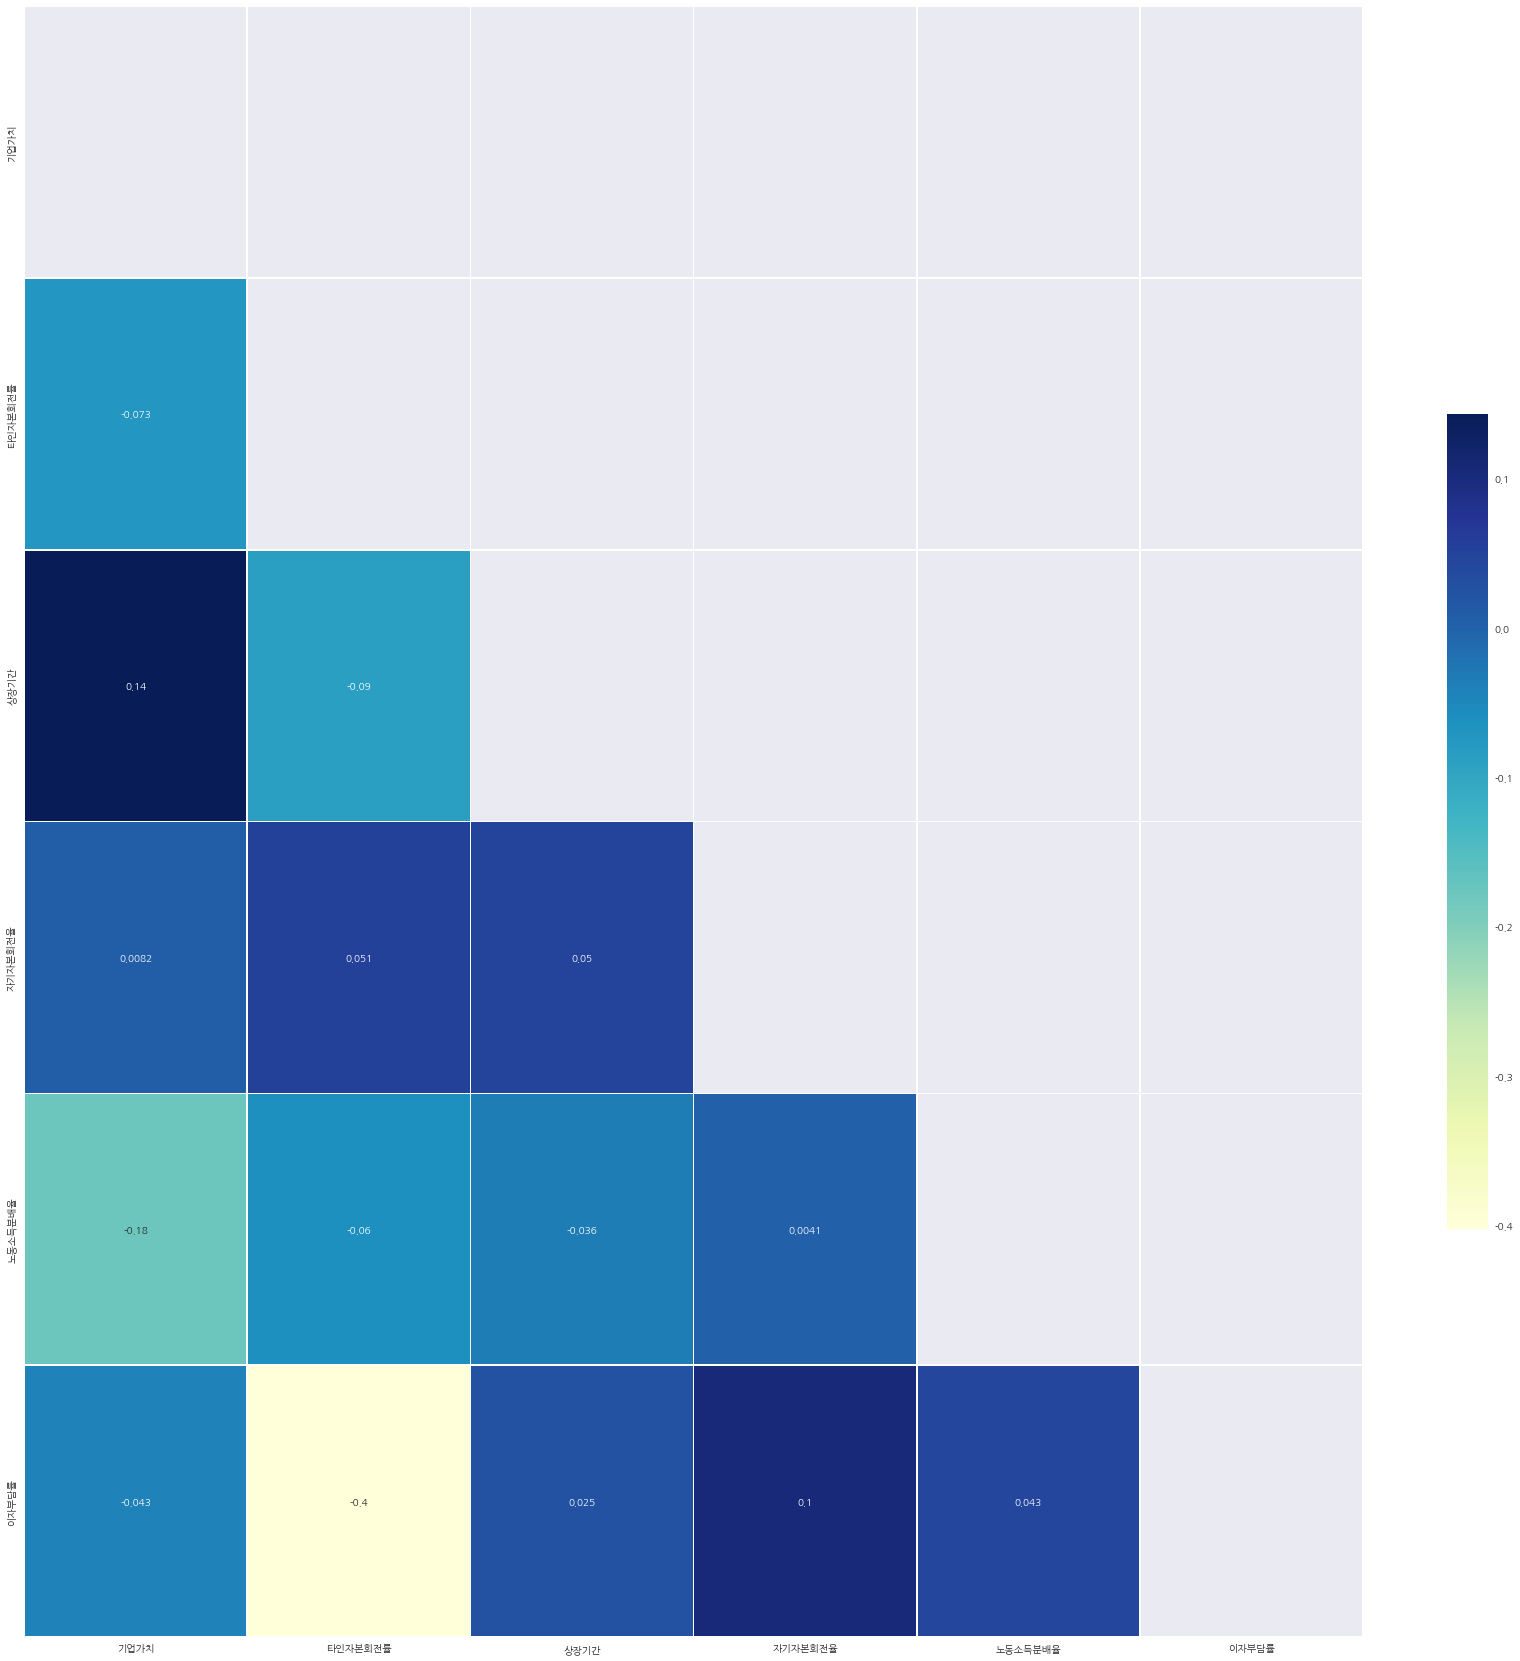

In [ ]:
# 상관행렬 시각화
mask_ut=np.triu(np.ones(mm_exvif.corr().shape)).astype(bool)  # 배열 행렬에 위쪽 삼각형 반환 -> True
plt.figure(figsize=(30,30))
sns.heatmap(mm_exvif.corr(method='pearson'), annot = True, cmap = 'YlGnBu', cbar_kws={"shrink": .5}, 
              annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
plt.show()

### 4_5. standard_scaling 변수 저장

In [ ]:
mm_exvif.to_csv('/content/drive/MyDrive/project2/datasets2/scaling_raw/mm_scaled_selected.csv')

# 3.Robust Scaling

### 1.VIF / Heatmap 확인

In [ ]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

In [ ]:
# x VIF
vif(rb_scaled).head(10)

VIF Factor       features
0 33223056.47682        매출액총이익률
1 33220961.36444     매출원가_매출액비율
2       74.84864     총자본정상영업이익률
3       74.24516        총자본순이익률
4       63.24127      EBITDA_자산
5       58.76918         기업순이익률
6       28.44565     매출액정상영업이익률
7       23.91362  영업비용_대_영업수익비율
8       11.74932        매출액순이익률
9       11.07808       자기자본순이익률

In [ ]:
# heatmap 그리기 전 초기작업
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib
from matplotlib import rc

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
#rc('font', family='AppleGothic') # Mac Os
rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# 상관행렬 시각화
mask_ut=np.triu(np.ones(rb_scaled.corr().shape)).astype(bool)  # 배열 행렬에 위쪽 삼각형 반환 -> True
plt.figure(figsize=(30,30))
sns.heatmap(rb_scaled.corr(method='pearson'), annot = True, cmap = 'YlGnBu', cbar_kws={"shrink": .5}, 
              annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## 3.회귀가정 검정

### 3_1. 정규성 검정 
**qq-plot, Distplot, Shapiro-wilk test, ks-test**
-> 표본이 대표본(n>30)이면 중심극한정리에 따라 정규성을 띈다고 가정함 

Shapiro-wilk test
- 귀무가설 : 정규분포를 따른다. (정규성을 띈다.)
- 대립가설 : 정규분포를 따르지 않는다. (정규성을 띄지 않는다.)
-> p-value > 0.05 면 귀무가설 채택으로 정규성을 따름 

In [ ]:
# 샤피로 - 윌크
from scipy.stats import shapiro
def normal_test(x):
    list = []
    for var in x.columns :
        stat, p  = shapiro(x[var].values)
        list.append([var, "{}".format(stat),"{}".format(p)])

    data = pd.DataFrame(list, columns = ['x_feature','stat','p_value'])
    data = data.astype({'p_value':'float'})

    h0 = data[(data['p_value']) > 0.05] 
    h1 = data[(data['p_value']) <= 0.05]

    return data, h0, h1  

In [ ]:
data, h0, h1 = normal_test(rb_scaled)
h0

Empty DataFrame
Columns: [x_feature, stat, p_value]
Index: []

In [ ]:
h1

x_feature                  stat  p_value
0        차입금평균이자율    0.6639826893806458  0.00000
1      매출원가_매출액비율    0.8306469321250916  0.00000
2       인건비_총비용비율    0.8842818737030029  0.00000
3         매출액순이익률   0.49164336919784546  0.00000
4         자본금순이익률    0.6756612658500671  0.00000
5         총자본순이익률    0.8336945176124573  0.00000
6        자기자본순이익률    0.6985609531402588  0.00000
7      매출액정상영업이익률    0.7559585571289062  0.00000
8      금융비용_총비용비율    0.8449916243553162  0.00000
9             유보율    0.6097179055213928  0.00000
10        총자본투자효율    0.8224026560783386  0.00000
11          부가가치율    0.8274205923080444  0.00000
12        노동소득분배율     0.653579831123352  0.00000
13        당좌자산회전률    0.8989269733428955  0.00000
14       순운전자본회전률   0.45667558908462524  0.00000
15        타인자본회전률     0.900345504283905  0.00000
16          이자부담률    0.8257188200950623  0.00000
17         기업순이익률    0.7771071791648865  0.00000
18        금융비용부담률  0.033843815326690674  0.00000
19      정상영업이익증가율   0.49282950162887573  0.00000
20     총자본정상영업이익률    0.9290151000022888  0.00000
21  영업비용_대_영업수익비율    0.8569566011428833  0.00000
22     자본금정상영업이익률    0.6281899213790894  0.00000
23    자기자본정상영업이익률    0.7594353556632996  0.00000
24         순이익증가율    0.4751588702201843  0.00000
25        매출액총이익률    0.8306434750556946  0.00000
26           기업규모    0.9355263710021973  0.00000
27        현금흐름_자산    0.9669349789619446  0.00000
28      EBITDA_자산    0.9348639845848083  0.00000
29        단기상환부담률    0.5126153826713562  0.00000
30       매출액_이자비용    0.6274086833000183  0.00000
31           기업가치    0.9541007280349731  0.00000
32      EV_EBITDA   0.43925172090530396  0.00000
33        자기자본회전율     0.793616771697998  0.00000
34        매입채무회전율    0.3615090847015381  0.00000
35        재고자산회전율   0.23326843976974487  0.00000
36        매출채권회전율    0.6452293395996094  0.00000
37       비유동자산회전율    0.7205331325531006  0.00000
38         매출액증가율    0.7896655201911926  0.00000
39        자기자본증가율    0.7190799117088318  0.00000
40         총자본증가율    0.7998611927032471  0.00000
41        유형자산증가율    0.4844915270805359  0.00000
42        유동자산증가율    0.8278437852859497  0.00000
43           상장기간    0.9121023416519165  0.00000

#### ks test
- 표본 수가 2000개 이상, 0이 나오면 정규성을 띈다고 가정

In [ ]:
from scipy.stats import stats
def ks_test(x):
    list = []
    for var in x.columns :
        stat, p  = stats.kstest(x[var].values, 'norm')
        list.append([var, "{}".format(stat),"{}".format(p)])

    data = pd.DataFrame(list, columns = ['x_feature','stat','p_value'])
    data = data.astype({'p_value':'float'})

    h0 = data[data['p_value'] > 0.05] 
    h1 = data[data['p_value'] <= 0.05]

    return h0, h1

In [ ]:
h0, h1 = ks_test(rb_scaled)
h0

Empty DataFrame
Columns: [x_feature, stat, p_value]
Index: []

In [ ]:
h1

x_feature                  stat  p_value
0        차입금평균이자율   0.11202535116820528  0.00000
1      매출원가_매출액비율    0.1934821289296409  0.00000
2       인건비_총비용비율   0.15851338815038243  0.00000
3         매출액순이익률   0.09824463043924317  0.00000
4         자본금순이익률    0.1420282408257138  0.00000
5         총자본순이익률   0.08096688267143964  0.00000
6        자기자본순이익률   0.06976251821083737  0.00000
7      매출액정상영업이익률   0.10769783765071086  0.00000
8      금융비용_총비용비율   0.07102841382147923  0.00000
9             유보율   0.22497357710397953  0.00000
10        총자본투자효율    0.0902063211358182  0.00000
11          부가가치율   0.11337020841898074  0.00000
12        노동소득분배율   0.06992740537257205  0.00000
13        당좌자산회전률   0.15165889972956068  0.00000
14       순운전자본회전률   0.16286878015789144  0.00000
15        타인자본회전률   0.16619770040318294  0.00000
16          이자부담률   0.32960160463029164  0.00000
17         기업순이익률   0.07488483454241965  0.00000
18        금융비용부담률                   0.5  0.00000
19      정상영업이익증가율   0.07862985137766754  0.00000
20     총자본정상영업이익률    0.0881334088666903  0.00000
21  영업비용_대_영업수익비율   0.12035606734207352  0.00000
22     자본금정상영업이익률   0.18843220805490257  0.00000
23    자기자본정상영업이익률   0.08894040252274807  0.00000
24         순이익증가율   0.07219540692224968  0.00000
25        매출액총이익률   0.19353260519826482  0.00000
26           기업규모   0.13975624709945528  0.00000
27        현금흐름_자산  0.061639454307011454  0.00000
28      EBITDA_자산   0.08916702131422746  0.00000
29        단기상환부담률    0.3087942815180448  0.00000
30       매출액_이자비용    0.1234028682341815  0.00000
31           기업가치   0.12003202973789721  0.00000
32      EV_EBITDA    0.2285978929560565  0.00000
33        자기자본회전율   0.18894512465541627  0.00000
34        매입채무회전율    0.4166828225437491  0.00000
35        재고자산회전율    0.2319382399827849  0.00000
36        매출채권회전율   0.18254037124581476  0.00000
37       비유동자산회전율    0.1798953472238789  0.00000
38         매출액증가율    0.0746510158883073  0.00000
39        자기자본증가율   0.09147125169368017  0.00000
40         총자본증가율   0.10170783735619132  0.00000
41        유형자산증가율   0.15202422528047352  0.00000
42        유동자산증가율   0.07289317837449505  0.00000
43           상장기간   0.19524307033050534  0.00000

#### qq-plot

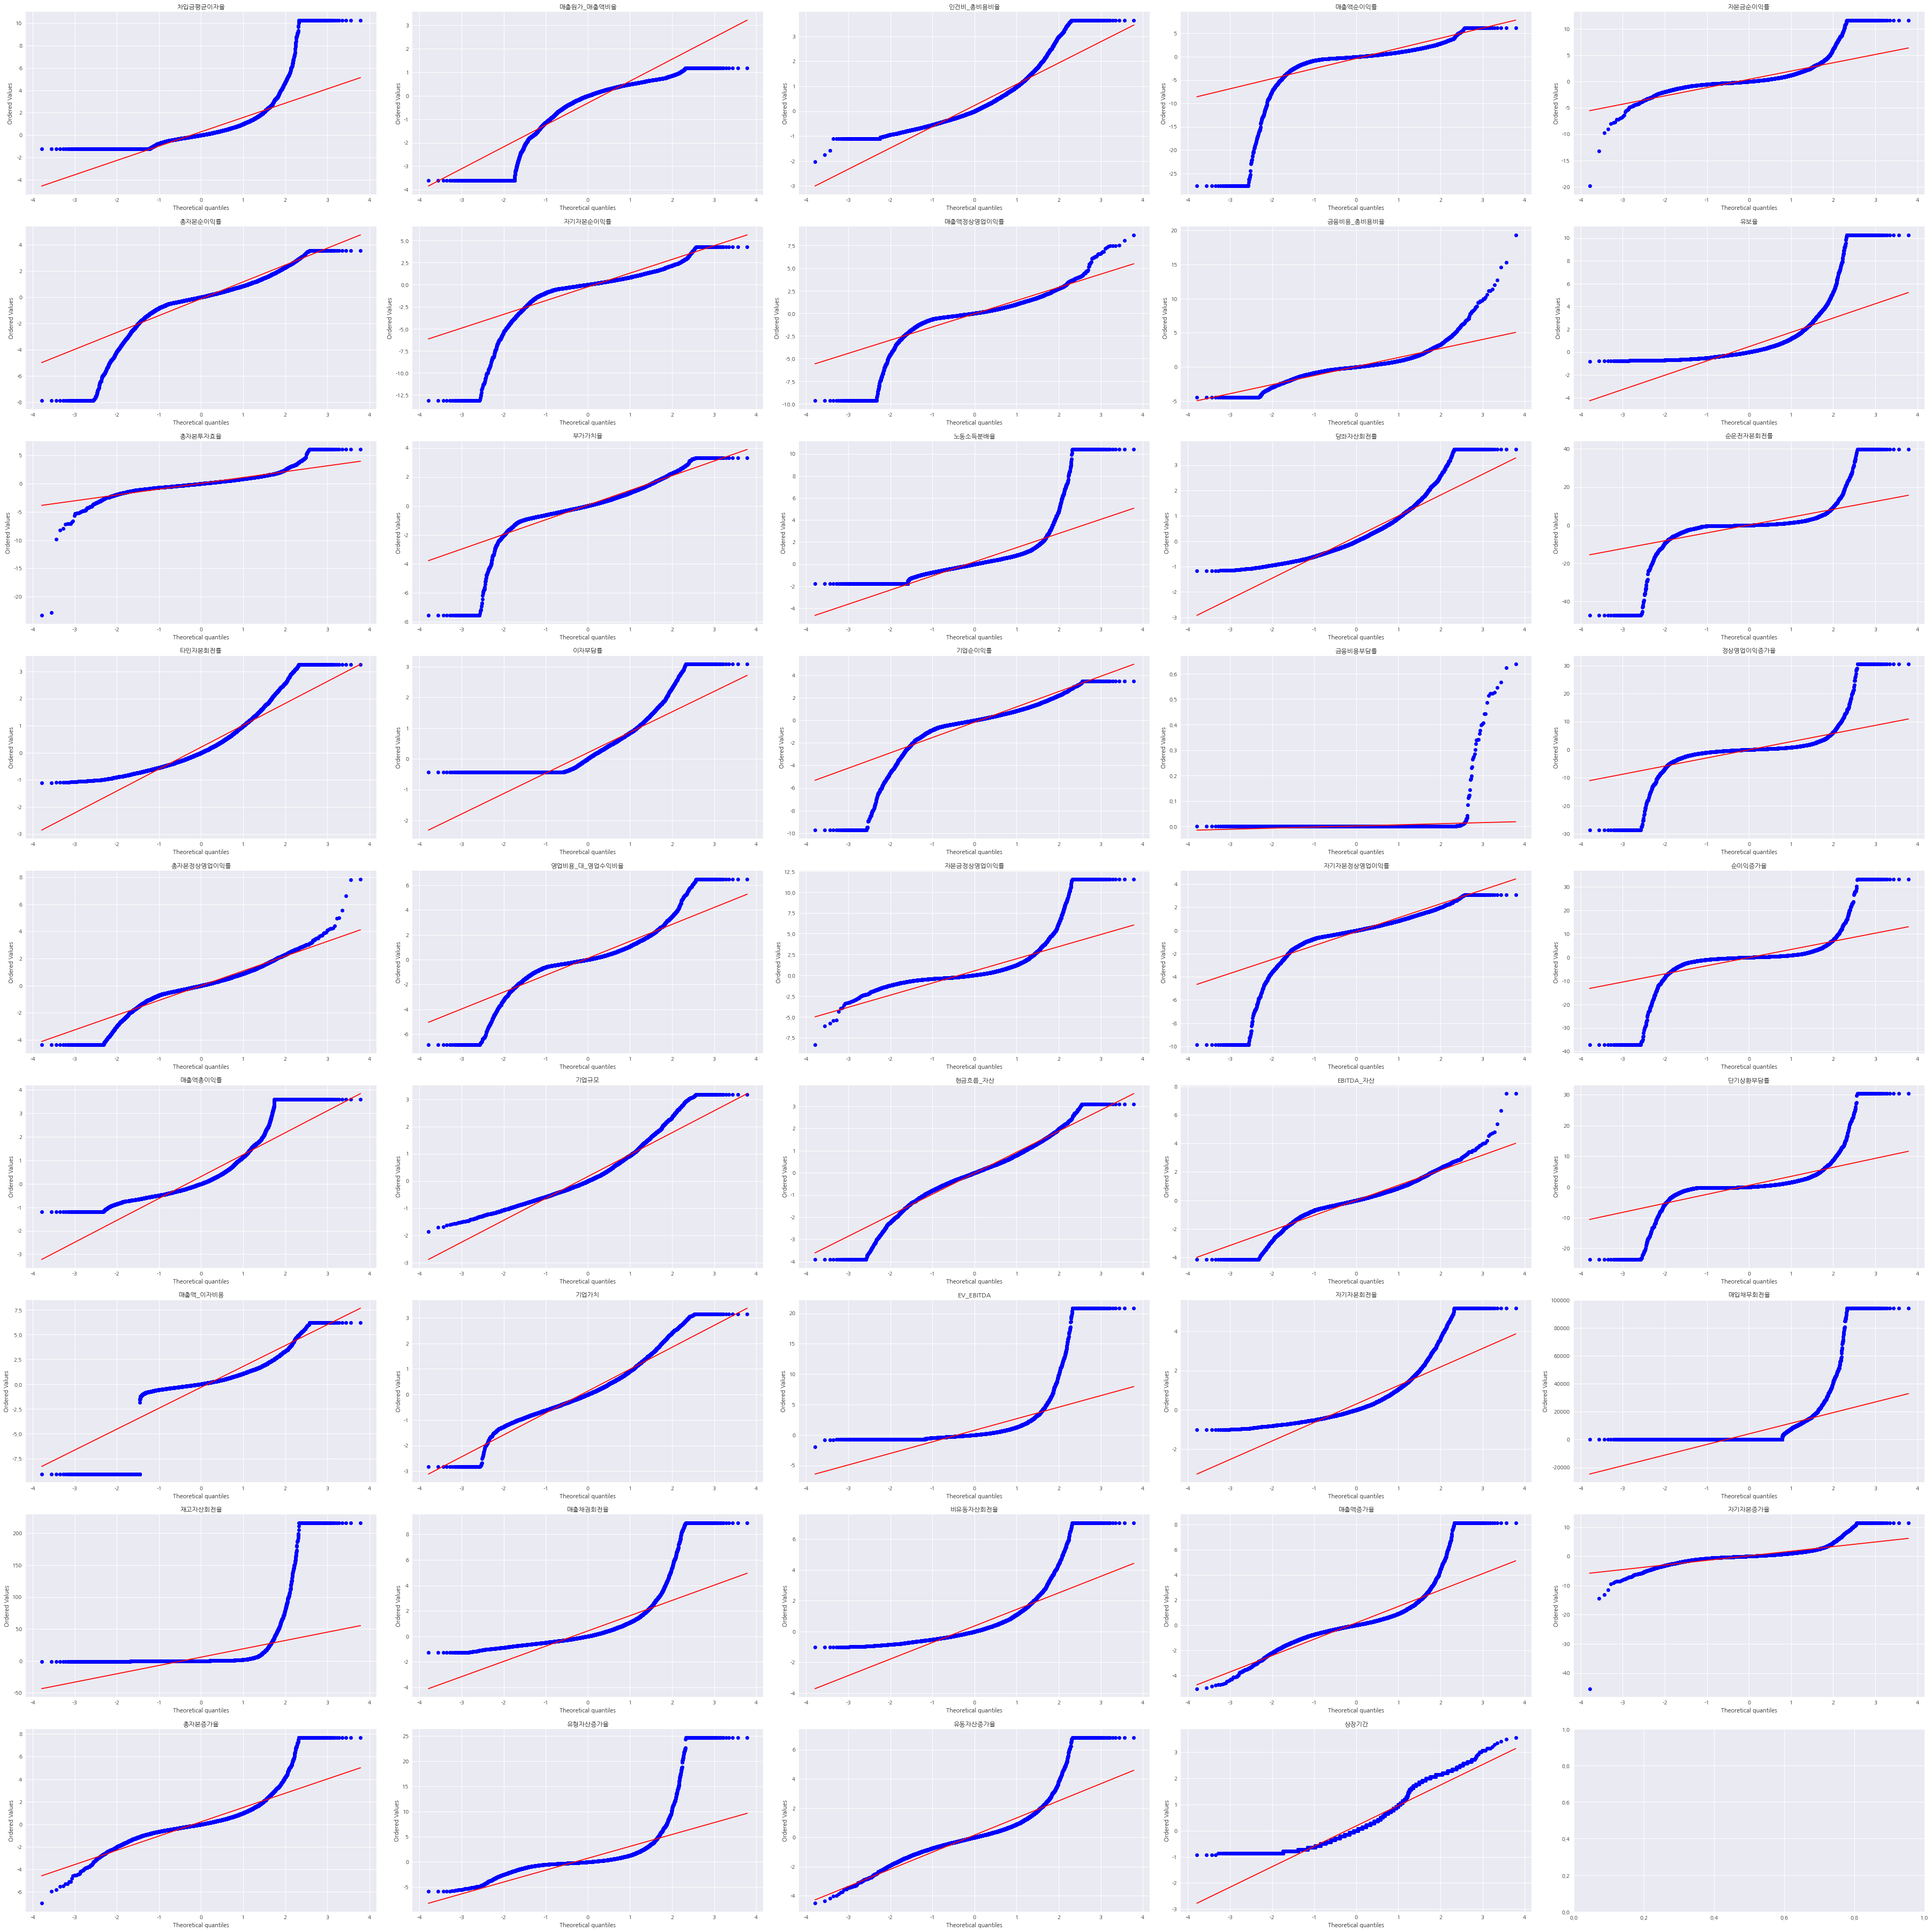

In [ ]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "NanumGothic"

ncols = 5
nrows = 9

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
fig.set_size_inches((50, 50))

for ax, i in zip(axs.ravel(), rb_scaled):
       stats.probplot(rb_scaled[i], dist=stats.norm, plot=ax)
       ax.set_title(str(i))

plt.show()

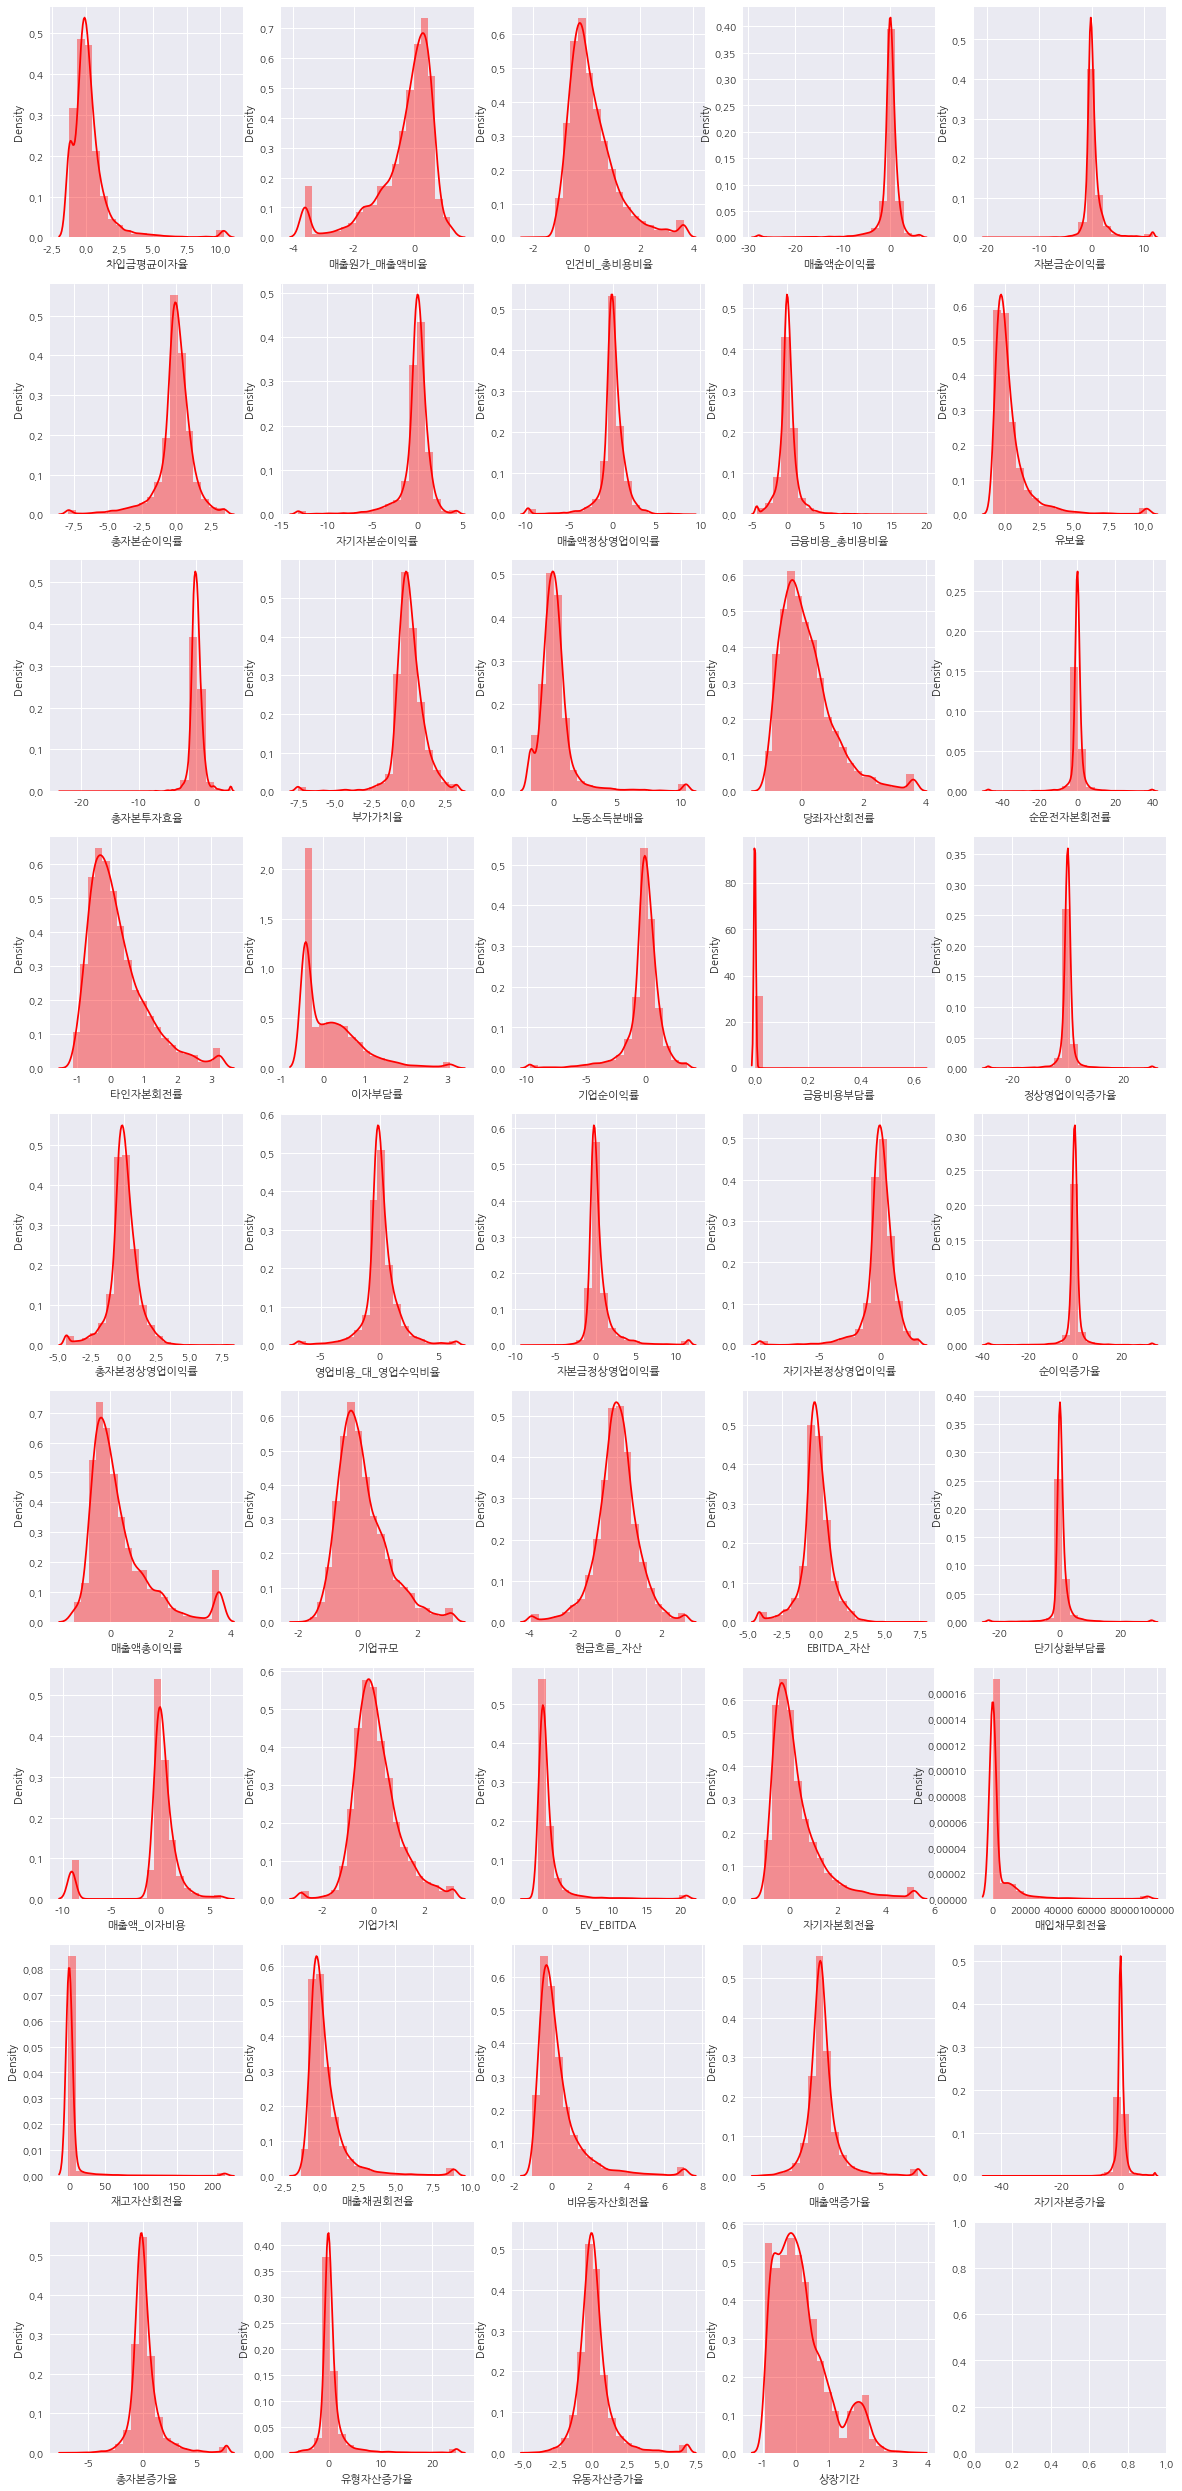

In [ ]:
# distplot
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False
col_n = 5
row_n = 9

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i, col in enumerate(rb_scaled.columns[:]):
    sns.distplot(rb_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')
  
# plt.tight_layout()

### 3_2. 등분산성 검정

In [ ]:
y = df_total[['y']]
df_bart = pd.concat([rb_scaled, y], axis=1)
df_bart

차입금평균이자율  매출원가_매출액비율  인건비_총비용비율  매출액순이익률  자본금순이익률  총자본순이익률  자기자본순이익률  \
0      0.74460    -0.37466    0.64414 -5.69504 -0.52967 -2.96313  -3.25449   
1      1.55755     0.15374    0.64157 -2.74333 -0.65919 -1.70507  -3.34431   
2      0.43885    -0.12894   -0.23610 -2.79288 -0.44048 -1.40092  -1.12874   
3      1.15827     0.54914   -0.54748 -0.91487 -0.62575 -0.74347  -1.08184   
4      0.42446     0.33183   -0.39264  0.94663  0.58889  0.27803   1.10579   
...        ...         ...        ...      ...      ...      ...       ...   
9088  -0.39209     0.66276   -0.90077 -0.29733  0.48603 -0.11367  -0.25948   
9089  -0.45324     0.67448   -0.92216 -0.32020  0.44090 -0.13978  -0.27944   
9090  -0.17986     0.67764   -0.92044 -0.30750  0.56281 -0.06912  -0.23852   
9091  -1.21583     0.67133   -0.91104  0.20966  2.92957  1.06452   0.54691   
9092   1.17266     0.78855   -0.73995 -0.86404 -0.72668 -1.11521  -2.18862   

      매출액정상영업이익률  금융비용_총비용비율      유보율  ...  재고자산회전율  매출채권회전율  비유동자산회전율  \
0       -3.76103     1.29231 -0.71968  ... -0.24444 -0.89619  -0.18857   
1       -1.54779     5.90000 -0.66394  ... -0.13077  0.00847  -0.71429   
2       -1.03064     1.24615 -0.67179  ... -0.40427  1.22246  -0.72000   
3       -0.13358     4.11538 -0.27725  ...  0.02479  1.03602  -0.68571   
4        0.00245     3.76923 -0.10327  ... -0.41111 -0.02119  -0.61714   
...          ...         ...      ...  ...      ...      ...       ...   
9088    -0.50858    -0.06154  2.26098  ...  5.16154  5.00847   0.24571   
9089    -0.53186    -0.02308  2.28611  ...  4.30684  4.45551   0.34857   
9090    -0.50980    -0.08462  2.31607  ...  5.96410  5.28178   0.46286   
9091    -0.55025    -0.16923  2.60179  ...  5.11453  5.38771   0.36000   
9092    -0.68873     1.25385 -0.56795  ...  3.61880  4.52331  -0.05143   

       매출액증가율  자기자본증가율   총자본증가율  유형자산증가율  유동자산증가율     상장기간       y  
0    -0.61711  5.79726  7.22677 -0.35282  6.84215 -0.14286 1.00000  
1    -0.74001 -2.29849 -1.25728 -0.56773 -0.64522  1.64286 1.00000  
2    -0.47548 -0.66232  0.08530  1.64233 -0.71609  0.21429 1.00000  
3    -0.63126 -0.80372 -0.79265 -0.20421 -0.78386 -0.64286 1.00000  
4    -0.00405  0.86831 -0.58460 -0.23060 -0.80114  0.28571 1.00000  
...       ...      ...      ...      ...      ...      ...     ...  
9088 -0.55979 -0.31176 -0.24619 -0.43757  0.11454  0.64286 0.00000  
9089  0.19446 -0.35823 -0.27462 -0.14906  0.11377  0.71429 0.00000  
9090  0.13352 -0.34550 -0.75104 -0.13731 -1.12912  0.78571 0.00000  
9091 -0.66204  0.34379  0.43689 -0.51711  3.31137  0.85714 0.00000  
9092  0.42333 -1.85087 -0.55964 -0.13603 -0.88496  1.57143 1.00000  

[9093 rows x 45 columns]

In [ ]:
from scipy.stats import bartlett
def bartlettTest(col, y0, y1, p_value = 0.05, H=1):

  list= []
  for i in col:
      t, p_val = bartlett(y0[i], y1[i]) 
      list.append([i, "{}".format(p_val)])

  data = pd.DataFrame(list, columns = ['x_feature', 'p_value'])

  data = data.astype({'p_value':'float'})
  if H == 1:
    data_h1 = data[data['p_value']< p_value]
    return data_h1
  else:
    data_h0 = data[data['p_value']>= p_value]
    return data_h0

In [ ]:
# 등분산
df_bart_h0= bartlettTest(df_bart.columns, df_bart[df_bart['y']==0], df_bart[df_bart['y']==1], H = 0)
df_bart_h0

x_feature  p_value
10   총자본투자효율  0.35372
13   당좌자산회전률  0.54513
26      기업규모  0.75918

In [ ]:
# 이분산
df_bart_h1= bartlettTest(df_bart.columns, df_bart[df_bart['y']==0], df_bart[df_bart['y']==1], H = 1)
df_bart_h1

x_feature  p_value
0        차입금평균이자율  0.00000
1      매출원가_매출액비율  0.00000
2       인건비_총비용비율  0.00000
3         매출액순이익률  0.00000
4         자본금순이익률  0.00000
5         총자본순이익률  0.00000
6        자기자본순이익률  0.00000
7      매출액정상영업이익률  0.00000
8      금융비용_총비용비율  0.00000
9             유보율  0.00000
11          부가가치율  0.00000
12        노동소득분배율  0.00000
14       순운전자본회전률  0.00000
15        타인자본회전률  0.00000
16          이자부담률  0.00000
17         기업순이익률  0.00000
18        금융비용부담률  0.00000
19      정상영업이익증가율  0.00000
20     총자본정상영업이익률  0.00002
21  영업비용_대_영업수익비율  0.00000
22     자본금정상영업이익률  0.00000
23    자기자본정상영업이익률  0.00000
24         순이익증가율  0.00000
25        매출액총이익률  0.00000
27        현금흐름_자산  0.00000
28      EBITDA_자산  0.00030
29        단기상환부담률  0.00000
30       매출액_이자비용  0.00000
31           기업가치  0.00003
32      EV_EBITDA  0.00000
33        자기자본회전율  0.00000
34        매입채무회전율  0.00000
35        재고자산회전율  0.00000
36        매출채권회전율  0.03323
37       비유동자산회전율  0.00000
38         매출액증가율  0.00000
39        자기자본증가율  0.00000
40         총자본증가율  0.00000
41        유형자산증가율  0.00000
42        유동자산증가율  0.00000
43           상장기간  0.00015

### 3_3. 독립성 검정

## 4.feature_selection

### 4_1. t-test

In [ ]:
# 1. 각각의 데이터셋에 대해 t_test 진행 
import scipy.stats as stats
def t_test(col, df_h0, df_h1, y0, y1, p_value = 0.05):
  list= []
  for i in col:
    if (df_h0['x_feature']==i).any():
        t_stat, p_val = stats.ttest_ind(y0[i], y1[i], equal_var=True, alternative='two-sided')
        list.append([i, p_val])
    elif (df_h1['x_feature']==i).any():
        t_stat, p_val = stats.ttest_ind(y0[i], y1[i], equal_var=False, alternative='two-sided')
        list.append([i, p_val])

  df = pd.DataFrame(list, columns = ['x_feature', 'p_value'])
  a = df[(df['p_value'] < p_value)][['x_feature', 'p_value']].sort_values('p_value')
  return a

In [ ]:
# t_test 결과 p_value < 0.05보다 작은 유의한 변수 가져오기
x_ttest_sd = t_test(df_bart.columns, df_bart_h0, df_bart_h1, df_bart[df_bart['y']==0], df_bart[df_bart['y']==1], p_value=0.05)
x_ttest_sd

x_feature  p_value
15        타인자본회전률  0.00000
22     자본금정상영업이익률  0.00000
28      EBITDA_자산  0.00000
20     총자본정상영업이익률  0.00000
4         자본금순이익률  0.00000
21  영업비용_대_영업수익비율  0.00000
10        총자본투자효율  0.00000
9             유보율  0.00000
5         총자본순이익률  0.00000
8      금융비용_총비용비율  0.00000
6        자기자본순이익률  0.00000
17         기업순이익률  0.00000
27        현금흐름_자산  0.00000
16          이자부담률  0.00000
23    자기자본정상영업이익률  0.00000
7      매출액정상영업이익률  0.00000
3         매출액순이익률  0.00000
31           기업가치  0.00000
11          부가가치율  0.00000
1      매출원가_매출액비율  0.00000
25        매출액총이익률  0.00000
0        차입금평균이자율  0.00000
39        자기자본증가율  0.00000
37       비유동자산회전율  0.00000
12        노동소득분배율  0.00000
30       매출액_이자비용  0.00000
33        자기자본회전율  0.00000
38         매출액증가율  0.00000
43           상장기간  0.00000
26           기업규모  0.00000
2       인건비_총비용비율  0.00000
35        재고자산회전율  0.00000
24         순이익증가율  0.00000
19      정상영업이익증가율  0.00000
34        매입채무회전율  0.00000
36        매출채권회전율  0.00000
18        금융비용부담률  0.00001
14       순운전자본회전률  0.00006
32      EV_EBITDA  0.00529

In [ ]:
len(x_ttest_sd)

39

In [ ]:
# t_test 유의미한 변수 datasets 생성
t_list = x_ttest_sd['x_feature'].unique()
df_ttest = pd.DataFrame()

for i in t_list:
  df = x[[i]]
  df_ttest = pd.concat([df_ttest, df], axis=1)

df_ttest

타인자본회전률  자본금정상영업이익률  EBITDA_자산  총자본정상영업이익률   자본금순이익률  영업비용_대_영업수익비율  \
0     0.93453    -0.12739   -0.07188    -0.07364 -24.28000       -0.20554   
1     0.58928    -0.20106   -0.03404    -0.03599 -45.89000       -0.07343   
2     0.90328    -0.02910   -0.00437    -0.01077  -9.40000       -0.03463   
3     0.53848     0.44720    0.01661     0.01534 -40.31000        0.03850   
4     0.69684     0.68279    0.02644     0.02321 162.34000        0.05085   
...       ...         ...        ...         ...       ...            ...   
9088 10.26429     0.64253    0.01704     0.01218 145.18000        0.00675   
9089 10.26429     0.50099    0.01435     0.00940 137.65000        0.00486   
9090 10.26429     0.72829    0.01930     0.01453 157.99000        0.00662   
9091 10.26429     0.33384    0.01207     0.00599 552.86000        0.00333   
9092  1.65098    -0.15483   -0.00927    -0.01031 -57.15000       -0.00792   

      총자본투자효율        유보율   총자본순이익률  금융비용_총비용비율  ...     기업규모  인건비_총비용비율  \
0     0.47000   -4.31000 -15.78000     1.78000  ... 24.76821   20.41000   
1    18.17000   80.99000  -7.59000     7.77000  ... 27.81255   20.38000   
2     1.04000   68.98000  -5.61000     1.72000  ... 25.44560   10.12000   
3     7.02000  672.79000  -1.33000     5.45000  ... 29.58216    6.48000   
4    10.06000  939.04000   5.32000     5.00000  ... 25.58847    8.29000   
...       ...        ...       ...         ...  ...      ...        ...   
9088  8.84000 4557.31000   2.77000     0.02000  ... 25.09445    2.35000   
9089  8.54000 4595.77000   2.60000     0.07000  ... 25.10419    2.10000   
9090  9.80000 4641.63000   3.06000    -0.01000  ... 25.04349    2.12000   
9091 18.02000 5078.89000  10.44000    -0.12000  ... 25.15004    2.23000   
9092  6.92000  227.89000  -3.75000     1.73000  ... 26.99792    4.23000   

      재고자산회전율   순이익증가율  정상영업이익증가율       매입채무회전율  매출채권회전율  금융비용부담률  순운전자본회전률  \
0     5.71000  3.41572   -7.56819       7.83000  1.85000  0.00000   0.67698   
1     7.04000 -0.48760   -0.88599      20.51000  6.12000  0.00000  -3.22721   
2     3.84000 -4.52228   -1.53863      31.55000 11.85000  0.00000   1.23259   
3     8.86000  0.34062   -0.09816      10.41000 10.97000  0.00000  -7.12120   
4     3.76000 23.45718   -0.44793    6573.65000  5.98000  0.00000  -1.95296   
...       ...      ...        ...           ...      ...      ...       ...   
9088 68.96000 -0.25711    1.08432 7478637.84962 29.72000  0.00000  12.93152   
9089 58.96000 -0.05187   -0.22028 7478637.84962 27.11000  0.00000  17.15251   
9090 78.35000  0.14777    0.45370 7478637.84962 31.01000  0.00000  21.24533   
9091 68.41000  2.49941   -0.54161 7478637.84962 31.51000  0.00000  11.29766   
9092 50.91000 -2.18000   -1.14308      16.88000 27.43000  0.00000 -13.71758   

      EV_EBITDA  
0       0.00000  
1      11.93000  
2      48.18000  
3      28.73000  
4       8.81000  
...         ...  
9088   41.48000  
9089   40.12000  
9090   25.18000  
9091   77.37000  
9092   42.33000  

[9093 rows x 39 columns]

### 4_2. Lasso, Ridge, elasticnet

#### Lasso

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    lasso = Lasso(al).fit(rb_scaled, df_total['y'])
    print("alpha : ",  al, "/ selected features : ", np.sum(lasso.coef_ != 0))

alpha :  0.0001 / selected features :  43
alpha :  0.001 / selected features :  39
alpha :  0.005 / selected features :  25
alpha :  0.01 / selected features :  23
alpha :  0.05 / selected features :  8
alpha :  0.1 / selected features :  4
alpha :  0.5 / selected features :  1
alpha :  1 / selected features :  1
alpha :  10 / selected features :  1
alpha :  100 / selected features :  1


In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    lasso = SelectFromModel(LogisticRegression(C=al, penalty="l1", solver='liblinear'))
    lasso.fit(rb_scaled, df_total['y'])

    lasso_support = lasso.get_support()
    lr_feature_sd = x.loc[:,lasso_support].columns.tolist()
    print('alpha : ', al, " / ", str(len(lr_feature_sd)), 'selected features')

alpha :  0.0001  /  2 selected features
alpha :  0.001  /  5 selected features
alpha :  0.005  /  16 selected features
alpha :  0.01  /  22 selected features
alpha :  0.05  /  36 selected features
alpha :  0.1  /  39 selected features
alpha :  0.5  /  43 selected features
alpha :  1  /  43 selected features
alpha :  10  /  44 selected features
alpha :  100  /  44 selected features


In [ ]:
# lasso L1규제 (0으로)
lasso = SelectFromModel(LogisticRegression(C=0.005, penalty='l1',solver='liblinear'))
lasso.fit(rb_scaled, df_total['y'])
lasso_support = lasso.get_support()
lr_feature_sd = rb_scaled.loc[:,lasso_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

16 selected features


In [ ]:
# lasso 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
df_lasso = df_total[lr_feature_sd]
df_lasso

매출원가_매출액비율   자본금순이익률  자기자본순이익률  금융비용_총비용비율    노동소득분배율  순운전자본회전률  \
0       71.66000 -24.28000 -26.84000     1.78000 1749.87000   0.67698   
1       83.38000 -45.89000 -27.74000     7.77000   62.53000  -3.22721   
2       77.11000  -9.40000  -5.54000     1.72000  390.13000   1.23259   
3       92.15000 -40.31000  -5.07000     5.45000   41.15000  -7.12120   
4       87.33000 162.34000  16.85000     5.00000   40.06000  -1.95296   
...          ...       ...       ...         ...        ...       ...   
9088    94.67000 145.18000   3.17000     0.02000   48.08000  12.93152   
9089    94.93000 137.65000   2.97000     0.07000   47.63000  17.15251   
9090    95.00000 157.99000   3.38000    -0.01000   47.47000  21.24533   
9091    94.86000 552.86000  11.25000    -0.12000   22.19000  11.29766   
9092    97.46000 -57.15000 -16.16000     1.73000   83.10000 -13.71758   

      타인자본회전률  정상영업이익증가율  영업비용_대_영업수익비율  자본금정상영업이익률  자기자본정상영업이익률   순이익증가율  \
0     0.93453   -7.56819       -0.20554    -0.12739     -0.13312  3.41572   
1     0.58928   -0.88599       -0.07343    -0.20106     -0.14007 -0.48760   
2     0.90328   -1.53863       -0.03463    -0.02910     -0.01712 -4.52228   
3     0.53848   -0.09816        0.03850     0.44720      0.05784  0.34062   
4     0.69684   -0.44793        0.05085     0.68279      0.06559 23.45718   
...       ...        ...            ...         ...          ...      ...   
9088 14.53913    1.08432        0.00675     0.64253      0.01393 -0.25711   
9089 15.46098   -0.22028        0.00486     0.50099      0.01077 -0.05187   
9090 22.27846    0.45370        0.00662     0.72829      0.01551  0.14777   
9091 26.37861   -0.54161        0.00333     0.33384      0.00650  2.49941   
9092  1.65098   -1.14308       -0.00792    -0.15483     -0.04834 -2.18000   

      매출액총이익률           매입채무회전율  재고자산회전율   자기자본증가율       y  
0     0.28340           7.83000  5.71000  75.17467 1.00000  
1     0.16619          20.51000  7.04000 -22.60060 1.00000  
2     0.22887          31.55000  3.84000  -2.84000 1.00000  
3     0.07849          10.41000  8.86000  -4.54767 1.00000  
4     0.12674        6573.65000  3.76000  15.64595 1.00000  
...       ...               ...      ...       ...     ...  
9088  0.05332 17957666541.82272 68.96000   1.39388 0.00000  
9089  0.05071   252212280.04736 58.96000   0.83263 0.00000  
9090  0.05004   489070908.79666 78.35000   0.98632 0.00000  
9091  0.05140  1339634880.41255 68.41000   9.31121 0.00000  
9092  0.02539          16.88000 50.91000 -17.19454 1.00000  

[9093 rows x 17 columns]

#### Ridge

In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    ridge = Ridge(alpha=al)
    ridge.fit(rb_scaled, df_total['y'])
    print("alpha : ",  al, "/ selected features : ", np.sum(ridge.coef_ != 0))

alpha :  0.0001 / selected features :  44
alpha :  0.001 / selected features :  44
alpha :  0.005 / selected features :  44
alpha :  0.01 / selected features :  44
alpha :  0.05 / selected features :  44
alpha :  0.1 / selected features :  44
alpha :  0.5 / selected features :  44
alpha :  1 / selected features :  44
alpha :  10 / selected features :  44
alpha :  100 / selected features :  44


In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    ridge = SelectFromModel(LogisticRegression(C=al, penalty="l2", solver='liblinear'))
    ridge.fit(rb_scaled, df_total['y'])

    ridge_support = ridge.get_support()
    lr_feature_sd = x.loc[:,ridge_support].columns.tolist()
    print('alpha : ', al, " / ", str(len(lr_feature_sd)), 'selected features')

alpha :  0.0001  /  21 selected features
alpha :  0.001  /  19 selected features
alpha :  0.005  /  18 selected features
alpha :  0.01  /  16 selected features
alpha :  0.05  /  17 selected features
alpha :  0.1  /  18 selected features
alpha :  0.5  /  18 selected features
alpha :  1  /  18 selected features
alpha :  10  /  16 selected features
alpha :  100  /  17 selected features


In [ ]:
# ridge L2규제 (0으로 수렴)
ridge = SelectFromModel(LogisticRegression(C=0.005, penalty='l2',solver='liblinear'))
ridge.fit(rb_scaled, df_total['y'])
ridge_support = ridge.get_support()
lr_feature_sd = rb_scaled.loc[:,ridge_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

18 selected features


In [ ]:
# ridge 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
df_ridge = df_total[lr_feature_sd]
df_ridge

차입금평균이자율  매출원가_매출액비율  인건비_총비용비율   자본금순이익률  자기자본순이익률  금융비용_총비용비율  \
0      5.45000    71.66000   20.41000 -24.28000 -26.84000     1.78000   
1      7.71000    83.38000   20.38000 -45.89000 -27.74000     7.77000   
2      4.60000    77.11000   10.12000  -9.40000  -5.54000     1.72000   
3      6.60000    92.15000    6.48000 -40.31000  -5.07000     5.45000   
4      4.56000    87.33000    8.29000 162.34000  16.85000     5.00000   
...        ...         ...        ...       ...       ...         ...   
9088   2.29000    94.67000    2.35000 145.18000   3.17000     0.02000   
9089   2.12000    94.93000    2.10000 137.65000   2.97000     0.07000   
9090   2.88000    95.00000    2.12000 157.99000   3.38000    -0.01000   
9091   0.00000    94.86000    2.23000 552.86000  11.25000    -0.12000   
9092   6.64000    97.46000    4.23000 -57.15000 -16.16000     1.73000   

            유보율  타인자본회전률   기업순이익률  영업비용_대_영업수익비율  자본금정상영업이익률  자기자본정상영업이익률  \
0      -4.31000  0.93453 -0.10712       -0.20554    -0.12739     -0.13312   
1      80.99000  0.58928 -0.03369       -0.07343    -0.20106     -0.14007   
2      68.98000  0.90328 -0.04125       -0.03463    -0.02910     -0.01712   
3     672.79000  0.53848  0.01431        0.03850     0.44720      0.05784   
4     939.04000  0.69684  0.08078        0.05085     0.68279      0.06559   
...         ...      ...      ...            ...         ...          ...   
9088 4557.31000 14.53913  0.02752        0.00675     0.64253      0.01393   
9089 4595.77000 15.46098  0.02584        0.00486     0.50099      0.01077   
9090 4641.63000 22.27846  0.03151        0.00662     0.72829      0.01551   
9091 5078.89000 26.37861  0.09912        0.00333     0.33384      0.00650   
9092  227.89000  1.65098 -0.00677       -0.00792    -0.15483     -0.04834   

      매출액총이익률  자기자본회전율  비유동자산회전율   자기자본증가율    총자본증가율  상장기간       y  
0     0.28340  0.66000   1.48000  75.17467 109.15000    11 1.00000  
1     0.16619  1.56000   0.56000 -22.60060 -13.19000    36 1.00000  
2     0.22887  0.47000   0.55000  -2.84000   6.17000    16 1.00000  
3     0.07849  1.51000   0.61000  -4.54767  -6.49000     4 1.00000  
4     0.12674  1.45000   0.73000  15.64595  -3.49000    17 1.00000  
...       ...      ...       ...       ...       ...   ...     ...  
9088  0.05332  2.09000   2.24000   1.39388   1.39000    22 0.00000  
9089  0.05071  2.24000   2.42000   0.83263   0.98000    23 0.00000  
9090  0.05004  2.37000   2.62000   0.98632  -5.89000    24 0.00000  
9091  0.05140  2.04000   2.44000   9.31121  11.24000    25 0.00000  
9092  0.02539  5.47000   1.72000 -17.19454  -3.13000    35 1.00000  

[9093 rows x 19 columns]

#### elastic_net

In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    elasticNet = ElasticNet(alpha=al)
    elasticNet.fit(rb_scaled, df_total['y'])
    print("alpha : ",  al, "/ selected features : ", np.sum(elasticNet.coef_ != 0))

alpha :  0.0001 / selected features :  43
alpha :  0.001 / selected features :  41
alpha :  0.005 / selected features :  34
alpha :  0.01 / selected features :  25
alpha :  0.05 / selected features :  12
alpha :  0.1 / selected features :  8
alpha :  0.5 / selected features :  4
alpha :  1 / selected features :  1
alpha :  10 / selected features :  1
alpha :  100 / selected features :  1


In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    elasticnet = SelectFromModel(LogisticRegression(C=al, penalty="elasticnet", solver='saga', l1_ratio=0.5))
    elasticnet.fit(rb_scaled, df_total['y'])

    elasticnet_support = elasticnet.get_support()
    lr_feature_sd = x.loc[:,elasticnet_support].columns.tolist()
    print('alpha : ', al, " / ", str(len(lr_feature_sd)), 'selected features')

alpha :  0.0001  /  2 selected features
alpha :  0.001  /  8 selected features
alpha :  0.005  /  8 selected features
alpha :  0.01  /  8 selected features
alpha :  0.05  /  8 selected features
alpha :  0.1  /  8 selected features
alpha :  0.5  /  8 selected features
alpha :  1  /  8 selected features
alpha :  10  /  8 selected features
alpha :  100  /  8 selected features


In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    elasticnet = SelectFromModel(LogisticRegression(C=al, penalty="elasticnet", solver='saga', l1_ratio=1))
    elasticnet.fit(rb_scaled, df_total['y'])

    elasticnet_support = elasticnet.get_support()
    lr_feature_sd = x.loc[:,elasticnet_support].columns.tolist()
    print('alpha : ', al, " / ", str(len(lr_feature_sd)), 'selected features')

alpha :  0.0001  /  2 selected features
alpha :  0.001  /  7 selected features
alpha :  0.005  /  8 selected features
alpha :  0.01  /  8 selected features
alpha :  0.05  /  8 selected features
alpha :  0.1  /  8 selected features
alpha :  0.5  /  8 selected features
alpha :  1  /  8 selected features
alpha :  10  /  8 selected features
alpha :  100  /  8 selected features


In [ ]:
# elasticnet
elasticnet = SelectFromModel(LogisticRegression(C=1, penalty='elasticnet',solver='saga', l1_ratio=1))
elasticnet.fit(rb_scaled, df_total['y'])
ridge_support = elasticnet.get_support()
lr_feature_sd = rb_scaled.loc[:,ridge_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

8 selected features


In [ ]:
# elasticnet 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
df_elasticnet0 = df_total[lr_feature_sd]
df_elasticnet0.head()

자본금순이익률       유보율  자본금정상영업이익률  단기상환부담률  EV_EBITDA    매입채무회전율  재고자산회전율  \
0 -24.28000  -4.31000    -0.12739 -0.02436    0.00000    7.83000  5.71000   
1 -45.89000  80.99000    -0.20106 -0.13225   11.93000   20.51000  7.04000   
2  -9.40000  68.98000    -0.02910 -0.00000   48.18000   31.55000  3.84000   
3 -40.31000 672.79000     0.44720  3.51200   28.73000   10.41000  8.86000   
4 162.34000 939.04000     0.68279 18.77182    8.81000 6573.65000  3.76000   

   유형자산증가율       y  
0 -4.13061 1.00000  
1 -7.89108 1.00000  
2 30.78114 1.00000  
3 -1.53021 1.00000  
4 -1.99187 1.00000

### 4_3. forward, backstep, stepwise

In [ ]:
import statsmodels.api as sm

In [ ]:
## 전진 선택법

# feature, target 분리
# 독립변수 리스트
variables = rb_scaled.columns.tolist() 
# 종속변수
y = df_total['y']
 
# 선택된 변수들
fstep_selected_variables = []
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(fstep_selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = rb_scaled[fstep_selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        fstep_selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(rb_scaled[fstep_selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(fstep_selected_variables.copy())
    else:
        break

In [ ]:
fstep_selected_variables

['EBITDA_자산',
 '금융비용_총비용비율',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '기업순이익률',
 '상장기간',
 '타인자본회전률',
 '자기자본회전율',
 '노동소득분배율',
 '이자부담률',
 '총자본증가율',
 '자기자본증가율',
 '차입금평균이자율',
 '순이익증가율',
 '순운전자본회전률',
 '매출액증가율',
 '매입채무회전율',
 '당좌자산회전률',
 '총자본순이익률',
 '정상영업이익증가율',
 '매출액_이자비용',
 '기업가치',
 '비유동자산회전율',
 '자본금순이익률',
 '자본금정상영업이익률',
 'EV_EBITDA',
 '인건비_총비용비율',
 '총자본정상영업이익률',
 '매출액정상영업이익률',
 '영업비용_대_영업수익비율',
 '현금흐름_자산',
 '매출액순이익률']

In [ ]:
len(fstep_selected_variables)

32

In [ ]:
## 후진 제거법

# feature, target 분리
# 독립변수 리스트
variables = rb_scaled.columns.tolist() 
# 종속변수
y = df_total['y']
 
# 선택된 변수들
bstep_selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(bstep_selected_variables) > 0:
    X = sm.add_constant(rb_scaled[bstep_selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        bstep_selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(rb_scaled[bstep_selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(bstep_selected_variables.copy())
    else:
        break

In [ ]:
bstep_selected_variables

['차입금평균이자율',
 '인건비_총비용비율',
 '매출액순이익률',
 '자본금순이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '매출액정상영업이익률',
 '금융비용_총비용비율',
 '노동소득분배율',
 '당좌자산회전률',
 '순운전자본회전률',
 '타인자본회전률',
 '이자부담률',
 '기업순이익률',
 '정상영업이익증가율',
 '총자본정상영업이익률',
 '영업비용_대_영업수익비율',
 '자본금정상영업이익률',
 '자기자본정상영업이익률',
 '순이익증가율',
 '현금흐름_자산',
 '매출액_이자비용',
 '기업가치',
 'EV_EBITDA',
 '자기자본회전율',
 '매입채무회전율',
 '비유동자산회전율',
 '매출액증가율',
 '자기자본증가율',
 '총자본증가율',
 '상장기간']

In [ ]:
len(bstep_selected_variables)

31

In [ ]:
# stepwise 단계별 선택법

# feature, target 분리
# 독립변수 리스트
variables = rb_scaled.columns.tolist() 
# 종속변수
y = df_total['y']

step_selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(step_selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = rb_scaled[step_selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        step_selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(step_selected_variables) > 0:
            selected_X = rb_scaled[step_selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                step_selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(rb_scaled[step_selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(step_selected_variables.copy())
    else:
        break

In [ ]:
step_selected_variables

['금융비용_총비용비율',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '기업순이익률',
 '상장기간',
 '타인자본회전률',
 '자기자본회전율',
 '노동소득분배율',
 '총자본순이익률',
 '총자본증가율',
 '자기자본증가율',
 '이자부담률',
 '차입금평균이자율',
 '순이익증가율',
 '순운전자본회전률',
 '매출액증가율',
 '매입채무회전율',
 '당좌자산회전률',
 '정상영업이익증가율',
 '매출액_이자비용',
 '비유동자산회전율',
 '기업가치',
 '자본금순이익률',
 'EV_EBITDA',
 '현금흐름_자산',
 '총자본정상영업이익률',
 '자본금정상영업이익률',
 '매출액정상영업이익률',
 '영업비용_대_영업수익비율',
 '인건비_총비용비율',
 '매출액순이익률']

In [ ]:
len(step_selected_variables)

31

### 4_4. select 변수들

In [ ]:
lasso_list = df_lasso.columns[:-1] # y제외
lasso_list

Index(['매출원가_매출액비율', '자본금순이익률', '자기자본순이익률', '금융비용_총비용비율', '노동소득분배율',
       '순운전자본회전률', '타인자본회전률', '정상영업이익증가율', '영업비용_대_영업수익비율', '자본금정상영업이익률',
       '자기자본정상영업이익률', '순이익증가율', '매출액총이익률', '매입채무회전율', '재고자산회전율', '자기자본증가율'],
      dtype='object')

In [ ]:
ridge_list = df_ridge.columns[:-1] # y제외
ridge_list

Index(['차입금평균이자율', '매출원가_매출액비율', '인건비_총비용비율', '자본금순이익률', '자기자본순이익률',
       '금융비용_총비용비율', '유보율', '타인자본회전률', '기업순이익률', '영업비용_대_영업수익비율', '자본금정상영업이익률',
       '자기자본정상영업이익률', '매출액총이익률', '자기자본회전율', '비유동자산회전율', '자기자본증가율', '총자본증가율',
       '상장기간'],
      dtype='object')

In [ ]:
elasticne_list = df_elasticnet0.columns[:-1] # y제외
elasticne_list

Index(['자본금순이익률', '유보율', '자본금정상영업이익률', '단기상환부담률', 'EV_EBITDA', '매입채무회전율',
       '재고자산회전율', '유형자산증가율'],
      dtype='object')

In [ ]:
wrapper = list(set(fstep_selected_variables) & set(bstep_selected_variables) & set(step_selected_variables))
wrapper

['매출액_이자비용',
 '타인자본회전률',
 '이자부담률',
 '자본금정상영업이익률',
 '순이익증가율',
 '매출액증가율',
 '정상영업이익증가율',
 '매출액정상영업이익률',
 '자기자본정상영업이익률',
 '자본금순이익률',
 '자기자본증가율',
 '현금흐름_자산',
 '매출액순이익률',
 '총자본증가율',
 '차입금평균이자율',
 '당좌자산회전률',
 '금융비용_총비용비율',
 '총자본순이익률',
 '자기자본회전율',
 '기업순이익률',
 '영업비용_대_영업수익비율',
 '순운전자본회전률',
 '기업가치',
 '자기자본순이익률',
 'EV_EBITDA',
 '비유동자산회전율',
 '인건비_총비용비율',
 '매입채무회전율',
 '상장기간',
 '총자본정상영업이익률',
 '노동소득분배율']

In [ ]:
embedded = list(set(lasso_list) & set(ridge_list) & set(elasticne_list))
embedded

['자본금순이익률', '자본금정상영업이익률']

In [ ]:
intersection_step = list(set(wrapper) & set(t_list) & set(embedded))
intersection_step

['자본금순이익률', '자본금정상영업이익률']

In [ ]:
len(intersection_step)

2

In [ ]:
# feature list 에 맞게 데이터 불러오기
def make_feature_df(feature_list, dataset):
  total = pd.DataFrame()

  for i in feature_list:
    df = dataset[[i]]
    total = pd.concat([total, df], axis=1)

  return total

df_inter = make_feature_df(intersection_step, rb_scaled)
df_inter_rb = df_inter.copy()

## 2.VIF제거

In [ ]:
# x VIF
vif(df_inter_rb).head(5)

VIF Factor    features
0     3.55007  자본금정상영업이익률
1     3.55007     자본금순이익률

In [ ]:
a = vif(df_inter_rb)
rb_vif_list = a['features'].unique()
rb_vif_list

array(['자본금정상영업이익률', '자본금순이익률'], dtype=object)

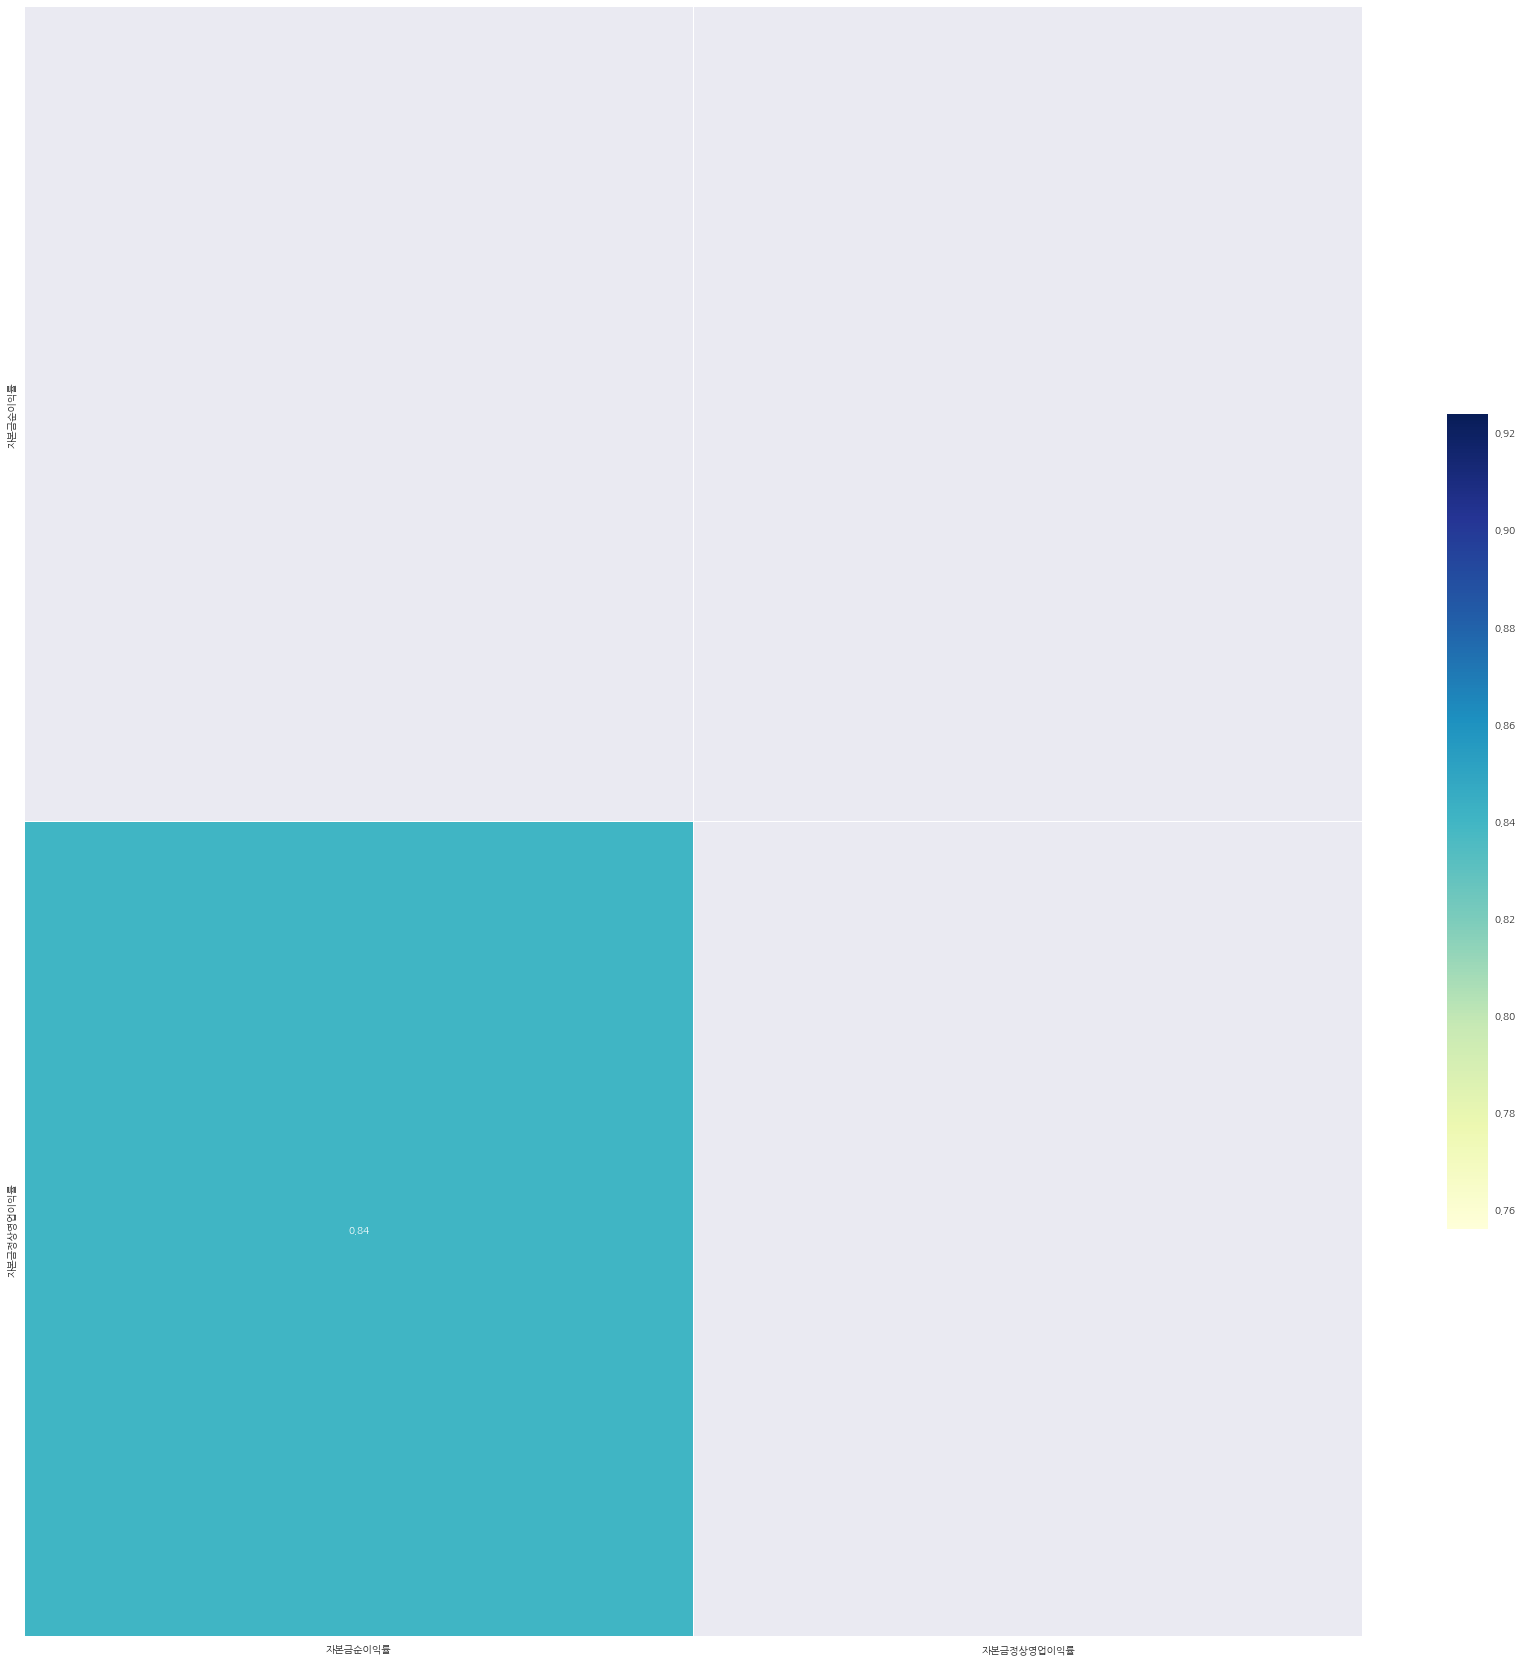

In [ ]:
# 상관행렬 시각화
mask_ut=np.triu(np.ones(df_inter_rb.corr().shape)).astype(bool)  # 배열 행렬에 위쪽 삼각형 반환 -> True
plt.figure(figsize=(30,30))
sns.heatmap(df_inter_rb.corr(method='pearson'), annot = True, cmap = 'YlGnBu', cbar_kws={"shrink": .5}, 
              annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
plt.show()

### 4_5. standard_scaling 변수 저장

In [ ]:
df_inter_rb.to_csv('/content/drive/MyDrive/project2/datasets2/scaling_raw/rb_scaled_selected.csv')

# 4.MaxAbs Scaling

### 1.VIF / Heatmap 확인

In [ ]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

In [ ]:
# x VIF
vif(ma_scaled).head(10)

VIF Factor       features
0  1326.37717           기업규모
1   954.66545           기업가치
2   401.34249     매출원가_매출액비율
3    99.93582     총자본정상영업이익률
4    89.79453        매출액총이익률
5    89.75364      EBITDA_자산
6    80.72077        총자본순이익률
7    64.66039         기업순이익률
8    31.80325     매출액정상영업이익률
9    29.13892  영업비용_대_영업수익비율

In [ ]:
# heatmap 그리기 전 초기작업
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib
from matplotlib import rc

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
#rc('font', family='AppleGothic') # Mac Os
rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# 상관행렬 시각화
mask_ut=np.triu(np.ones(ma_scaled.corr().shape)).astype(bool)  # 배열 행렬에 위쪽 삼각형 반환 -> True
plt.figure(figsize=(30,30))
sns.heatmap(ma_scaled.corr(method='pearson'), annot = True, cmap = 'YlGnBu', cbar_kws={"shrink": .5}, 
              annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## 3.회귀가정 검정

### 3_1. 정규성 검정 
**qq-plot, Distplot, Shapiro-wilk test, ks-test**
-> 표본이 대표본(n>30)이면 중심극한정리에 따라 정규성을 띈다고 가정함 

Shapiro-wilk test
- 귀무가설 : 정규분포를 따른다. (정규성을 띈다.)
- 대립가설 : 정규분포를 따르지 않는다. (정규성을 띄지 않는다.)
-> p-value > 0.05 면 귀무가설 채택으로 정규성을 따름 

In [ ]:
# 샤피로 - 윌크
from scipy.stats import shapiro
def normal_test(x):
    list = []
    for var in x.columns :
        stat, p  = shapiro(x[var].values)
        list.append([var, "{}".format(stat),"{}".format(p)])

    data = pd.DataFrame(list, columns = ['x_feature','stat','p_value'])
    data = data.astype({'p_value':'float'})

    h0 = data[(data['p_value']) > 0.05] 
    h1 = data[(data['p_value']) <= 0.05]

    return data, h0, h1  

In [ ]:
data, h0, h1 = normal_test(ma_scaled)
h0

Empty DataFrame
Columns: [x_feature, stat, p_value]
Index: []

In [ ]:
h1

x_feature                  stat  p_value
0        차입금평균이자율    0.6639828085899353  0.00000
1      매출원가_매출액비율     0.830646812915802  0.00000
2       인건비_총비용비율    0.8842827081680298  0.00000
3         매출액순이익률    0.4916433095932007  0.00000
4         자본금순이익률    0.6756613254547119  0.00000
5         총자본순이익률    0.8336943984031677  0.00000
6        자기자본순이익률    0.6985611319541931  0.00000
7      매출액정상영업이익률    0.7559584975242615  0.00000
8      금융비용_총비용비율    0.8449927568435669  0.00000
9             유보율    0.6097179651260376  0.00000
10        총자본투자효율    0.8224027156829834  0.00000
11          부가가치율    0.8274198770523071  0.00000
12        노동소득분배율    0.6535801887512207  0.00000
13        당좌자산회전률     0.898926317691803  0.00000
14       순운전자본회전률    0.4566754698753357  0.00000
15        타인자본회전률     0.900345504283905  0.00000
16          이자부담률    0.8257251977920532  0.00000
17         기업순이익률    0.7771071791648865  0.00000
18        금융비용부담률  0.033843815326690674  0.00000
19      정상영업이익증가율    0.4928296208381653  0.00000
20     총자본정상영업이익률    0.9290146827697754  0.00000
21  영업비용_대_영업수익비율    0.8569563031196594  0.00000
22     자본금정상영업이익률    0.6281893849372864  0.00000
23    자기자본정상영업이익률    0.7594355344772339  0.00000
24         순이익증가율    0.4751589894294739  0.00000
25        매출액총이익률    0.8306418061256409  0.00000
26           기업규모    0.9355296492576599  0.00000
27        현금흐름_자산    0.9669342637062073  0.00000
28      EBITDA_자산    0.9348639845848083  0.00000
29        단기상환부담률    0.5126155614852905  0.00000
30       매출액_이자비용    0.6274086236953735  0.00000
31           기업가치    0.9541031122207642  0.00000
32      EV_EBITDA   0.43925178050994873  0.00000
33        자기자본회전율     0.793616771697998  0.00000
34        매입채무회전율   0.36150914430618286  0.00000
35        재고자산회전율   0.23326843976974487  0.00000
36        매출채권회전율    0.6452296376228333  0.00000
37       비유동자산회전율    0.7205331325531006  0.00000
38         매출액증가율    0.7896655797958374  0.00000
39        자기자본증가율    0.7190797328948975  0.00000
40         총자본증가율    0.7998611927032471  0.00000
41        유형자산증가율   0.48449182510375977  0.00000
42        유동자산증가율     0.827843964099884  0.00000
43           상장기간     0.912097692489624  0.00000

#### ks test 
- 표본 수가 2000개 이상, 0이 나오면 정규성을 띈다고 가정

In [ ]:
from scipy.stats import stats

def ks_test(x):
    list = []
    for var in x.columns :
        stat, p  = stats.kstest(x[var].values, 'norm')
        list.append([var, "{}".format(stat),"{}".format(p)])

    data = pd.DataFrame(list, columns = ['x_feature','stat','p_value'])
    data = data.astype({'p_value':'float'})

    h0 = data[data['p_value'] > 0.05] 
    h1 = data[data['p_value'] <= 0.05]

    return h0, h1

In [ ]:
h0, h1 = ks_test(ma_scaled)
h0

Empty DataFrame
Columns: [x_feature, stat, p_value]
Index: []

In [ ]:
h1

x_feature                 stat  p_value
0        차입금평균이자율                  0.5  0.00000
1      매출원가_매출액비율   0.5639708585969757  0.00000
2       인건비_총비용비율    0.499670075882547  0.00000
3         매출액순이익률   0.4290505803632986  0.00000
4         자본금순이익률    0.445727384001846  0.00000
5         총자본순이익률  0.35569414999714144  0.00000
6        자기자본순이익률  0.39174087406633695  0.00000
7      매출액정상영업이익률   0.3809813427048816  0.00000
8      금융비용_총비용비율   0.4182425189701179  0.00000
9             유보율  0.49733967258393424  0.00000
10        총자본투자효율   0.4673764202662355  0.00000
11          부가가치율   0.4524810948002552  0.00000
12        노동소득분배율                  0.5  0.00000
13        당좌자산회전률   0.5031168598183408  0.00000
14       순운전자본회전률   0.4195564701621047  0.00000
15        타인자본회전률   0.5043257767545345  0.00000
16          이자부담률                  0.5  0.00000
17         기업순이익률   0.3717246238279691  0.00000
18        금융비용부담률                  0.5  0.00000
19      정상영업이익증가율   0.4164756313386946  0.00000
20     총자본정상영업이익률   0.3925505969277701  0.00000
21  영업비용_대_영업수익비율  0.37737109478433567  0.00000
22     자본금정상영업이익률   0.4508385472960581  0.00000
23    자기자본정상영업이익률  0.39360331708340723  0.00000
24         순이익증가율   0.4166328250747954  0.00000
25        매출액총이익률  0.48181895604379443  0.00000
26           기업규모   0.7679195774695593  0.00000
27        현금흐름_자산   0.3563273070840586  0.00000
28      EBITDA_자산  0.39595424465758583  0.00000
29        단기상환부담률   0.4298595737347707  0.00000
30       매출액_이자비용   0.6209246644657531  0.00000
31           기업가치   0.7598116660948122  0.00000
32      EV_EBITDA  0.49934015176509405  0.00000
33        자기자본회전율    0.500305632425517  0.00000
34        매입채무회전율                  0.5  0.00000
35        재고자산회전율                  0.5  0.00000
36        매출채권회전율   0.5024847081579303  0.00000
37       비유동자산회전율   0.5007970299780846  0.00000
38         매출액증가율   0.3874797544572627  0.00000
39        자기자본증가율  0.45506844452636297  0.00000
40         총자본증가율  0.40049614396679245  0.00000
41        유형자산증가율  0.43962795665322335  0.00000
42        유동자산증가율  0.38442638309747984  0.00000
43           상장기간   0.5058922524244788  0.00000

#### qq-plot

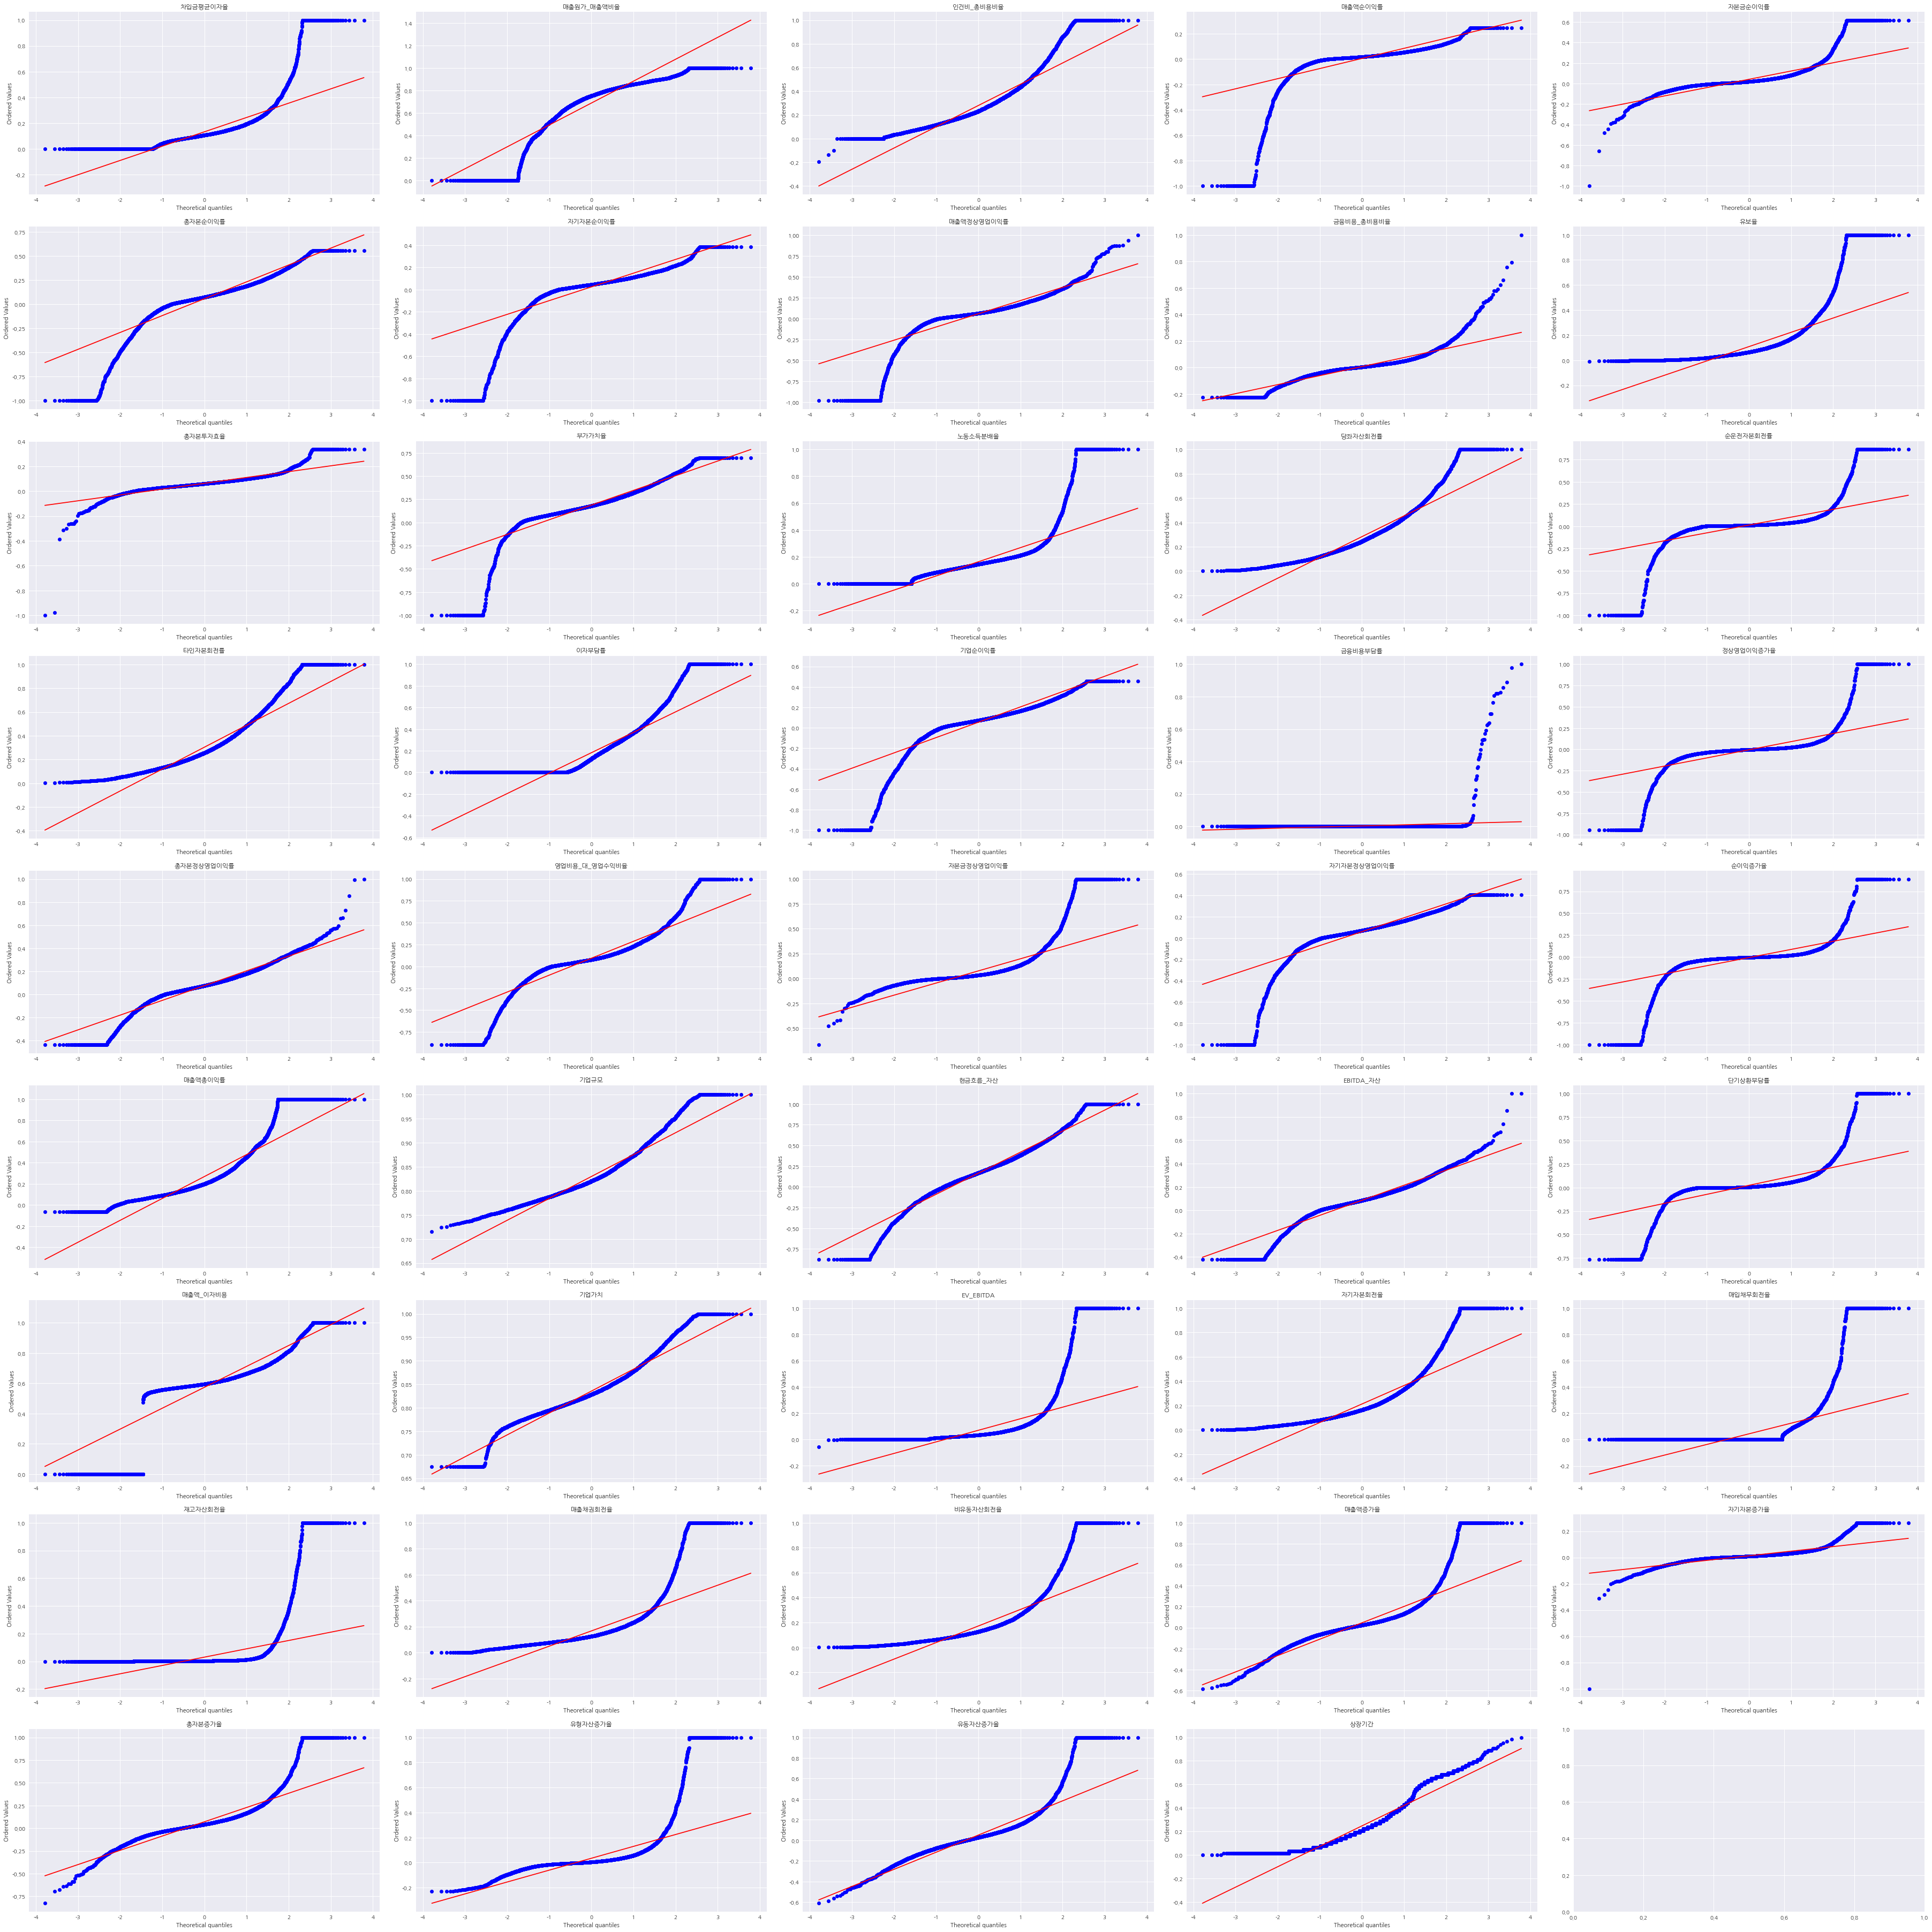

In [ ]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "NanumGothic"

ncols = 5
nrows = 9

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
fig.set_size_inches((50, 50))

for ax, i in zip(axs.ravel(), ma_scaled):
       stats.probplot(ma_scaled[i], dist=stats.norm, plot=ax)
       ax.set_title(str(i))

plt.show()

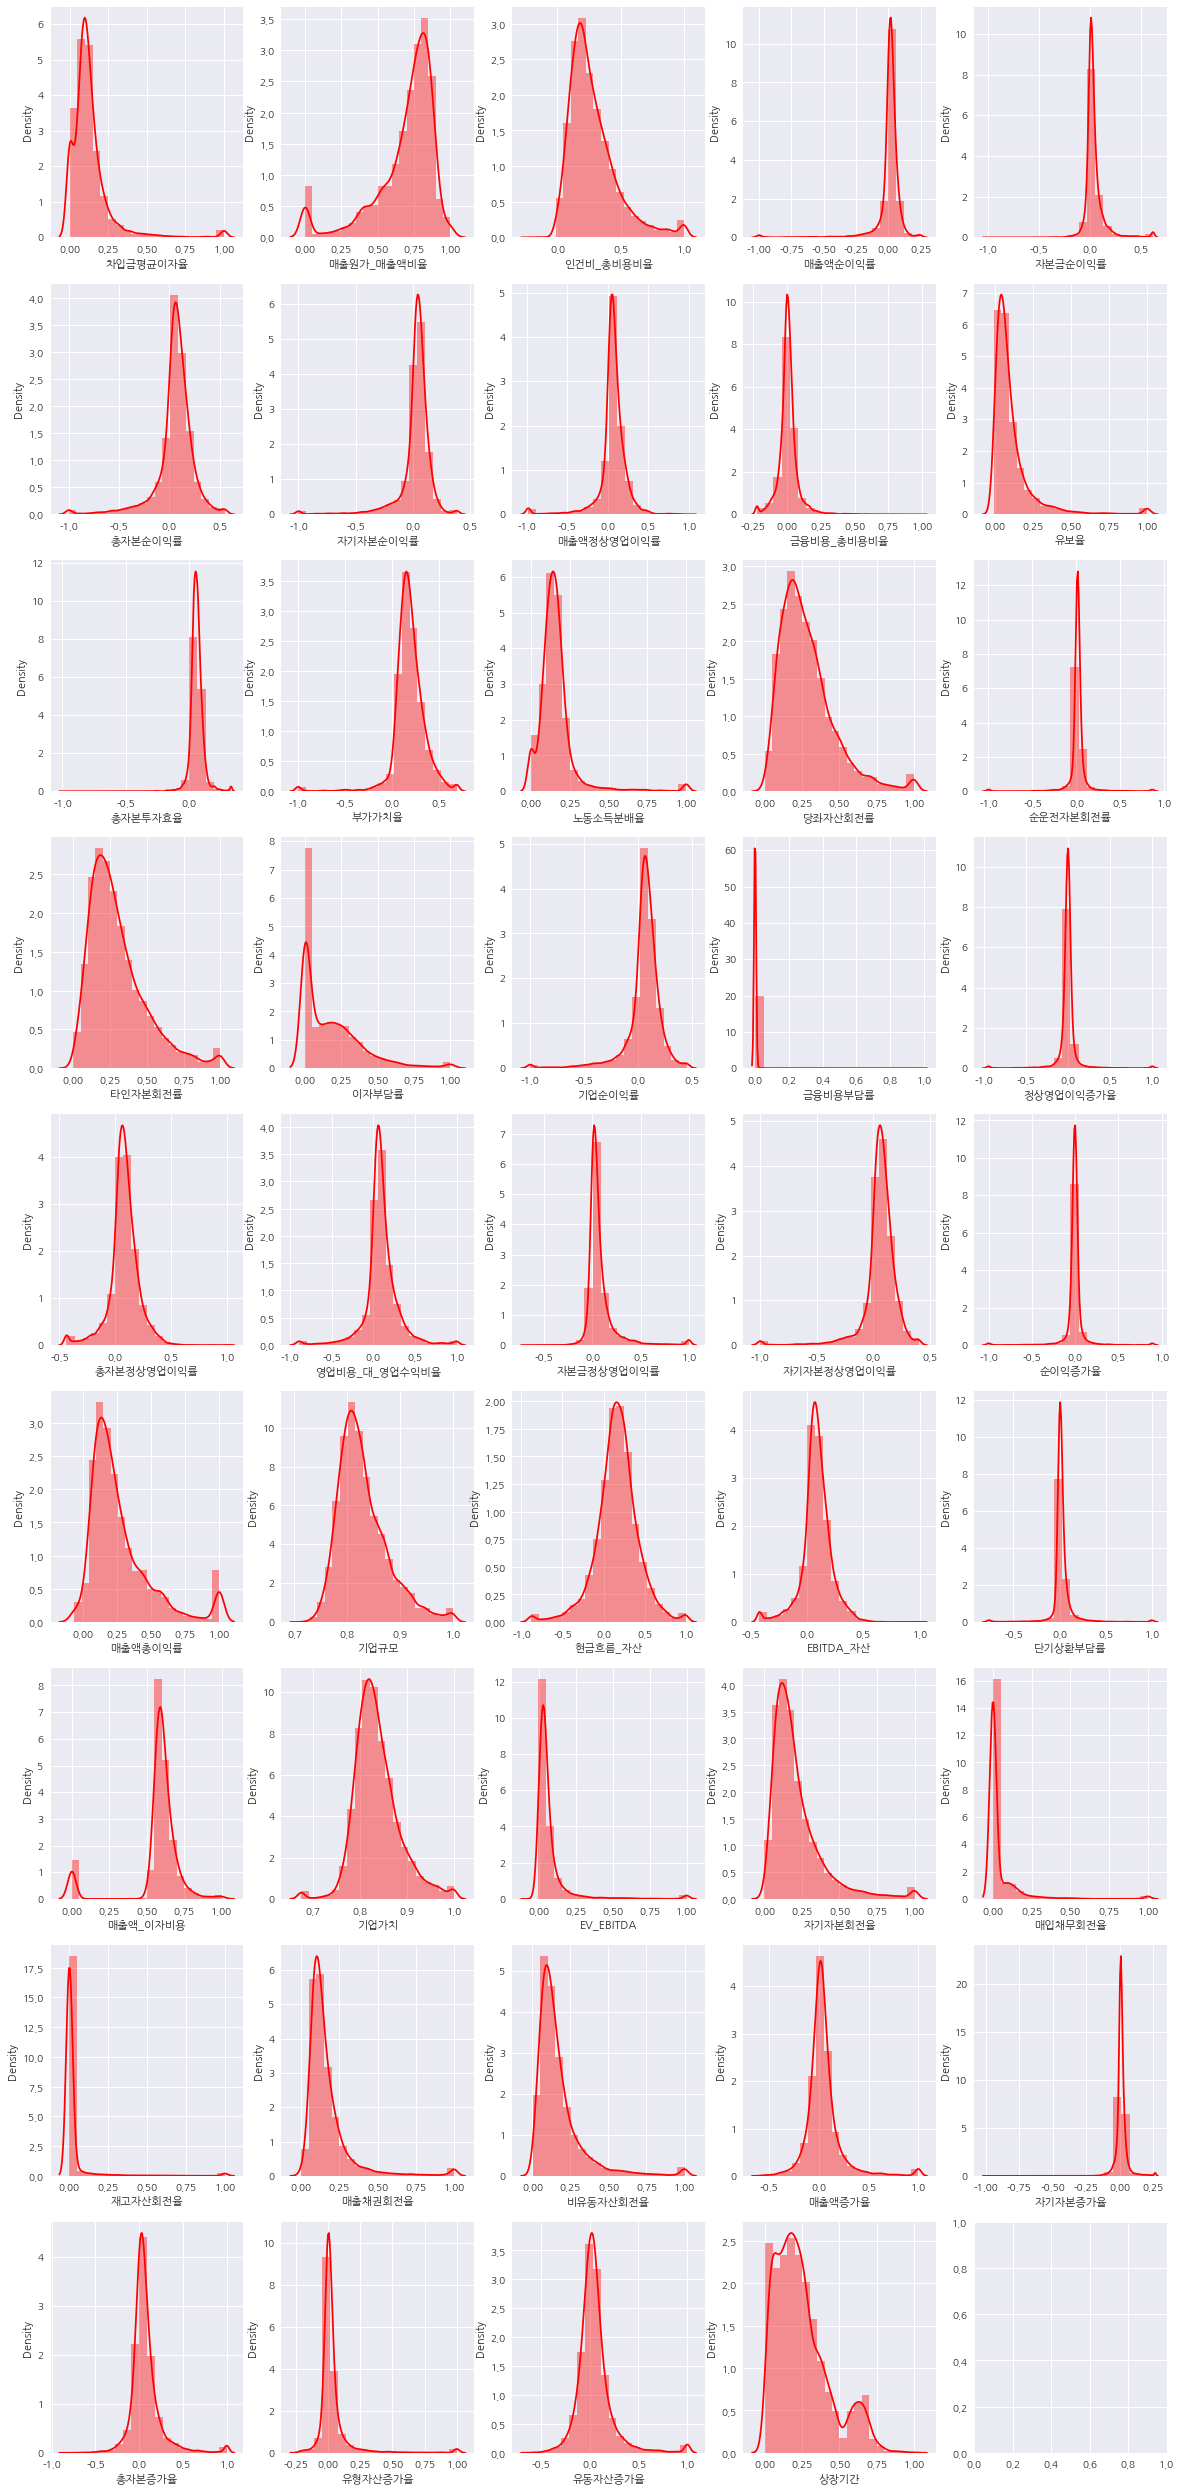

In [ ]:
# distplot
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False
col_n = 5
row_n = 9

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i, col in enumerate(ma_scaled.columns[:]):
    sns.distplot(ma_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')
  
# plt.tight_layout()

### 3_2. 등분산성 검정

In [ ]:
y = df_total[['y']]
df_bart = pd.concat([ma_scaled, y], axis=1)
df_bart

차입금평균이자율  매출원가_매출액비율  인건비_총비용비율  매출액순이익률  자본금순이익률  총자본순이익률  자기자본순이익률  \
0      0.17074     0.67457    0.36748 -0.19114 -0.00747 -0.32923  -0.21239   
1      0.24154     0.78490    0.36694 -0.08276 -0.01413 -0.15836  -0.21951   
2      0.14411     0.72588    0.18221 -0.08458 -0.00289 -0.11705  -0.04384   
3      0.20677     0.86746    0.11667 -0.01563 -0.01241 -0.02775  -0.04012   
4      0.14286     0.82208    0.14926  0.05272  0.04997  0.11100   0.13334   
...        ...         ...        ...      ...      ...      ...       ...   
9088   0.07174     0.89118    0.04231  0.00704  0.04469  0.05779   0.02509   
9089   0.06642     0.89363    0.03781  0.00620  0.04237  0.05425   0.02350   
9090   0.09023     0.89429    0.03817  0.00667  0.04863  0.06384   0.02675   
9091   0.00000     0.89297    0.04015  0.02566  0.17018  0.21782   0.08902   
9092   0.20802     0.91744    0.07616 -0.01376 -0.01759 -0.07824  -0.12788   

      매출액정상영업이익률  금융비용_총비용비율      유보율  ...  재고자산회전율  매출채권회전율  비유동자산회전율  \
0       -0.34233     0.07058 -0.00026  ...  0.00225  0.03842   0.10452   
1       -0.10335     0.30809  0.00481  ...  0.00277  0.12710   0.03955   
2       -0.04751     0.06820  0.00410  ...  0.00151  0.24611   0.03884   
3        0.04936     0.21610  0.03999  ...  0.00349  0.22783   0.04308   
4        0.06405     0.19826  0.05582  ...  0.00148  0.12420   0.05155   
...          ...         ...      ...  ...      ...      ...       ...   
9088     0.00887     0.00079  0.27089  ...  0.02713  0.61724   0.15819   
9089     0.00635     0.00278  0.27318  ...  0.02319  0.56303   0.17090   
9090     0.00873    -0.00040  0.27591  ...  0.03082  0.64403   0.18503   
9091     0.00437    -0.00476  0.30190  ...  0.02691  0.65441   0.17232   
9092    -0.01059     0.06860  0.01355  ...  0.02003  0.56968   0.12147   

       매출액증가율  자기자본증가율   총자본증가율  유형자산증가율  유동자산증가율    상장기간       y  
0    -0.04956  0.13865  0.94079 -0.00951  1.00000 0.17460 1.00000  
1    -0.06429 -0.04169 -0.11369 -0.01818 -0.06231 0.57143 1.00000  
2    -0.03259 -0.00524  0.05318  0.07090 -0.07237 0.25397 1.00000  
3    -0.05126 -0.00839 -0.05594 -0.00352 -0.08198 0.06349 1.00000  
4     0.02391  0.02886 -0.03008 -0.00459 -0.08444 0.26984 1.00000  
...       ...      ...      ...      ...      ...     ...     ...  
9088 -0.04269  0.00257  0.01198 -0.01293  0.04548 0.34921 0.00000  
9089  0.04771  0.00154  0.00845 -0.00130  0.04537 0.36508 0.00000  
9090  0.04040  0.00182 -0.05077 -0.00083 -0.13097 0.38095 0.00000  
9091 -0.05494  0.01717  0.09688 -0.01614  0.49905 0.39683 0.00000  
9092  0.07514 -0.03171 -0.02698 -0.00078 -0.09633 0.55556 1.00000  

[9093 rows x 45 columns]

In [ ]:
from scipy.stats import bartlett
def bartlettTest(col, y0, y1, p_value = 0.05, H=1):

  list= []
  for i in col:
      t, p_val = bartlett(y0[i], y1[i]) 
      list.append([i, "{}".format(p_val)])

  data = pd.DataFrame(list, columns = ['x_feature', 'p_value'])

  data = data.astype({'p_value':'float'})
  if H == 1:
    data_h1 = data[data['p_value']< p_value]
    return data_h1
  else:
    data_h0 = data[data['p_value']>= p_value]
    return data_h0

In [ ]:
# 등분산
df_bart_h0= bartlettTest(df_bart.columns, df_bart[df_bart['y']==0], df_bart[df_bart['y']==1], H = 0)
df_bart_h0

x_feature  p_value
10   총자본투자효율  0.35372
13   당좌자산회전률  0.54513
26      기업규모  0.75918

In [ ]:
# 이분산
df_bart_h1= bartlettTest(df_bart.columns, df_bart[df_bart['y']==0], df_bart[df_bart['y']==1], H = 1)
df_bart_h1

x_feature  p_value
0        차입금평균이자율  0.00000
1      매출원가_매출액비율  0.00000
2       인건비_총비용비율  0.00000
3         매출액순이익률  0.00000
4         자본금순이익률  0.00000
5         총자본순이익률  0.00000
6        자기자본순이익률  0.00000
7      매출액정상영업이익률  0.00000
8      금융비용_총비용비율  0.00000
9             유보율  0.00000
11          부가가치율  0.00000
12        노동소득분배율  0.00000
14       순운전자본회전률  0.00000
15        타인자본회전률  0.00000
16          이자부담률  0.00000
17         기업순이익률  0.00000
18        금융비용부담률  0.00000
19      정상영업이익증가율  0.00000
20     총자본정상영업이익률  0.00002
21  영업비용_대_영업수익비율  0.00000
22     자본금정상영업이익률  0.00000
23    자기자본정상영업이익률  0.00000
24         순이익증가율  0.00000
25        매출액총이익률  0.00000
27        현금흐름_자산  0.00000
28      EBITDA_자산  0.00030
29        단기상환부담률  0.00000
30       매출액_이자비용  0.00000
31           기업가치  0.00003
32      EV_EBITDA  0.00000
33        자기자본회전율  0.00000
34        매입채무회전율  0.00000
35        재고자산회전율  0.00000
36        매출채권회전율  0.03323
37       비유동자산회전율  0.00000
38         매출액증가율  0.00000
39        자기자본증가율  0.00000
40         총자본증가율  0.00000
41        유형자산증가율  0.00000
42        유동자산증가율  0.00000
43           상장기간  0.00015

### 3_3. 독립성 검정
-> 귀무가설 : 정규분포를 따른다.  
-> 무선표집(random_sampling)을 하였다면 만족하는 것으로 여김

## 4.feature_selection

### 4_1. t-test

In [ ]:
# 1. 각각의 데이터셋에 대해 t_test 진행 
import scipy.stats as stats
def t_test(col, df_h0, df_h1, y0, y1, p_value = 0.05):
  list= []
  for i in col:
    if (df_h0['x_feature']==i).any():
        t_stat, p_val = stats.ttest_ind(y0[i], y1[i], equal_var=True, alternative='two-sided')
        list.append([i, p_val])
    elif (df_h1['x_feature']==i).any():
        t_stat, p_val = stats.ttest_ind(y0[i], y1[i], equal_var=False, alternative='two-sided')
        list.append([i, p_val])

  df = pd.DataFrame(list, columns = ['x_feature', 'p_value'])
  a = df[(df['p_value'] < p_value)][['x_feature', 'p_value']].sort_values('p_value')
  return a

In [ ]:
# t_test 결과 p_value < 0.05보다 작은 유의한 변수 가져오기
x_ttest_ma = t_test(df_bart.columns, df_bart_h0, df_bart_h1, df_bart[df_bart['y']==0], df_bart[df_bart['y']==1], p_value=0.05)
x_ttest_ma

x_feature  p_value
15        타인자본회전률  0.00000
22     자본금정상영업이익률  0.00000
28      EBITDA_자산  0.00000
20     총자본정상영업이익률  0.00000
4         자본금순이익률  0.00000
21  영업비용_대_영업수익비율  0.00000
10        총자본투자효율  0.00000
9             유보율  0.00000
5         총자본순이익률  0.00000
8      금융비용_총비용비율  0.00000
6        자기자본순이익률  0.00000
17         기업순이익률  0.00000
27        현금흐름_자산  0.00000
16          이자부담률  0.00000
23    자기자본정상영업이익률  0.00000
7      매출액정상영업이익률  0.00000
3         매출액순이익률  0.00000
31           기업가치  0.00000
11          부가가치율  0.00000
1      매출원가_매출액비율  0.00000
25        매출액총이익률  0.00000
0        차입금평균이자율  0.00000
39        자기자본증가율  0.00000
37       비유동자산회전율  0.00000
12        노동소득분배율  0.00000
30       매출액_이자비용  0.00000
33        자기자본회전율  0.00000
38         매출액증가율  0.00000
43           상장기간  0.00000
26           기업규모  0.00000
2       인건비_총비용비율  0.00000
35        재고자산회전율  0.00000
24         순이익증가율  0.00000
19      정상영업이익증가율  0.00000
34        매입채무회전율  0.00000
36        매출채권회전율  0.00000
18        금융비용부담률  0.00001
14       순운전자본회전률  0.00006
32      EV_EBITDA  0.00529

In [ ]:
len(x_ttest_ma)

39

In [ ]:
# t_test 유의미한 변수 datasets 생성
t_list = x_ttest_ma['x_feature'].unique()
df_ttest = pd.DataFrame()

for i in t_list:
  df = x[[i]]
  df_ttest = pd.concat([df_ttest, df], axis=1)

df_ttest

타인자본회전률  자본금정상영업이익률  EBITDA_자산  총자본정상영업이익률   자본금순이익률  영업비용_대_영업수익비율  \
0     0.93453    -0.12739   -0.07188    -0.07364 -24.28000       -0.20554   
1     0.58928    -0.20106   -0.03404    -0.03599 -45.89000       -0.07343   
2     0.90328    -0.02910   -0.00437    -0.01077  -9.40000       -0.03463   
3     0.53848     0.44720    0.01661     0.01534 -40.31000        0.03850   
4     0.69684     0.68279    0.02644     0.02321 162.34000        0.05085   
...       ...         ...        ...         ...       ...            ...   
9088 10.26429     0.64253    0.01704     0.01218 145.18000        0.00675   
9089 10.26429     0.50099    0.01435     0.00940 137.65000        0.00486   
9090 10.26429     0.72829    0.01930     0.01453 157.99000        0.00662   
9091 10.26429     0.33384    0.01207     0.00599 552.86000        0.00333   
9092  1.65098    -0.15483   -0.00927    -0.01031 -57.15000       -0.00792   

      총자본투자효율        유보율   총자본순이익률  금융비용_총비용비율  ...     기업규모  인건비_총비용비율  \
0     0.47000   -4.31000 -15.78000     1.78000  ... 24.76821   20.41000   
1    18.17000   80.99000  -7.59000     7.77000  ... 27.81255   20.38000   
2     1.04000   68.98000  -5.61000     1.72000  ... 25.44560   10.12000   
3     7.02000  672.79000  -1.33000     5.45000  ... 29.58216    6.48000   
4    10.06000  939.04000   5.32000     5.00000  ... 25.58847    8.29000   
...       ...        ...       ...         ...  ...      ...        ...   
9088  8.84000 4557.31000   2.77000     0.02000  ... 25.09445    2.35000   
9089  8.54000 4595.77000   2.60000     0.07000  ... 25.10419    2.10000   
9090  9.80000 4641.63000   3.06000    -0.01000  ... 25.04349    2.12000   
9091 18.02000 5078.89000  10.44000    -0.12000  ... 25.15004    2.23000   
9092  6.92000  227.89000  -3.75000     1.73000  ... 26.99792    4.23000   

      재고자산회전율   순이익증가율  정상영업이익증가율       매입채무회전율  매출채권회전율  금융비용부담률  순운전자본회전률  \
0     5.71000  3.41572   -7.56819       7.83000  1.85000  0.00000   0.67698   
1     7.04000 -0.48760   -0.88599      20.51000  6.12000  0.00000  -3.22721   
2     3.84000 -4.52228   -1.53863      31.55000 11.85000  0.00000   1.23259   
3     8.86000  0.34062   -0.09816      10.41000 10.97000  0.00000  -7.12120   
4     3.76000 23.45718   -0.44793    6573.65000  5.98000  0.00000  -1.95296   
...       ...      ...        ...           ...      ...      ...       ...   
9088 68.96000 -0.25711    1.08432 7478637.84962 29.72000  0.00000  12.93152   
9089 58.96000 -0.05187   -0.22028 7478637.84962 27.11000  0.00000  17.15251   
9090 78.35000  0.14777    0.45370 7478637.84962 31.01000  0.00000  21.24533   
9091 68.41000  2.49941   -0.54161 7478637.84962 31.51000  0.00000  11.29766   
9092 50.91000 -2.18000   -1.14308      16.88000 27.43000  0.00000 -13.71758   

      EV_EBITDA  
0       0.00000  
1      11.93000  
2      48.18000  
3      28.73000  
4       8.81000  
...         ...  
9088   41.48000  
9089   40.12000  
9090   25.18000  
9091   77.37000  
9092   42.33000  

[9093 rows x 39 columns]

### 4_2. Lasso, Ridge, elasticnet

#### Lasso

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    lasso = Lasso(al).fit(ma_scaled, df_total['y'])
    print("alpha : ",  al, "/ selected features : ", np.sum(lasso.coef_ != 0))

alpha :  0.0001 / selected features :  36
alpha :  0.001 / selected features :  18
alpha :  0.005 / selected features :  5
alpha :  0.01 / selected features :  5
alpha :  0.05 / selected features :  0
alpha :  0.1 / selected features :  0
alpha :  0.5 / selected features :  0
alpha :  1 / selected features :  0
alpha :  10 / selected features :  0
alpha :  100 / selected features :  0


In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    lasso = SelectFromModel(LogisticRegression(C=al, penalty="l1", solver='liblinear'))
    lasso.fit(ma_scaled, df_total['y'])

    lasso_support = lasso.get_support()
    lr_feature_sd = x.loc[:,lasso_support].columns.tolist()
    print('alpha : ', al, " / ", str(len(lr_feature_sd)), 'selected features')

alpha :  0.0001  /  0 selected features
alpha :  0.001  /  0 selected features
alpha :  0.005  /  2 selected features
alpha :  0.01  /  7 selected features
alpha :  0.05  /  13 selected features
alpha :  0.1  /  20 selected features
alpha :  0.5  /  32 selected features
alpha :  1  /  38 selected features
alpha :  10  /  44 selected features
alpha :  100  /  44 selected features


In [ ]:
# lasso L1규제 (0으로)
lasso = SelectFromModel(LogisticRegression(C=0.1, penalty='l1',solver='liblinear'))
lasso.fit(ma_scaled, df_total['y'])
lasso_support = lasso.get_support()
lr_feature_sd = ma_scaled.loc[:,lasso_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

20 selected features


In [ ]:
# lasso 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
df_lasso = df_total[lr_feature_sd]
df_lasso

차입금평균이자율  인건비_총비용비율   매출액순이익률  자기자본순이익률  금융비용_총비용비율    노동소득분배율  당좌자산회전률  \
0      5.45000   20.41000 -40.97000 -26.84000     1.78000 1749.87000  0.57286   
1      7.71000   20.38000 -17.74000 -27.74000     7.77000   62.53000  2.54490   
2      4.60000   10.12000 -18.13000  -5.54000     1.72000  390.13000  0.86004   
3      6.60000    6.48000  -3.35000  -5.07000     5.45000   41.15000  1.28620   
4      4.56000    8.29000  11.30000  16.85000     5.00000   40.06000  2.06868   
...        ...        ...       ...       ...         ...        ...      ...   
9088   2.29000    2.35000   1.51000   3.17000     0.02000   48.08000 11.78916   
9089   2.12000    2.10000   1.33000   2.97000     0.07000   47.63000 12.24645   
9090   2.88000    2.12000   1.43000   3.38000    -0.01000   47.47000 13.76327   
9091   0.00000    2.23000   5.50000  11.25000    -0.12000   22.19000  9.80596   
9092   6.64000    4.23000  -2.95000 -16.16000     1.73000   83.10000  5.31491   

      타인자본회전률   이자부담률  정상영업이익증가율  ...  자기자본정상영업이익률   순이익증가율  매출액총이익률  현금흐름_자산  \
0     0.93453 0.02127   -7.56819  ...     -0.13312  3.41572  0.28340 -0.02754   
1     0.58928 0.06459   -0.88599  ...     -0.14007 -0.48760  0.16619  0.05066   
2     0.90328 0.03559   -1.53863  ...     -0.01712 -4.52228  0.22887 -0.01199   
3     0.53848 0.03823   -0.09816  ...      0.05784  0.34062  0.07849 -0.05710   
4     0.69684 0.04115   -0.44793  ...      0.06559 23.45718  0.12674  0.04714   
...       ...     ...        ...  ...          ...      ...      ...      ...   
9088 14.53913 0.00000    1.08432  ...      0.01393 -0.25711  0.05332  0.01410   
9089 15.46098 0.00000   -0.22028  ...      0.01077 -0.05187  0.05071  0.01950   
9090 22.27846 0.00000    0.45370  ...      0.01551  0.14777  0.05004  0.06706   
9091 26.37861 0.00000   -0.54161  ...      0.00650  2.49941  0.05140  0.00874   
9092  1.65098 0.03977   -1.14308  ...     -0.04834 -2.18000  0.02539 -0.01089   

         기업가치  EV_EBITDA  자기자본회전율    총자본증가율  상장기간       y  
0    25.19849    0.00000  0.66000 109.15000    11 1.00000  
1    26.46368   11.93000  1.56000 -13.19000    36 1.00000  
2    24.74156   48.18000  0.47000   6.17000    16 1.00000  
3    27.52093   28.73000  1.51000  -6.49000     4 1.00000  
4    23.76445    8.81000  1.45000  -3.49000    17 1.00000  
...       ...        ...      ...       ...   ...     ...  
9088 24.66242   41.48000  2.09000   1.39000    22 0.00000  
9089 24.45197   40.12000  2.24000   0.98000    23 0.00000  
9090 24.42642   25.18000  2.37000  -5.89000    24 0.00000  
9091 25.11028   77.37000  2.04000  11.24000    25 0.00000  
9092 24.66582   42.33000  5.47000  -3.13000    35 1.00000  

[9093 rows x 21 columns]

#### Ridge

In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    ridge = Ridge(alpha=al)
    ridge.fit(ma_scaled, df_total['y'])
    print("alpha : ",  al, "/ selected features : ", np.sum(ridge.coef_ != 0))

alpha :  0.0001 / selected features :  44
alpha :  0.001 / selected features :  44
alpha :  0.005 / selected features :  44
alpha :  0.01 / selected features :  44
alpha :  0.05 / selected features :  44
alpha :  0.1 / selected features :  44
alpha :  0.5 / selected features :  44
alpha :  1 / selected features :  44
alpha :  10 / selected features :  44
alpha :  100 / selected features :  44


In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    ridge = SelectFromModel(LogisticRegression(C=al, penalty="l2", solver='liblinear'))
    ridge.fit(ma_scaled, df_total['y'])

    ridge_support = ridge.get_support()
    lr_feature_sd = x.loc[:,ridge_support].columns.tolist()
    print('alpha : ', al, " / ", str(len(lr_feature_sd)), 'selected features')

alpha :  0.0001  /  13 selected features
alpha :  0.001  /  19 selected features
alpha :  0.005  /  19 selected features
alpha :  0.01  /  21 selected features
alpha :  0.05  /  19 selected features
alpha :  0.1  /  19 selected features
alpha :  0.5  /  17 selected features
alpha :  1  /  17 selected features
alpha :  10  /  14 selected features
alpha :  100  /  14 selected features


In [ ]:
# ridge L2규제 (0으로 수렴)
ridge = SelectFromModel(LogisticRegression(C=0.05, penalty='l2',solver='liblinear'))
ridge.fit(ma_scaled, df_total['y'])
ridge_support = ridge.get_support()
lr_feature_sd = ma_scaled.loc[:,ridge_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

19 selected features


In [ ]:
# ridge 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
df_ridge = df_total[lr_feature_sd]
df_ridge

인건비_총비용비율   총자본순이익률  자기자본순이익률  금융비용_총비용비율    노동소득분배율  타인자본회전률   이자부담률  \
0      20.41000 -15.78000 -26.84000     1.78000 1749.87000  0.93453 0.02127   
1      20.38000  -7.59000 -27.74000     7.77000   62.53000  0.58928 0.06459   
2      10.12000  -5.61000  -5.54000     1.72000  390.13000  0.90328 0.03559   
3       6.48000  -1.33000  -5.07000     5.45000   41.15000  0.53848 0.03823   
4       8.29000   5.32000  16.85000     5.00000   40.06000  0.69684 0.04115   
...         ...       ...       ...         ...        ...      ...     ...   
9088    2.35000   2.77000   3.17000     0.02000   48.08000 14.53913 0.00000   
9089    2.10000   2.60000   2.97000     0.07000   47.63000 15.46098 0.00000   
9090    2.12000   3.06000   3.38000    -0.01000   47.47000 22.27846 0.00000   
9091    2.23000  10.44000  11.25000    -0.12000   22.19000 26.37861 0.00000   
9092    4.23000  -3.75000 -16.16000     1.73000   83.10000  1.65098 0.03977   

      총자본정상영업이익률  영업비용_대_영업수익비율  자본금정상영업이익률  자기자본정상영업이익률  매출액총이익률  현금흐름_자산  \
0       -0.07364       -0.20554    -0.12739     -0.13312  0.28340 -0.02754   
1       -0.03599       -0.07343    -0.20106     -0.14007  0.16619  0.05066   
2       -0.01077       -0.03463    -0.02910     -0.01712  0.22887 -0.01199   
3        0.01534        0.03850     0.44720      0.05784  0.07849 -0.05710   
4        0.02321        0.05085     0.68279      0.06559  0.12674  0.04714   
...          ...            ...         ...          ...      ...      ...   
9088     0.01218        0.00675     0.64253      0.01393  0.05332  0.01410   
9089     0.00940        0.00486     0.50099      0.01077  0.05071  0.01950   
9090     0.01453        0.00662     0.72829      0.01551  0.05004  0.06706   
9091     0.00599        0.00333     0.33384      0.00650  0.05140  0.00874   
9092    -0.01031       -0.00792    -0.15483     -0.04834  0.02539 -0.01089   

      EBITDA_자산     기업가치  자기자본회전율  비유동자산회전율    총자본증가율  상장기간       y  
0      -0.07188 25.19849  0.66000   1.48000 109.15000    11 1.00000  
1      -0.03404 26.46368  1.56000   0.56000 -13.19000    36 1.00000  
2      -0.00437 24.74156  0.47000   0.55000   6.17000    16 1.00000  
3       0.01661 27.52093  1.51000   0.61000  -6.49000     4 1.00000  
4       0.02644 23.76445  1.45000   0.73000  -3.49000    17 1.00000  
...         ...      ...      ...       ...       ...   ...     ...  
9088    0.01704 24.66242  2.09000   2.24000   1.39000    22 0.00000  
9089    0.01435 24.45197  2.24000   2.42000   0.98000    23 0.00000  
9090    0.01930 24.42642  2.37000   2.62000  -5.89000    24 0.00000  
9091    0.01207 25.11028  2.04000   2.44000  11.24000    25 0.00000  
9092   -0.00927 24.66582  5.47000   1.72000  -3.13000    35 1.00000  

[9093 rows x 20 columns]

#### elastic_net

In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    elasticNet = ElasticNet(alpha=al)
    elasticNet.fit(ma_scaled, df_total['y'])
    print("alpha : ",  al, "/ selected features : ", np.sum(elasticNet.coef_ != 0))

alpha :  0.0001 / selected features :  40
alpha :  0.001 / selected features :  25
alpha :  0.005 / selected features :  11
alpha :  0.01 / selected features :  6
alpha :  0.05 / selected features :  0
alpha :  0.1 / selected features :  0
alpha :  0.5 / selected features :  0
alpha :  1 / selected features :  0
alpha :  10 / selected features :  0
alpha :  100 / selected features :  0


In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    elasticnet = SelectFromModel(LogisticRegression(C=al, penalty="elasticnet", solver='saga', l1_ratio=0.5))
    elasticnet.fit(ma_scaled, df_total['y'])

    elasticnet_support = elasticnet.get_support()
    lr_feature_sd = x.loc[:,elasticnet_support].columns.tolist()
    print('alpha : ', al, " / ", str(len(lr_feature_sd)), 'selected features')

alpha :  0.0001  /  44 selected features
alpha :  0.001  /  44 selected features
alpha :  0.005  /  9 selected features
alpha :  0.01  /  11 selected features
alpha :  0.05  /  16 selected features
alpha :  0.1  /  16 selected features
alpha :  0.5  /  15 selected features
alpha :  1  /  15 selected features
alpha :  10  /  14 selected features
alpha :  100  /  12 selected features


In [ ]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for al in alpha_list:
    elasticnet = SelectFromModel(LogisticRegression(C=al, penalty="elasticnet", solver='saga', l1_ratio=1))
    elasticnet.fit(ma_scaled, df_total['y'])

    elasticnet_support = elasticnet.get_support()
    lr_feature_sd = x.loc[:,elasticnet_support].columns.tolist()
    print('alpha : ', al, " / ", str(len(lr_feature_sd)), 'selected features')

alpha :  0.0001  /  44 selected features
alpha :  0.001  /  44 selected features
alpha :  0.005  /  1 selected features
alpha :  0.01  /  6 selected features
alpha :  0.05  /  10 selected features
alpha :  0.1  /  11 selected features
alpha :  0.5  /  14 selected features
alpha :  1  /  11 selected features
alpha :  10  /  13 selected features
alpha :  100  /  12 selected features


In [ ]:
# elasticnet
elasticnet = SelectFromModel(LogisticRegression(C=0.5, penalty='elasticnet',solver='saga', l1_ratio=1))
elasticnet.fit(ma_scaled, df_total['y'])
ridge_support = elasticnet.get_support()
lr_feature_sd = ma_scaled.loc[:,ridge_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

14 selected features


In [ ]:
# elasticnet 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
df_elasticnet0 = df_total[lr_feature_sd]
df_elasticnet0.head()

차입금평균이자율   매출액순이익률  자기자본순이익률  매출액정상영업이익률  금융비용_총비용비율  타인자본회전률   이자부담률  \
0   5.45000 -40.97000 -26.84000   -25.87000     1.78000  0.93453 0.02127   
1   7.71000 -17.74000 -27.74000    -7.81000     7.77000  0.58928 0.06459   
2   4.60000 -18.13000  -5.54000    -3.59000     1.72000  0.90328 0.03559   
3   6.60000  -3.35000  -5.07000     3.73000     5.45000  0.53848 0.03823   
4   4.56000  11.30000  16.85000     4.84000     5.00000  0.69684 0.04115   

   영업비용_대_영업수익비율  자본금정상영업이익률  자기자본정상영업이익률     기업가치  자기자본회전율   자기자본증가율  \
0       -0.20554    -0.12739     -0.13312 25.19849  0.66000  75.17467   
1       -0.07343    -0.20106     -0.14007 26.46368  1.56000 -22.60060   
2       -0.03463    -0.02910     -0.01712 24.74156  0.47000  -2.84000   
3        0.03850     0.44720      0.05784 27.52093  1.51000  -4.54767   
4        0.05085     0.68279      0.06559 23.76445  1.45000  15.64595   

     총자본증가율       y  
0 109.15000 1.00000  
1 -13.19000 1.00000  
2   6.17000 1.00000  
3  -6.49000 1.00000  
4  -3.49000 1.00000

### 4_3. forward, backstep, stepwise

In [ ]:
import statsmodels.api as sm

In [ ]:
## 전진 선택법

# feature, target 분리
# 독립변수 리스트
variables = ma_scaled.columns.tolist() 
# 종속변수
y = df_total['y']
 
# 선택된 변수들
fstep_selected_variables = []
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(fstep_selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = ma_scaled[fstep_selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        fstep_selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(ma_scaled[fstep_selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(fstep_selected_variables.copy())
    else:
        break

In [ ]:
fstep_selected_variables

['EBITDA_자산',
 '금융비용_총비용비율',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '기업순이익률',
 '상장기간',
 '타인자본회전률',
 '자기자본회전율',
 '노동소득분배율',
 '이자부담률',
 '총자본증가율',
 '자기자본증가율',
 '차입금평균이자율',
 '순이익증가율',
 '순운전자본회전률',
 '매출액증가율',
 '매입채무회전율',
 '당좌자산회전률',
 '총자본순이익률',
 '정상영업이익증가율',
 '매출액_이자비용',
 '기업가치',
 '비유동자산회전율',
 '자본금순이익률',
 '자본금정상영업이익률',
 'EV_EBITDA',
 '인건비_총비용비율',
 '총자본정상영업이익률',
 '매출액정상영업이익률',
 '영업비용_대_영업수익비율',
 '현금흐름_자산',
 '매출액순이익률']

In [ ]:
len(fstep_selected_variables)

32

In [ ]:
## 후진 제거법

# feature, target 분리
# 독립변수 리스트
variables = ma_scaled.columns.tolist() 
# 종속변수
y = df_total['y']
 
# 선택된 변수들
bstep_selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(bstep_selected_variables) > 0:
    X = sm.add_constant(ma_scaled[bstep_selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        bstep_selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(ma_scaled[bstep_selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(bstep_selected_variables.copy())
    else:
        break

In [ ]:
bstep_selected_variables

['차입금평균이자율',
 '인건비_총비용비율',
 '매출액순이익률',
 '자본금순이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '매출액정상영업이익률',
 '금융비용_총비용비율',
 '노동소득분배율',
 '당좌자산회전률',
 '순운전자본회전률',
 '타인자본회전률',
 '이자부담률',
 '기업순이익률',
 '정상영업이익증가율',
 '총자본정상영업이익률',
 '영업비용_대_영업수익비율',
 '자본금정상영업이익률',
 '자기자본정상영업이익률',
 '순이익증가율',
 '현금흐름_자산',
 '매출액_이자비용',
 '기업가치',
 'EV_EBITDA',
 '자기자본회전율',
 '매입채무회전율',
 '비유동자산회전율',
 '매출액증가율',
 '자기자본증가율',
 '총자본증가율',
 '상장기간']

In [ ]:
len(bstep_selected_variables)

31

In [ ]:
# stepwise 단계별 선택법

# feature, target 분리
# 독립변수 리스트
variables = ma_scaled.columns.tolist() 
# 종속변수
y = df_total['y']

step_selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(step_selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = ma_scaled[step_selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        step_selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(step_selected_variables) > 0:
            selected_X = ma_scaled[step_selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                step_selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(ma_scaled[step_selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(step_selected_variables.copy())
    else:
        break

In [ ]:
step_selected_variables

['금융비용_총비용비율',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '기업순이익률',
 '상장기간',
 '타인자본회전률',
 '자기자본회전율',
 '노동소득분배율',
 '총자본순이익률',
 '총자본증가율',
 '자기자본증가율',
 '이자부담률',
 '차입금평균이자율',
 '순이익증가율',
 '순운전자본회전률',
 '매출액증가율',
 '매입채무회전율',
 '당좌자산회전률',
 '정상영업이익증가율',
 '매출액_이자비용',
 '비유동자산회전율',
 '기업가치',
 '자본금순이익률',
 'EV_EBITDA',
 '현금흐름_자산',
 '총자본정상영업이익률',
 '자본금정상영업이익률',
 '매출액정상영업이익률',
 '영업비용_대_영업수익비율',
 '인건비_총비용비율',
 '매출액순이익률']

In [ ]:
len(step_selected_variables)

31

### 4_4. select 변수들

In [ ]:
lasso_list = df_lasso.columns[:-1] # y제외
lasso_list

Index(['차입금평균이자율', '인건비_총비용비율', '매출액순이익률', '자기자본순이익률', '금융비용_총비용비율', '노동소득분배율',
       '당좌자산회전률', '타인자본회전률', '이자부담률', '정상영업이익증가율', '자본금정상영업이익률', '자기자본정상영업이익률',
       '순이익증가율', '매출액총이익률', '현금흐름_자산', '기업가치', 'EV_EBITDA', '자기자본회전율',
       '총자본증가율', '상장기간'],
      dtype='object')

In [ ]:
ridge_list = df_ridge.columns[:-1] # y제외
ridge_list

Index(['인건비_총비용비율', '총자본순이익률', '자기자본순이익률', '금융비용_총비용비율', '노동소득분배율', '타인자본회전률',
       '이자부담률', '총자본정상영업이익률', '영업비용_대_영업수익비율', '자본금정상영업이익률', '자기자본정상영업이익률',
       '매출액총이익률', '현금흐름_자산', 'EBITDA_자산', '기업가치', '자기자본회전율', '비유동자산회전율',
       '총자본증가율', '상장기간'],
      dtype='object')

In [ ]:
elasticne_list = df_elasticnet0.columns[:-1] # y제외
elasticne_list

Index(['차입금평균이자율', '매출액순이익률', '자기자본순이익률', '매출액정상영업이익률', '금융비용_총비용비율',
       '타인자본회전률', '이자부담률', '영업비용_대_영업수익비율', '자본금정상영업이익률', '자기자본정상영업이익률',
       '기업가치', '자기자본회전율', '자기자본증가율', '총자본증가율'],
      dtype='object')

In [ ]:
wrapper = list(set(fstep_selected_variables) & set(bstep_selected_variables) & set(step_selected_variables))
wrapper

['매출액_이자비용',
 '타인자본회전률',
 '이자부담률',
 '자본금정상영업이익률',
 '순이익증가율',
 '매출액증가율',
 '정상영업이익증가율',
 '매출액정상영업이익률',
 '자기자본정상영업이익률',
 '자본금순이익률',
 '자기자본증가율',
 '현금흐름_자산',
 '매출액순이익률',
 '총자본증가율',
 '차입금평균이자율',
 '당좌자산회전률',
 '금융비용_총비용비율',
 '총자본순이익률',
 '자기자본회전율',
 '기업순이익률',
 '영업비용_대_영업수익비율',
 '순운전자본회전률',
 '기업가치',
 '자기자본순이익률',
 'EV_EBITDA',
 '비유동자산회전율',
 '인건비_총비용비율',
 '매입채무회전율',
 '상장기간',
 '총자본정상영업이익률',
 '노동소득분배율']

In [ ]:
embedded = list(set(lasso_list) & set(ridge_list) & set(elasticne_list))
embedded

['자기자본순이익률',
 '총자본증가율',
 '타인자본회전률',
 '이자부담률',
 '자본금정상영업이익률',
 '자기자본회전율',
 '기업가치',
 '자기자본정상영업이익률',
 '금융비용_총비용비율']

In [ ]:
intersection_step = list(set(wrapper) & set(t_list) & set(embedded))
intersection_step

['자기자본순이익률',
 '타인자본회전률',
 '이자부담률',
 '자본금정상영업이익률',
 '자기자본회전율',
 '기업가치',
 '자기자본정상영업이익률',
 '금융비용_총비용비율']

In [ ]:
len(intersection_step)

8

In [ ]:
# feature list 에 맞게 데이터 불러오기
def make_feature_df(feature_list, dataset):
  total = pd.DataFrame()

  for i in feature_list:
    df = dataset[[i]]
    total = pd.concat([total, df], axis=1)

  return total

df_inter = make_feature_df(intersection_step, ma_scaled)
df_inter_ma = df_inter.copy()

## 2.VIF제거

In [ ]:
# x VIF
vif(df_inter_ma).head(5)

VIF Factor     features
0     7.18512         기업가치
1     4.45228      타인자본회전률
2     3.85896  자기자본정상영업이익률
3     3.43766     자기자본순이익률
4     2.77584      자기자본회전율

In [ ]:
a = vif(df_inter_ma)
ma_exvif_list = a['features'].unique()
ma_exvif_list

array(['기업가치', '타인자본회전률', '자기자본정상영업이익률', '자기자본순이익률', '자기자본회전율', '이자부담률',
       '금융비용_총비용비율', '자본금정상영업이익률'], dtype=object)

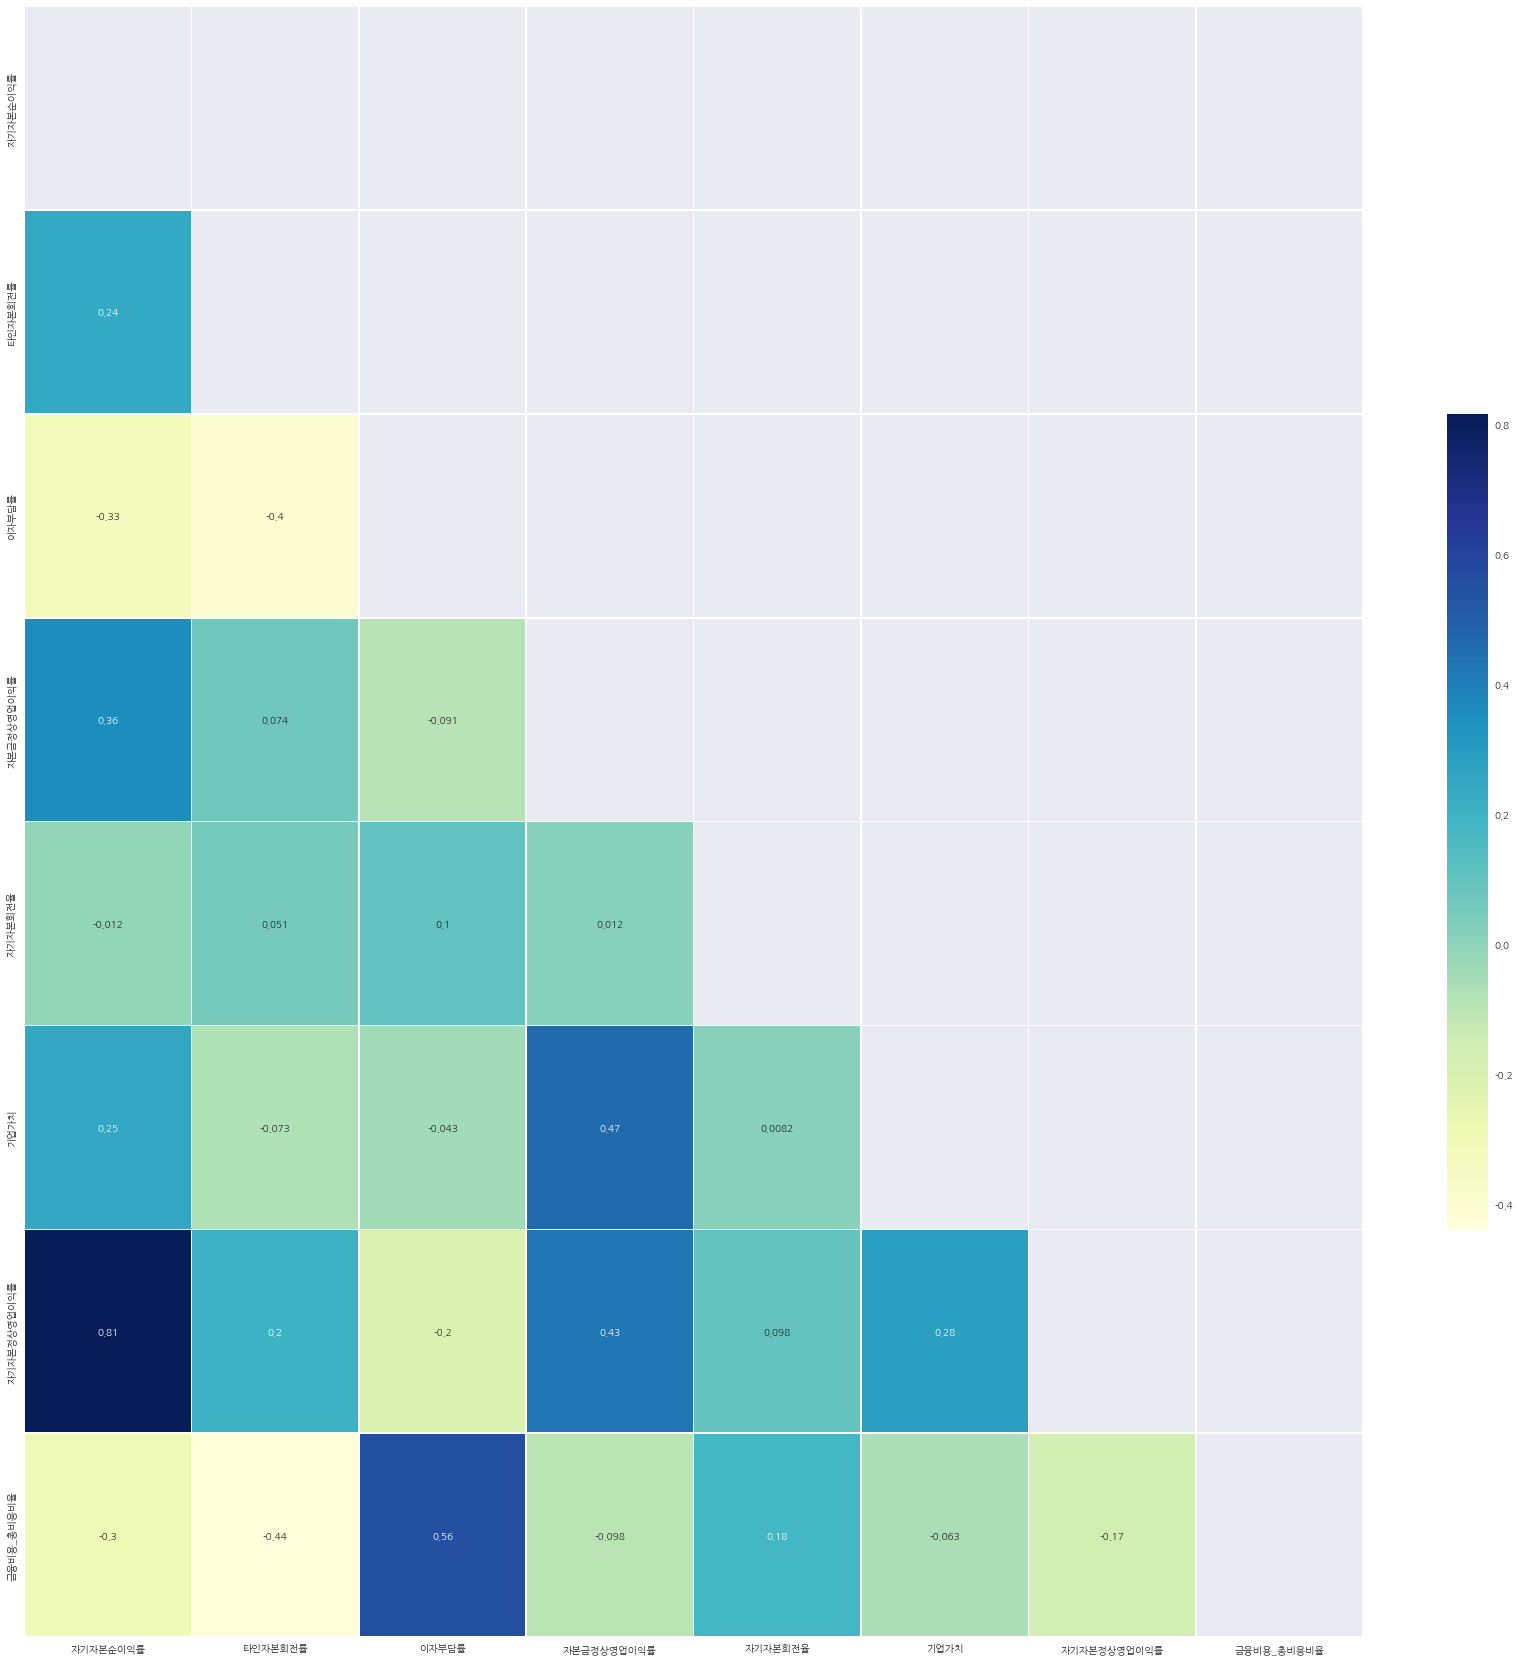

In [ ]:
# 상관행렬 시각화
mask_ut=np.triu(np.ones(df_inter_ma.corr().shape)).astype(bool)  # 배열 행렬에 위쪽 삼각형 반환 -> True
plt.figure(figsize=(30,30))
sns.heatmap(df_inter_ma.corr(method='pearson'), annot = True, cmap = 'YlGnBu', cbar_kws={"shrink": .5}, 
              annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
plt.show()

### 4_5. standard_scaling 변수 저장

In [ ]:
df_inter_ma.to_csv('/content/drive/MyDrive/project2/datasets2/scaling_raw/ma_scaled_selected.csv')

# 5.Logistic Regression

**각 scaling 방법 별 데이터셋 로드 (y 미포함)**

In [ ]:
df_st = pd.read_csv('/content/drive/MyDrive/project2/datasets2/scaling_raw/st_scaled_selected.csv', index_col=0)
df_rb = pd.read_csv('/content/drive/MyDrive/project2/datasets2/scaling_raw/rb_scaled_selected.csv', index_col=0)
df_mm = pd.read_csv('/content/drive/MyDrive/project2/datasets2/scaling_raw/mm_scaled_selected.csv', index_col=0)
df_ma = pd.read_csv('/content/drive/MyDrive/project2/datasets2/scaling_raw/ma_scaled_selected.csv', index_col=0)

In [ ]:
df_st.shape

(9093, 10)

In [ ]:
df_total['y']

0      1.00000
1      1.00000
2      1.00000
3      1.00000
4      1.00000
         ...  
9088   0.00000
9089   0.00000
9090   0.00000
9091   0.00000
9092   1.00000
Name: y, Length: 9093, dtype: float64

In [ ]:
df_total.shape

(9093, 48)

In [ ]:
import pandas as pd

In [ ]:
df_total = df_total[['회사명', '거래소코드', '회계년도', 'y']]

In [ ]:
df = pd.concat([df_total, df_st], axis=1)
df

회사명   거래소코드  회계년도       y  자기자본순이익률  차입금평균이자율  타인자본회전률    이자부담률  \
0     (주)CMG제약  058820  2012 1.00000  -1.60350   0.28867 -1.09395  0.63552   
1     (주)DB하이텍  000990  2011 1.00000  -1.65165   0.80708 -1.26724  3.71051   
2      (주)ES큐브  050120  2018 1.00000  -0.46391   0.09369 -1.10964  1.65207   
3     (주)HJ중공업  097230  2011 1.00000  -0.43877   0.55247 -1.29273  1.83888   
4     (주)MH에탄올  023150  2013 1.00000   0.73399   0.08452 -1.21325  2.04683   
...        ...     ...   ...     ...       ...       ...      ...      ...   
9088   흥구석유(주)  024060  2016 0.00000   0.00209  -0.43619  3.58864 -0.87486   
9089   흥구석유(주)  024060  2017 0.00000  -0.00861  -0.47518  3.58864 -0.87486   
9090   흥구석유(주)  024060  2018 0.00000   0.01332  -0.30085  3.58864 -0.87486   
9091   흥구석유(주)  024060  2019 0.00000   0.43438  -0.96148  3.58864 -0.87486   
9092   흥아해운(주)  003280  2011 1.00000  -1.03210   0.56164 -0.73437  1.94848   

      자본금정상영업이익률     상장기간  자기자본회전율     기업가치  자기자본정상영업이익률  금융비용_총비용비율  
0       -0.53200 -0.40048 -0.77774 -0.31290     -1.26043     0.86073  
1       -0.55137  1.78244 -0.13822  0.55016     -1.30563     4.06684  
2       -0.50617  0.03611 -0.91275 -0.62459     -0.50544     0.82862  
3       -0.38099 -1.01170 -0.17375  1.27136     -0.01761     2.82508  
4       -0.31907  0.12342 -0.21639 -1.29113      0.03286     2.58422  
...          ...      ...      ...      ...          ...         ...  
9088    -0.32965  0.56001  0.23838 -0.67858     -0.30336    -0.08130  
9089    -0.36685  0.64732  0.34497 -0.82214     -0.32391    -0.05453  
9090    -0.30711  0.73464  0.43734 -0.83957     -0.29310    -0.09735  
9091    -0.41078  0.82196  0.20285 -0.37307     -0.35170    -0.15623  
9092    -0.53922  1.69513  2.64011 -0.67626     -0.70861     0.83397  

[9093 rows x 14 columns]

In [ ]:
df.sort_values(by = '회계년도', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df

회사명   거래소코드  회계년도       y  자기자본순이익률  차입금평균이자율  타인자본회전률    이자부담률  \
0       흥아해운(주)  003280  2011 1.00000  -1.03210   0.56164 -0.73437  1.94848   
1      (주)피씨디렉트  051380  2011 0.00000   0.55422  -0.64722  3.37278 -0.87486   
2        (주)피앤텔  054340  2011 0.00000  -0.86946   2.03430  0.46965  0.91024   
3      (주)피에스엠씨  024850  2011 1.00000  -2.03954   0.71992 -0.40372  2.15546   
4       (주)피엔풍년  024940  2011 0.00000  -0.18410   0.36207  0.48939 -0.87486   
...         ...     ...   ...     ...       ...       ...      ...      ...   
9088  대한약품공업(주)  023910  2019 0.00000   0.81371  -0.38113 -0.59203 -0.87486   
9089    대한뉴팜(주)  054670  2019 0.00000   1.39848  -0.05770 -0.54707 -0.87486   
9090     (주)디모아  016670  2019 0.00000  -0.35049   0.38501 -1.30158 -0.62425   
9091  덕산네오룩스(주)  213420  2019 0.00000   0.51356  -0.50730  0.84822 -0.87486   
9092      (주)태광  023160  2019 0.00000  -0.07389   3.00689  0.88984 -0.70757   

      자본금정상영업이익률     상장기간  자기자본회전율     기업가치  자기자본정상영업이익률  금융비용_총비용비율  
0       -0.53922  1.69513  2.64011 -0.67626     -0.70861     0.83397  
1       -0.07135 -0.57511  4.61550 -1.89150      0.80388    -0.16158  
2       -1.49032 -0.57511 -0.61431 -0.82288     -1.68994    -0.71288  
3       -0.71629 -0.48780  0.35918 -1.33226     -2.07449     0.56100  
4       -0.51960  0.03611  0.32365 -1.73619     -0.49364    -0.16158  
...          ...      ...      ...      ...          ...         ...  
9088     2.44849  0.82196 -0.46509  0.21323      0.91868     0.20774  
9089     0.25946  0.12342  0.58656  0.04910      1.81192     0.58776  
9090    -0.39594  0.90927 -0.99801 -0.55565      0.49661    -3.05190  
9091     0.63779 -1.01170 -0.78484  1.03287      0.45077    -0.72359  
9092    -0.44149  0.82196 -0.93406  0.45405     -0.35091    -0.54696  

[9093 rows x 14 columns]

In [ ]:
df.to_csv('/content/drive/MyDrive/project2/datasets2/df_final.csv')
df.to_csv('/content/drive/MyDrive/project2/datasets2/df_final_korean.csv', encoding='utf-8-sig')

# 최종발표 후 피드백 반영 부분

In [ ]:
# winsiorizing만 한 data
win_raw = pd.read_csv('/content/drive/MyDrive/project2/datasets2/win_data.csv', index_col=0)

# 거래소코드 0 값 채우는 코드
win_raw['거래소코드'] = win_raw['거래소코드'].astype('str')
win_raw['거래소코드'] = win_raw['거래소코드'].str.zfill(6)
win_raw.reset_index(drop=True,inplace=True)

win_raw.sort_values(by='회계년도', ascending=True, inplace=True)
win_raw.reset_index(drop=True, inplace=True)
win_raw

In [ ]:
df = win_raw[['y', '자기자본순이익률', '차입금평균이자율', '타인자본회전률', '이자부담률', '자본금정상영업이익률', '상장기간',
       '자기자본회전율', '기업가치', '자기자본정상영업이익률', '금융비용_총비용비율']]
df

y  자기자본순이익률  차입금평균이자율  타인자본회전률   이자부담률  자본금정상영업이익률  상장기간  자기자본회전율  \
0    1.00000 -16.16000   6.64000  1.65098 0.03977    -0.15483    35  5.47000   
1    0.00000  13.49000   1.37000  9.83419 0.00000     1.62534     9  8.25000   
2    0.00000 -13.12000  13.06000  4.04990 0.02514    -3.77366     9  0.89000   
3    1.00000 -34.99000   7.33000  2.30978 0.04268    -0.82855    10  2.26000   
4    0.00000  -0.31000   5.77000  4.08923 0.00000    -0.08019    16  2.21000   
...      ...       ...       ...      ...     ...         ...   ...      ...   
9088 0.00000  18.34000   2.53000  1.93457 0.00000    11.21295    25  1.10000   
9089 0.00000  29.27000   3.94000  2.02416 0.00000     2.88399    17  2.58000   
9090 0.00000  -3.42000   5.87000  0.52086 0.00353     0.39032    26  0.35000   
9091 0.00000  12.73000   1.98000  4.80418 0.00000     4.32351     4  0.65000   
9092 0.00000   1.75000  17.30000  4.88710 0.00236     0.21700    25  0.44000   

         기업가치  자기자본정상영업이익률  금융비용_총비용비율  
0    24.66582     -0.04834     1.73000  
1    22.88434      0.18406    -0.13000  
2    24.45089     -0.19912    -1.16000  
3    23.70416     -0.25821     1.22000  
4    23.11203     -0.01531    -0.13000  
...       ...          ...         ...  
9088 25.96976      0.20170     0.56000  
9089 25.72916      0.33895     1.27000  
9090 24.84263      0.13685    -5.53000  
9091 27.17131      0.12981    -1.18000  
9092 26.32280      0.00663    -0.85000  

[9093 rows x 11 columns]

In [ ]:
df[df['y'] == 1].describe().T

count      mean      std        min       25%       50%  \
y           821.00000   1.00000  0.00000    1.00000   1.00000   1.00000   
자기자본순이익률    821.00000 -26.33035 34.24700 -126.37000 -35.69000 -14.62000   
차입금평균이자율    821.00000   5.72781  3.04161    0.27000   3.78000   5.24000   
타인자본회전률     821.00000   1.31761  0.79118    0.02796   0.81135   1.18558   
이자부담률       821.00000   0.02809  0.01950    0.00000   0.01446   0.02736   
자본금정상영업이익률  821.00000  -0.61093  1.40336  -16.49892  -0.95778  -0.26036   
상장기간        821.00000  13.20341 10.41885    1.00000   5.00000  11.00000   
자기자본회전율     821.00000   2.20957  1.77800    0.00000   0.99000   1.65000   
기업가치        821.00000  24.90514  1.30529   20.71298  24.14681  24.82129   
자기자본정상영업이익률 821.00000  -0.16322  0.27972   -1.02909  -0.23601  -0.06513   
금융비용_총비용비율  821.00000   2.62104  2.57358   -5.65000   1.04000   1.96000   

                 75%      max  
y            1.00000  1.00000  
자기자본순이익률    -3.05000 48.80000  
차입금평균이자율     7.04000 31.92000  
타인자본회전률      1.68086  8.19580  
이자부담률        0.04137  0.06779  
자본금정상영업이익률   0.03657 11.52778  
상장기간        18.00000 57.00000  
자기자본회전율      2.90000  8.25000  
기업가치        25.52390 30.51440  
자기자본정상영업이익률  0.00758  0.41466  
금융비용_총비용비율   3.50000 19.95000

In [ ]:
df[df['y'] == 0].describe().T

count     mean      std        min      25%      50%  \
y           8272.00000  0.00000  0.00000    0.00000  0.00000  0.00000   
자기자본순이익률    8272.00000  6.05507 13.15618 -126.37000  2.34000  6.54500   
차입금평균이자율    8272.00000  4.03907  4.44061    0.00000  2.05000  3.24000   
타인자본회전률     8272.00000  3.29247  1.98748    0.01801  1.88006  2.81924   
이자부담률       8272.00000  0.01076  0.01238    0.00000  0.00000  0.00732   
자본금정상영업이익률  8272.00000  2.14570  3.87740  -11.82612  0.28295  0.99896   
상장기간        8272.00000 15.82302 11.52451    0.00000  7.00000 13.00000   
자기자본회전율     8272.00000  1.70936  1.35697    0.00000  0.84000  1.33000   
기업가치        8272.00000 25.73182  1.46012   20.71298 24.78843 25.50943   
자기자본정상영업이익률 8272.00000  0.08275  0.11285   -1.02909  0.03326  0.08027   
금융비용_총비용비율  8272.00000 -0.07119  1.58944   -5.65000 -0.62000  0.00000   

                 75%      max  
y            0.00000  0.00000  
자기자본순이익률    11.64000 48.80000  
차입금평균이자율     4.67250 31.92000  
타인자본회전률      4.20454 10.26429  
이자부담률        0.01751  0.06779  
자본금정상영업이익률   2.44802 24.76363  
상장기간        22.00000 63.00000  
자기자본회전율      2.12000  8.25000  
기업가치        26.45496 30.71114  
자기자본정상영업이익률  0.13873  0.41466  
금융비용_총비용비율   0.60000 25.22000

###5_1. 함수모음

##### train_test(data)
- train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

def train_test(data):
    X = data          #새로 저장한 데이터 셋은 y 불포함
    y = df_total['y'] #기존 데이터 셋에 있는 y 저장

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=121)

    return X_train, X_test, y_train, y_test

##### matrix(y_test, pred)
- confusion matrix 함수

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score ,roc_auc_score, roc_curve,confusion_matrix

def matrix(y_test, pred):
    # score
    print('accuracy score : {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('precision score : {0:.3f}'.format(precision_score(y_test, pred)))
    print('recall score : {0:.3f}'.format(recall_score(y_test, pred)))
    print('f1 score : {0:.3f}'.format(f1_score(y_test, pred)))
    print('roc score : {0:.3f}'.format(roc_auc_score(y_test, pred)))

    # confusion matirx
    con_matrix = confusion_matrix(y_test, pred)
    sns.heatmap(con_matrix, annot=True, annot_kws={"size": 20}, cmap='PuBu', fmt='g')
    plt.xlabel('Predicted', fontsize=20)
    plt.ylabel('Actual', fontsize=20)

##### Logistic_basic(data)
- 로지스틱 회귀 분석, default 파라미터

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def Logistic_basic(data):
    X_train, X_test, y_train, y_test = train_test(data)

    # 모델 생성 및 학습 시키기
    model = LogisticRegression(C=0.5, penalty='l2')
    model.fit(X_train, y_train)

    # 로지스틱 모델 학습 성능 비교
    y_pred = model.predict(X_test) # 예측 결과 라벨

    # 정확도 측정
    print(accuracy_score(y_pred, y_test))

    # return model.fit(X_train, y_train)

##### Logistic_cv(data)
- 로지스틱 회귀 분석

In [ ]:
# 미완성 !!!!!

# from sklearn.model_selection import KFold

# def Logistic_cv(df):
#     X_train, X_test, y_train, y_test = train_test(df)

#     logistic = LogisticRegression()
#     param_logit = {'penalty' : ['l1', 'l2'],
#                    'C' : [0.001, 0.01, 0.1, 1, 5, 10, 100],
#                    'solver' : ['liblinear'], # 'lbfgs', 'newton-cg' 
#                    'random_state' : [777],
#                    'class_weight' : ['balanced', None],
#                    'max_iter' : [200, 300, 400, 500]}

#     gridsearch = GridSearchCV(logistic, param_grid = param_logit, cv = KFold(n_splits=5, shuffle = True, random_state=777), n_jobs=-1, scoring='f1', verbose=0)
#     gridsearch.fit(X_train, y_train)

#     print('최적 파라미터\n', gridsearch.best_params_)
#     print('학습 데이터 정확도 : ', gridsearch.best_score_)

#     estimator = gridsearch.best_estimator_
#     pred = pd.DataFrame(estimator.predict(X_test))
#     print('\n예측 데이터 정확도')
#     matrix(y_test, pred)
    
#     return gridsearch.fit(X_train, y_train)

## 5_2. 스케일링 방법별 f1 확인

In [ ]:
# standard_scaling
Logistic_basic(df_st)

0.9450247388675096


In [ ]:
# Robust scaling
Logistic_basic(df_rb)

0.9125893347993403


In [ ]:
# minmax scaling
Logistic_basic(df_mm)

0.9186366135239142


In [ ]:
# maxabs scaling
Logistic_basic(df_ma)

0.9318306761957119


In [ ]:
print('standard - select fetures : ', len(df_st.columns))
print('robust - select fetures : ', len(df_rb.columns))
print('minmax - select fetures : ', len(df_mm.columns))
print('maxabs - select fetures : ', len(df_ma.columns))

standard - select fetures :  10
robust - select fetures :  2
minmax - select fetures :  6
maxabs - select fetures :  8


In [ ]:
print('standard - select fetures : ', df_st.columns)
print('robust - select fetures : ', df_rb.columns)
print('minmax - select fetures : ', df_mm.columns)
print('maxabs - select fetures : ', df_ma.columns)

standard - select fetures :  Index(['자기자본순이익률', '차입금평균이자율', '타인자본회전률', '이자부담률', '자본금정상영업이익률', '상장기간',
       '자기자본회전율', '기업가치', '자기자본정상영업이익률', '금융비용_총비용비율'],
      dtype='object')
robust - select fetures :  Index(['자본금순이익률', '자본금정상영업이익률'], dtype='object')
minmax - select fetures :  Index(['기업가치', '타인자본회전률', '상장기간', '자기자본회전율', '노동소득분배율', '이자부담률'], dtype='object')
maxabs - select fetures :  Index(['자기자본순이익률', '타인자본회전률', '이자부담률', '자본금정상영업이익률', '자기자본회전율', '기업가치',
       '자기자본정상영업이익률', '금융비용_총비용비율'],
      dtype='object')


In [ ]:
# 스케일러 방식 중 f1이 가장 높은은 Standard_scaling 로 선정
# 이후 t-test, lasso, stepwise 를 거쳐 셀렉션된 교집합 피처 추출(final_feature)

final_feature = df_st.columns

In [ ]:
final_feature

Index(['자기자본순이익률', '차입금평균이자율', '타인자본회전률', '이자부담률', '자본금정상영업이익률', '상장기간',
       '자기자본회전율', '기업가치', '자기자본정상영업이익률', '금융비용_총비용비율'],
      dtype='object')

In [ ]:
len(final_feature)

10

# 접기

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.5f}'.format
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False


#모든행,모든컬럼 출력
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [ ]:
# 글씨?
# from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/malgun.ttf"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)


# model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold , GridSearchCV , train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score ,roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import Binarizer


In [ ]:
df_y = pd.read_csv('/content/drive/MyDrive/project2/datasets2/fake_for_data.csv', index_col=0)
df_y = df_y[['y']]

In [ ]:
def train_test_data(df):
  X = df
  y = df_y

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=156)

  return X_train, X_test, y_train, y_test

In [ ]:
# thresholds에 따라 score 산출
def get_f1_score(y_test, pred_proba_1):

    thresholds = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    accuracys = []
    precisions = []
    recalls = []
    f1_scores = []
    auc_scores=[]

    for threshold in thresholds:
        binarizer = Binarizer(threshold = threshold)
        pred_proba = binarizer.fit_transform(pred_proba_1)

        accuracy = accuracy_score(y_test, pred_proba)
        precision = precision_score(y_test, pred_proba)
        recall = recall_score(y_test, pred_proba)
        f1score = f1_score(y_test, pred_proba)
        auc_score=roc_auc_score(y_test, pred_proba)

        accuracys.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1score)
        auc_scores.append(auc_score)
        
    results = pd.DataFrame(data = {"Accuracy": accuracys, "Precision": precisions, "Recall": recalls, "F1 score": f1_scores,"Auc_Score":auc_scores}, index = thresholds)
    print(results)

In [ ]:
def Logistic(df):
    X_train, X_test, y_train, y_test = train_test_data(df)

    logistic = LogisticRegression()
    param_logit = {'penalty' : ['l1', 'l2'],
                   'C' : [0.001, 0.01, 0.1, 1, 5, 10, 100],
                   'solver' : ['liblinear'], # 'lbfgs', 'newton-cg' 
                   'random_state' : [156],
                   'class_weight' : ['balanced', None],
                   'max_iter' : [200, 300, 400, 500]}

    gridsearch = GridSearchCV(logistic, param_grid = param_logit, cv = KFold(n_splits=5, shuffle = True, random_state=121), n_jobs=-1, scoring='f1', verbose=0)
    gridsearch.fit(X_train, y_train)

    print('최적 파라미터\n', gridsearch.best_params_)
    print('학습 데이터 정확도 : ', gridsearch.best_score_)

    estimator = gridsearch.best_estimator_
    pred = pd.DataFrame(estimator.predict(X_test))
    # pred = estimator.predict(X_test)
    print('\n예측 데이터 정확도')
    matrix(y_test, pred)
    
    return gridsearch.fit(X_train, y_train)

In [ ]:
# logistic = Logistic(df_st)

https://m.blog.naver.com/gdpresent/221703566189

In [ ]:
# 교차검증 설정
# from sklearn.model_selection import cross_val_predict
# y_train_pred = cross_val_predict(sgd_clf,x_train_reshape,y_train_5,cv=3)

# # 혼동행렬
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_train_5,y_train_pred)

In [ ]:
def vif_drop(data):
  for i in range(len(data)):
    if vif(data)['VIF Factor'].max() > 10 :
      df = data.drop(vif(st_scaled)['features'].max(), axis = 1)


In [ ]:
from sklearn.preprocessing import Binarizer

def change_para(y_test, pred_input):

    thresholds = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

    accuracy_li = []
    precision_li = []
    recall_li = []
    f1_score_li = []
    auc_score_li = []

    for i in thresholds:
        binarizer = Binarizer(i = i)
        predict_proba = binarizer.fit_transform(pred_input)

        accuracy = accuracy_score(y_test, predict_proba)
        precision = precision_score(y_test, predict_proba)
        recall = recall_score(y_test, predict_proba)
        f1score = f1_score(y_test, predict_proba)
        auc_score=roc_auc_score(y_test, predict_proba)

        accuracy_li.append(accuracy)
        precision_li.append(precision)
        recall_li.append(recall)
        f1_score_li.append(f1score)
        auc_score_li.append(auc_score)
        
    result = pd.DataFrame(data = {"Accuracy": accuracy_li, "Precision": precision_li, "Recall": recall_li, "F1 score": f1_score_li,"Auc_Score":auc_score_li}, index = thresholds)
    print(result)

In [ ]:
# Model
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# import graphviz
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier
from lightgbm import plot_importance

from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense,Dropout

from xgboost import XGBClassifier
